In [1]:
import os
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from matplotlib.colors import LogNorm
from matplotlib.colors import TwoSlopeNorm
from utils import *

In [2]:

bimpath='/home/boyang1995/research/GxG/reference/filter4.bim'
bimdf = pd.read_csv(bimpath,delim_whitespace=True,header=None)


In [3]:
def feat_Imp(Nsnps, coeff, p_values, interval=None, title=None, features=None, vmin=-5,vmax=0, savePath=None, saveName=None):

#     fig, axs = plt.subplots(2, 1, figsize=(10, 4),dpi=150, gridspec_kw={'height_ratios': [5, 1], 'hspace': 0.0})
    plt.figure(dpi = 200)
    sns.set(rc={'figure.figsize':(9,8)})
    if title is not None:
        plt.title(title,fontsize=20)

    unique_feat = np.arange(Nsnps)+1
    genre_matrix = []
    stars = []
    genre_matrix = np.zeros((Nsnps,Nsnps))
    mask_matrix = np.zeros((Nsnps,Nsnps))
#     print(genre_matrix)
    cindex=0
    for i in range((Nsnps)):
        temp = []
        for j in range(i, (Nsnps)):
            temp.append(coeff[cindex])
            genre_matrix[i,j] = coeff[cindex]
            mask_matrix[i,j] = 1
            if p_values[cindex] <= 0.05/len(coeff):
                stars.append((i,j))
            cindex += 1
            
            
    mask_matrix = mask_matrix
    genre_matrix = np.array(genre_matrix)
#     print(genre_matrix)
    
#     print(np.nanmin(genre_matrix),np.nanmax(genre_matrix))
#     log_norm = LogNorm(vmin=np.nanmin(genre_matrix), vmax=np.nanmax(genre_matrix))
#     log_sign_genre_matrix = np.log10(np.abs(genre_matrix+1e-5))*np.sign(genre_matrix)
#     print(genre_matrix)
    max_abs_value = np.nanmax(np.abs(genre_matrix))

    # Use TwoSlopeNorm for centering the colormap at 0
    norm = TwoSlopeNorm(vmin=-max_abs_value, vcenter=0, vmax=max_abs_value)
    
    ax = sns.heatmap(genre_matrix, xticklabels=unique_feat, yticklabels=unique_feat, annot=False, mask=mask_matrix == 0,fmt=".2f", linewidths=.42, cmap='seismic', norm=norm)
    
    #     plt.ylabel(r'-$log_{10}$(p-value)',fontsize=20)
    plt.xlabel(r'SNP index 1',fontsize=20)
    plt.ylabel(r'SNP index 2',fontsize=20)
    
    for (i, j) in stars:
        plt.text(j + 0.5, i + 0.5, '*', ha='center', va='center', color='yellow', fontsize=20)
    ax.collections[0].colorbar.set_label(r'$\mu$', rotation=0, labelpad=20,fontsize=20)
    ax.invert_yaxis()
    #plt.savefig('seaborn_cross_fold_plot.png', bbox_inches="tight", pad_inches=0)
    plt.gca().set_facecolor('white')
    
    
#     plt.tight_layout(rect=[0, 0.1, 1, 1])  # Adjust layout to make space for colorbar
    
    if savePath is not None:
        if not os.path.exists(savePath):
            os.makedirs(savePath)
        plt.savefig(f'{savePath}/{saveName}',bbox_inches='tight')
        
    plt.show()
    
#     plt.show()

In [15]:
def feat_Imp_disp(Nsnps, coeff, p_values, interval=None, title=None, features=None, vmin=-5,vmax=0, savePath=None):

#     fig, axs = plt.subplots(2, 1, figsize=(10, 4),dpi=150, gridspec_kw={'height_ratios': [5, 1], 'hspace': 0.0})
    plt.figure(dpi = 200)
    sns.set(rc={'figure.figsize':(9,9)})
    if title is not None:
        plt.title(title,fontsize=25)

    unique_feat = np.arange(Nsnps)+1
    genre_matrix = []
    stars = []
    genre_matrix = np.zeros((Nsnps,Nsnps))
    mask_matrix = np.zeros((Nsnps,Nsnps))
#     print(genre_matrix)
    cindex=0
    for i in range((Nsnps)):
        temp = []
        for j in range(i, (Nsnps)):
            temp.append(coeff[cindex])
            genre_matrix[i,j] = coeff[cindex]
            mask_matrix[i,j] = 1
            if p_values[cindex] <= 0.05/len(coeff):
                stars.append((i,j))
            cindex += 1
            
            
    mask_matrix = mask_matrix
    genre_matrix = np.array(genre_matrix)
#     print(genre_matrix)
    
#     print(np.nanmin(genre_matrix),np.nanmax(genre_matrix))
#     log_norm = LogNorm(vmin=np.nanmin(genre_matrix), vmax=np.nanmax(genre_matrix))
#     log_sign_genre_matrix = np.log10(np.abs(genre_matrix+1e-5))*np.sign(genre_matrix)
#     print(genre_matrix)
    max_abs_value = np.nanmax(np.abs(genre_matrix))

    # Use TwoSlopeNorm for centering the colormap at 0
    norm = TwoSlopeNorm(vmin=-max_abs_value, vcenter=0, vmax=max_abs_value)
    
    ax = sns.heatmap(genre_matrix, xticklabels=unique_feat, yticklabels=unique_feat, annot=False, mask=mask_matrix == 0,fmt=".2f", linewidths=.42, cmap='seismic', norm=norm)
    
    #     plt.ylabel(r'-$log_{10}$(p-value)',fontsize=20)
    plt.xlabel(r'SNP index 1',fontsize=25)
    plt.ylabel(r'SNP index 2',fontsize=25)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    
    for (i, j) in stars:
        plt.text(j + 0.5, i + 0.5, '*', ha='center', va='center', color='yellow', fontsize=20)
    ax.collections[0].colorbar.set_label(r'$\mu$', rotation=0, labelpad=20,fontsize=20,)
    ax.invert_yaxis()
    #plt.savefig('seaborn_cross_fold_plot.png', bbox_inches="tight", pad_inches=0)
    plt.gca().set_facecolor('white')
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=20)
    
#     plt.tight_layout(rect=[0, 0.1, 1, 1])  # Adjust layout to make space for colorbar
    
    if savePath is not None:
        plt.savefig(savePath,bbox_inches='tight')
        
    plt.show()
    
#     plt.show()

pStart: 44319791 vs pEnd: 44342261


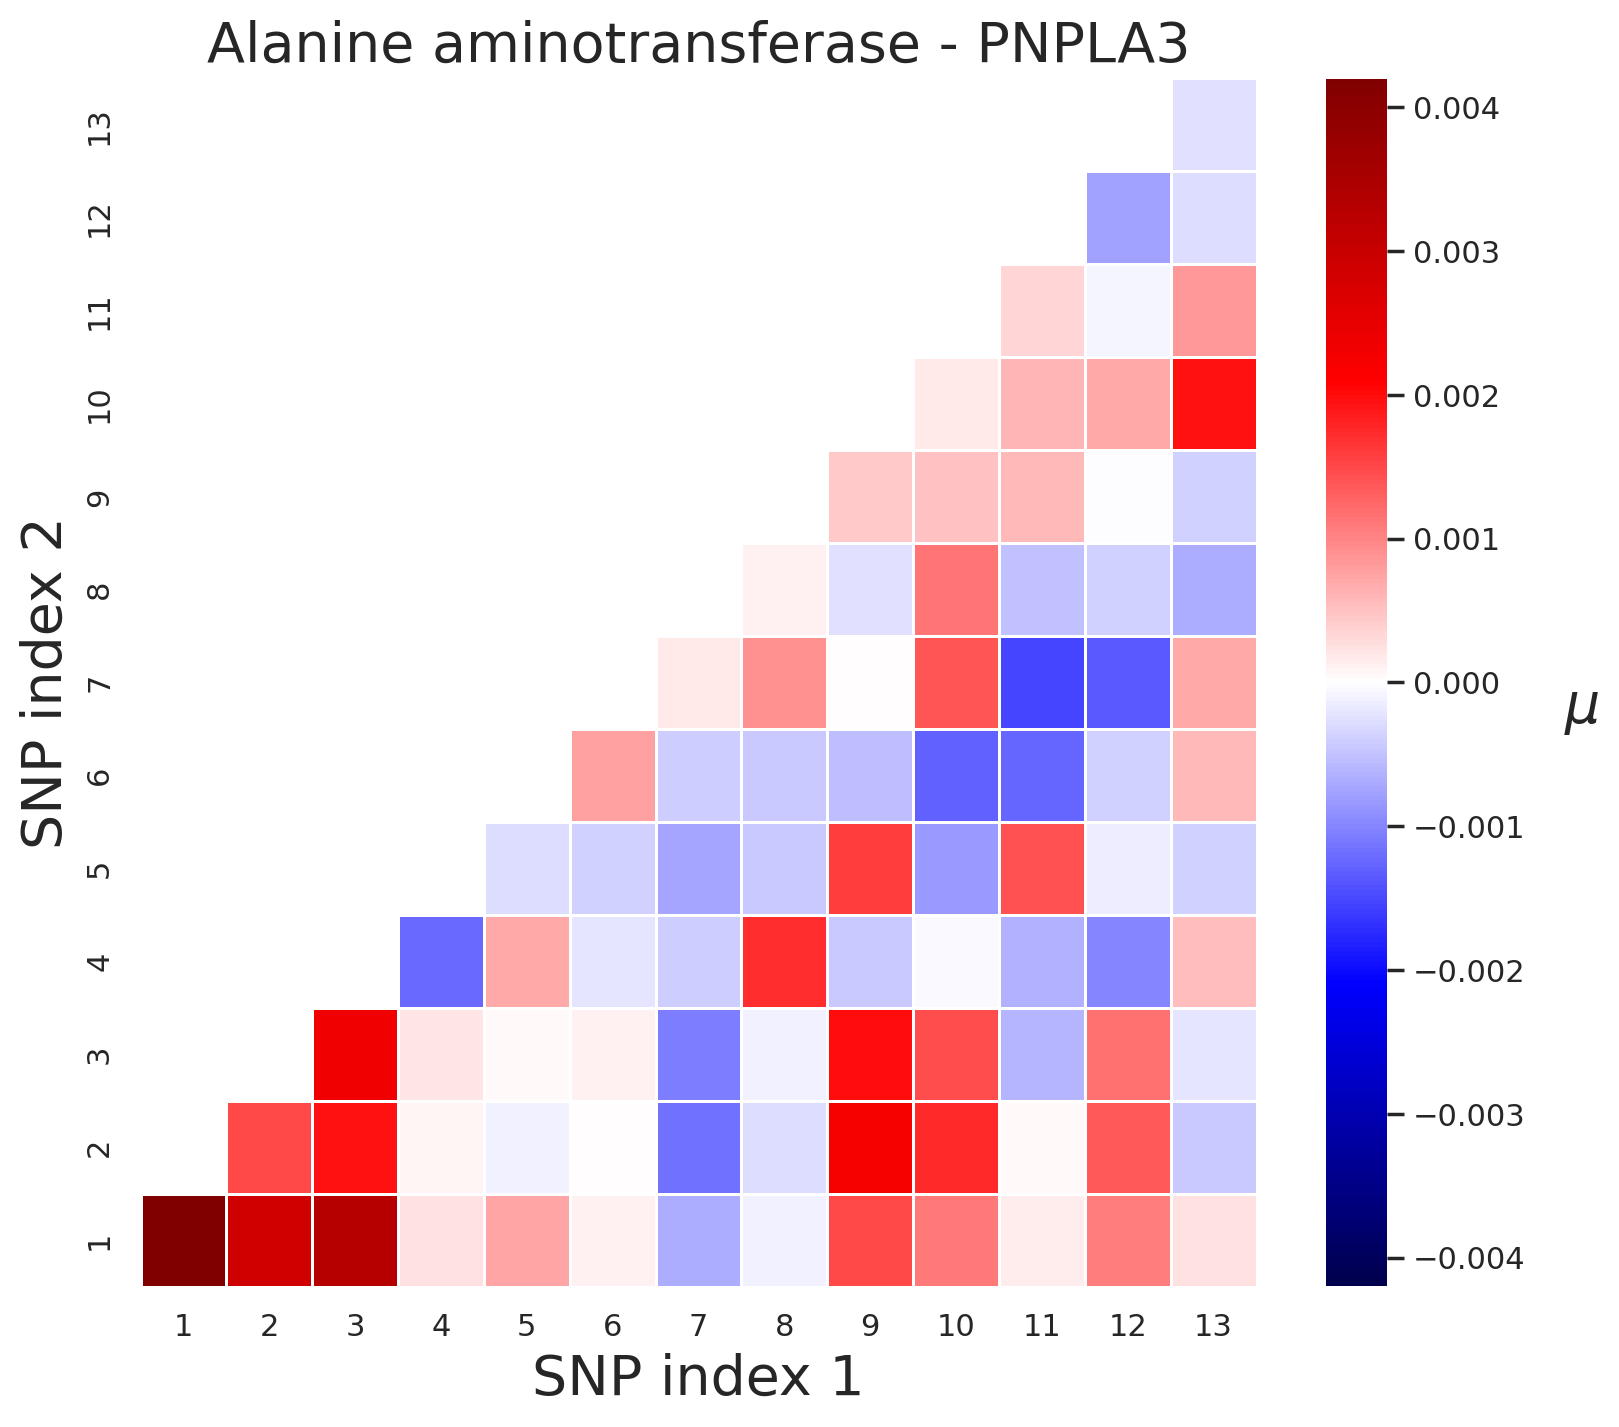

pStart: 44351457 vs pEnd: 44392262


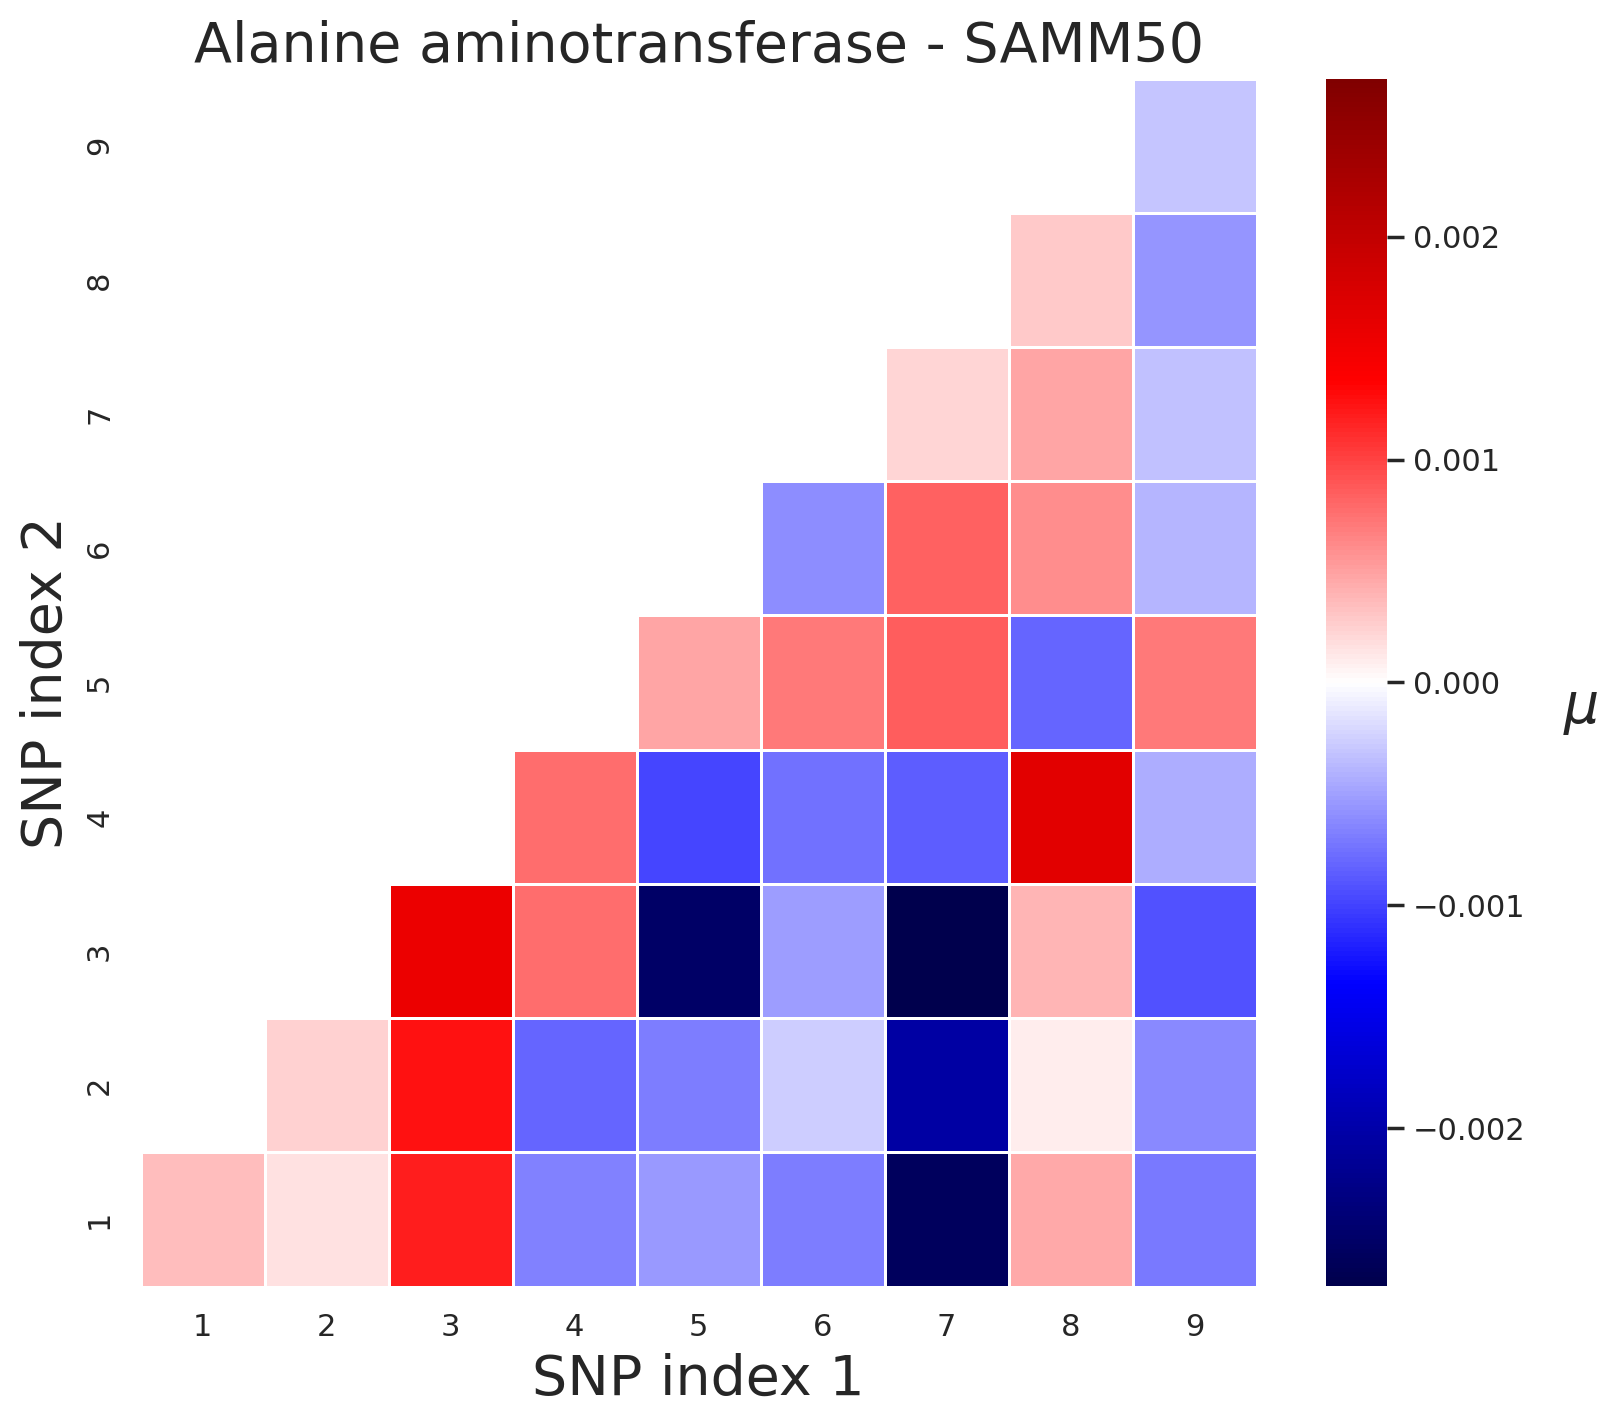

pStart: 45409881 vs pEnd: 45412506


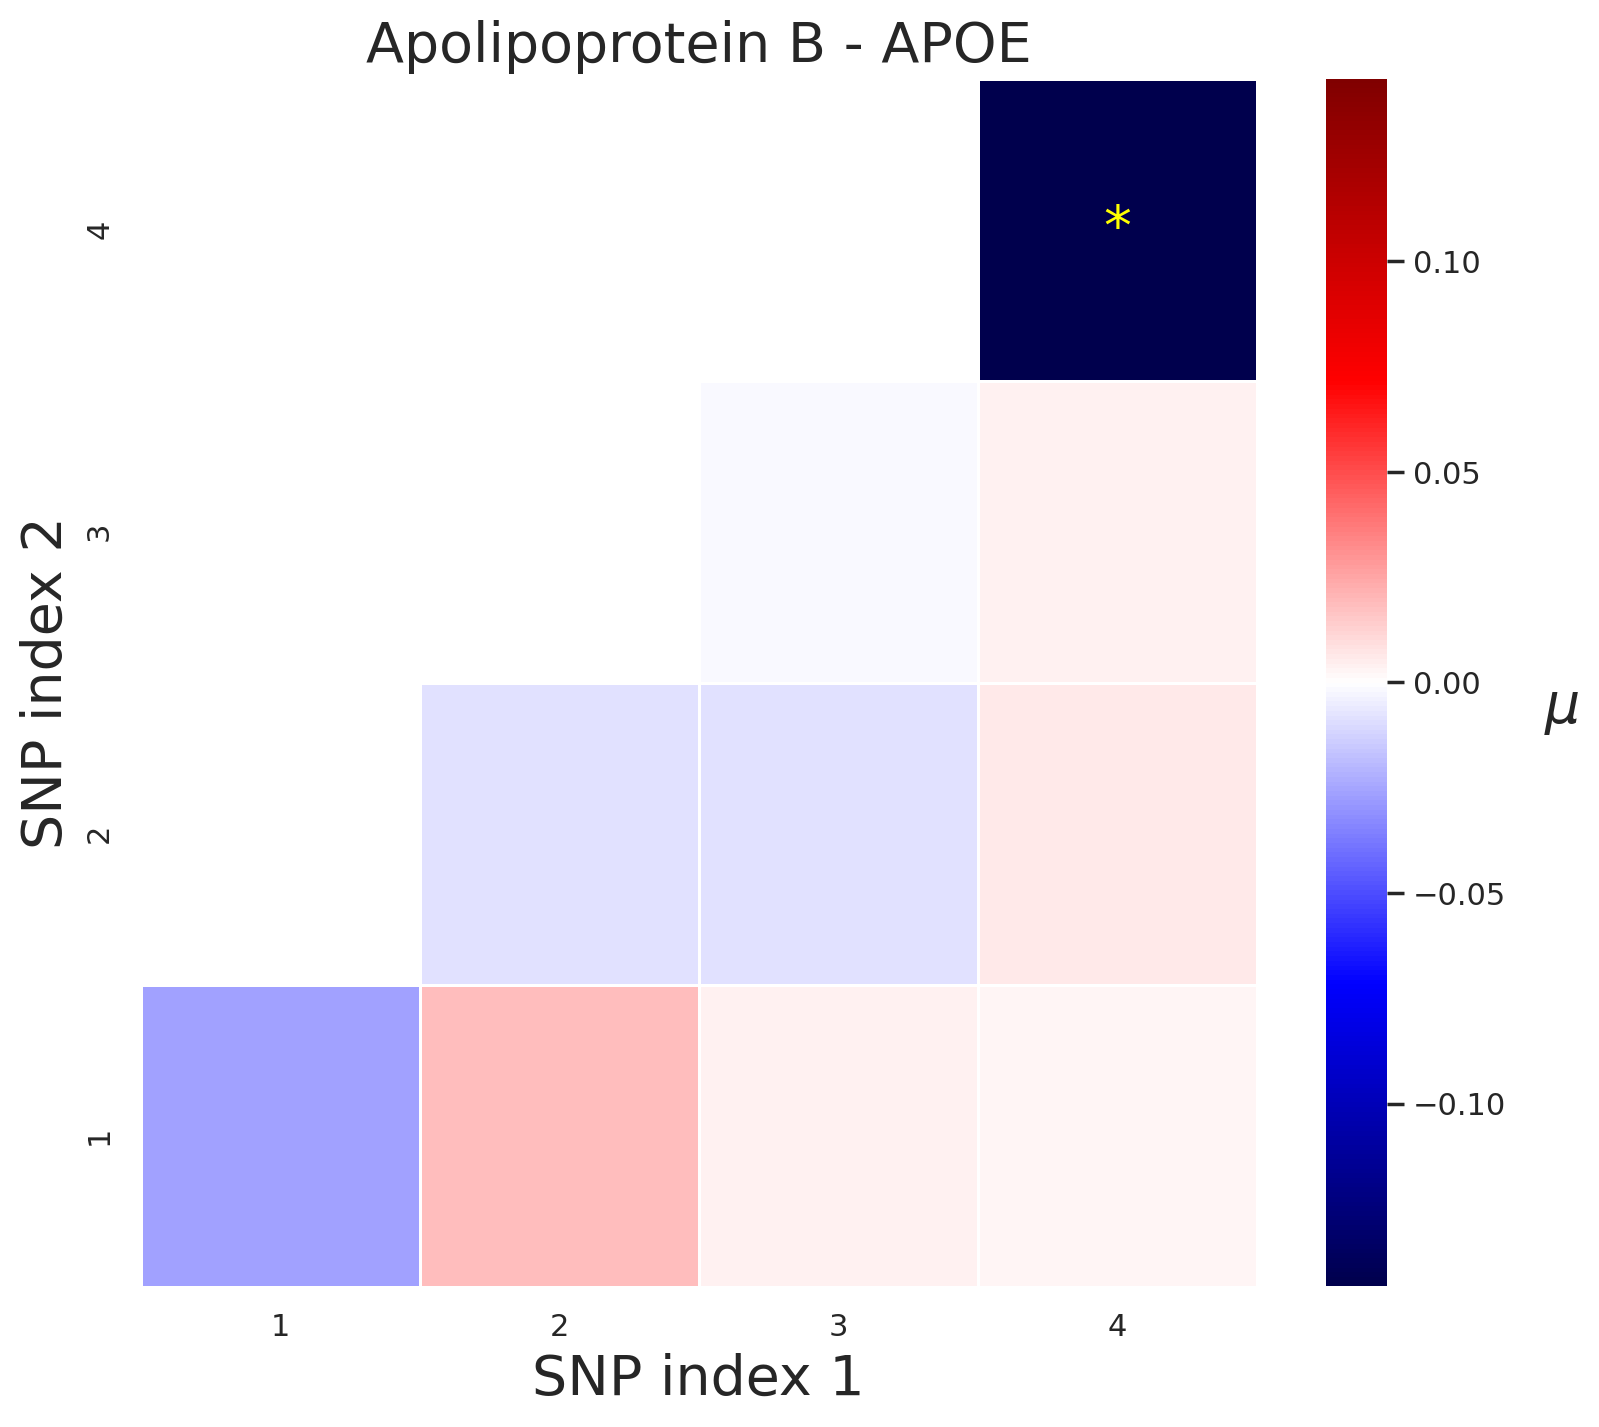

pStart: 45312381 vs pEnd: 45324177


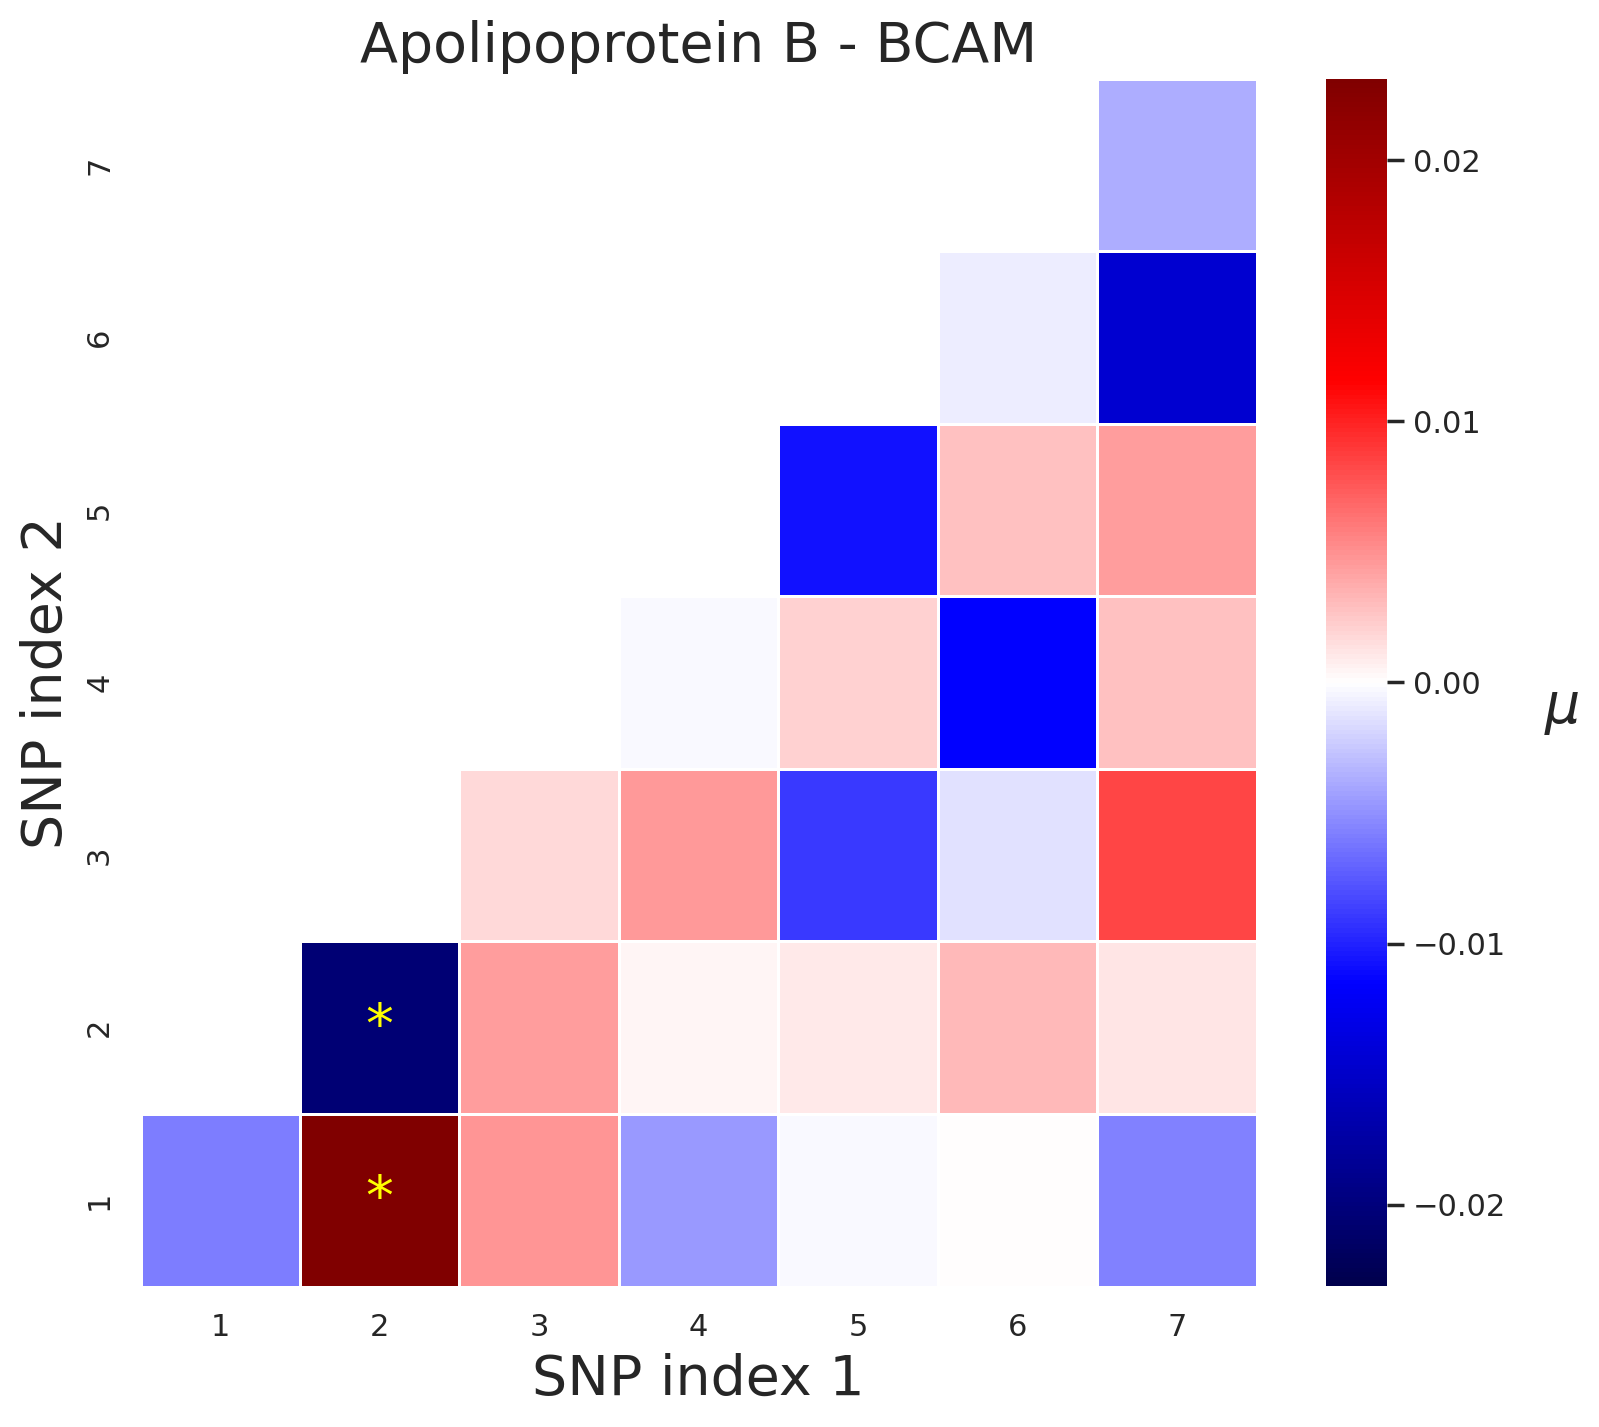

pStart: 44319791 vs pEnd: 44342261


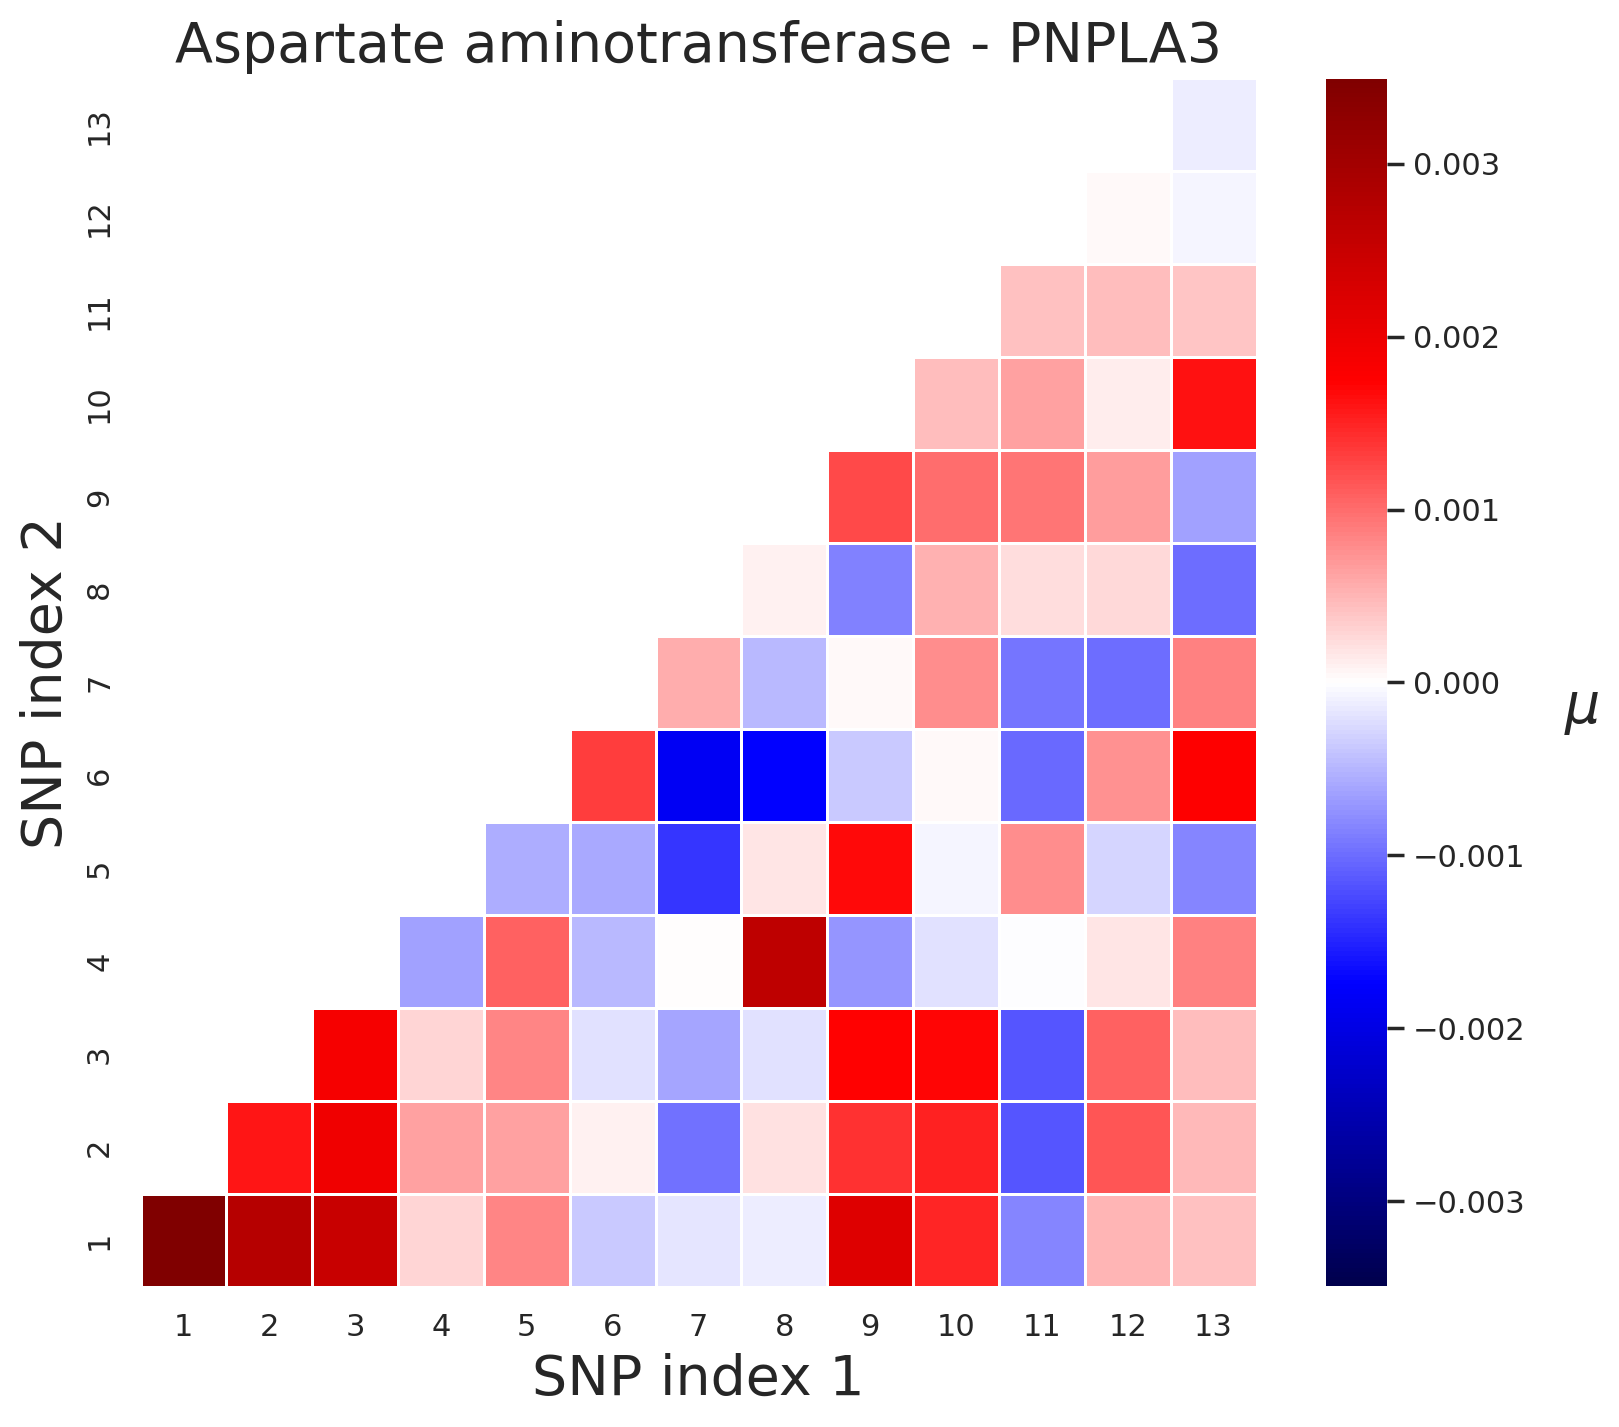

pStart: 15855600 vs pEnd: 15894671


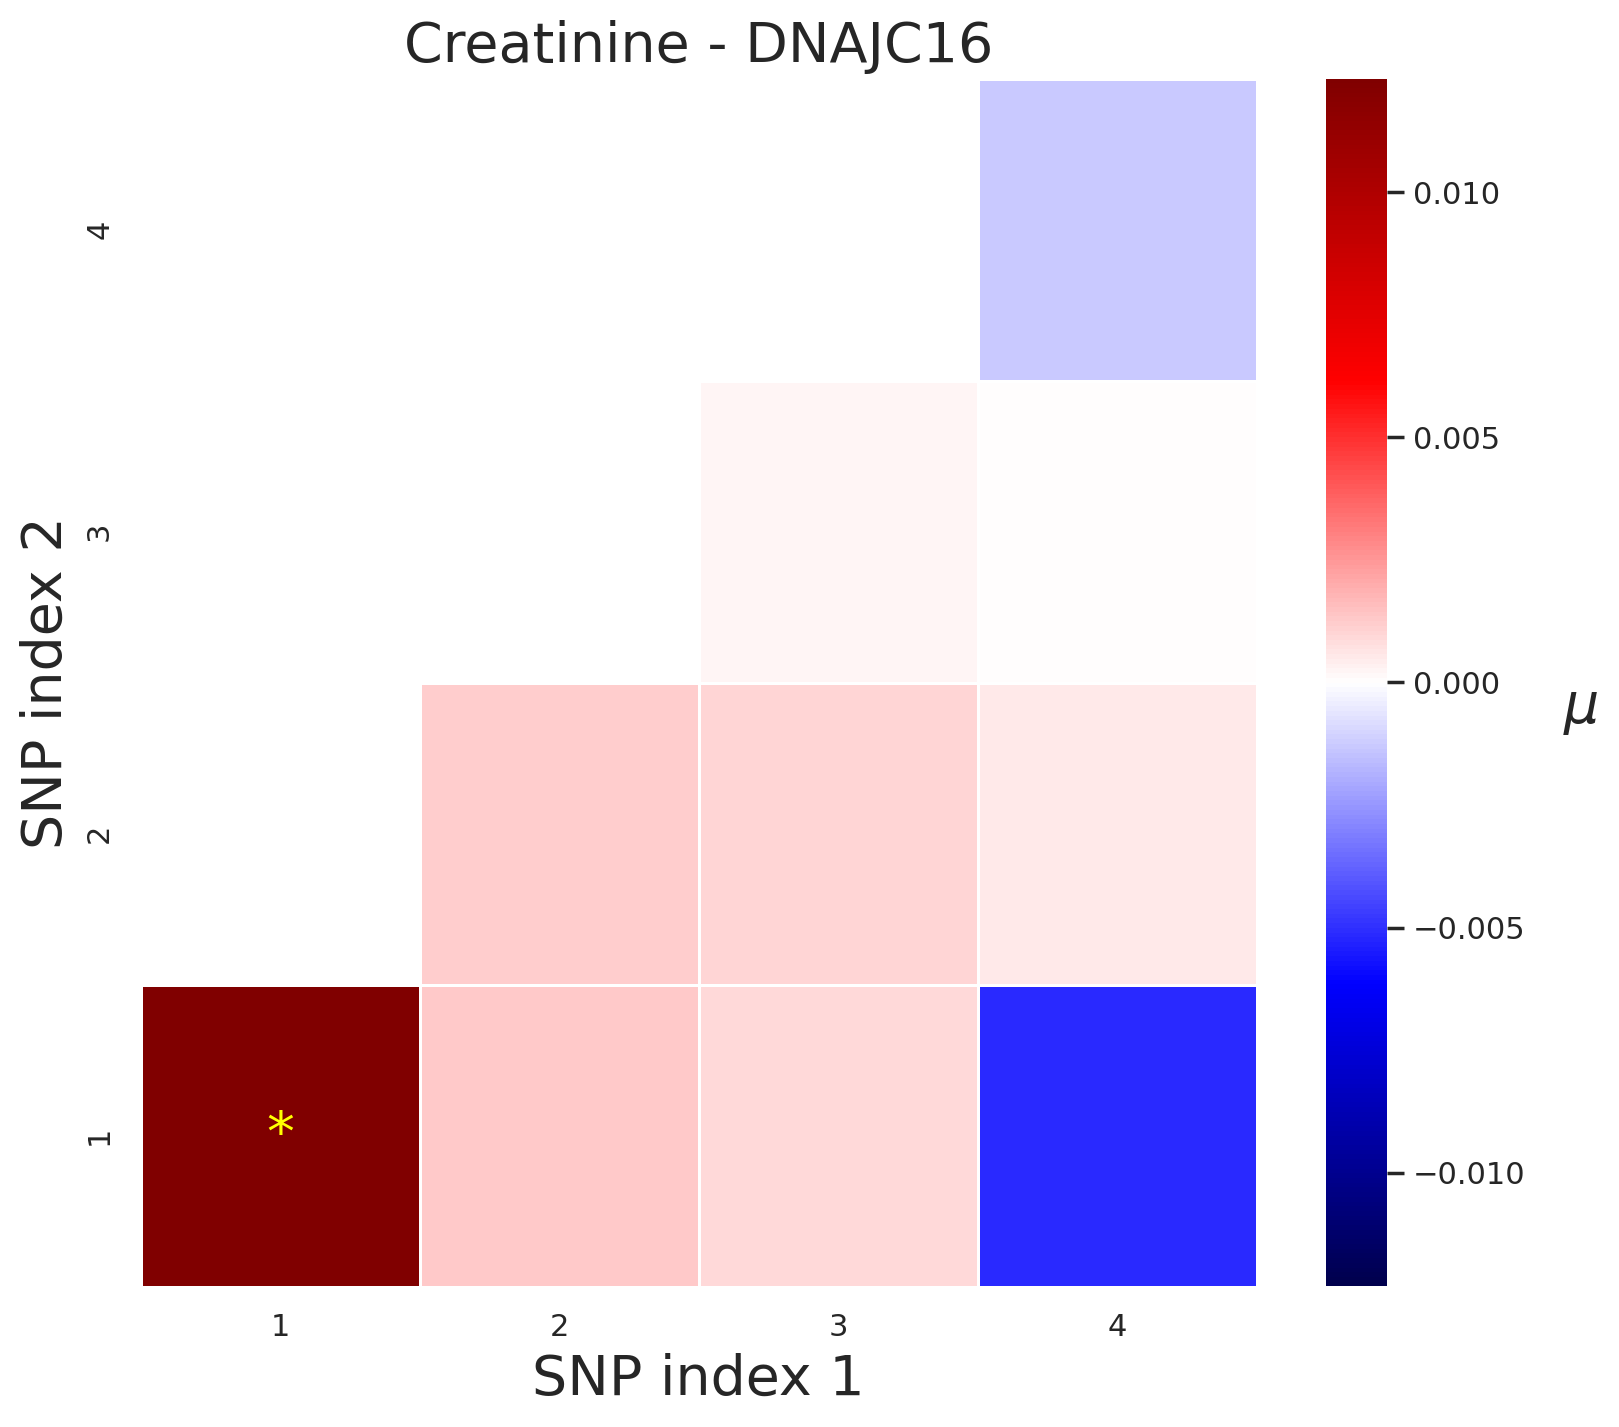

pStart: 234217835 vs pEnd: 234255557


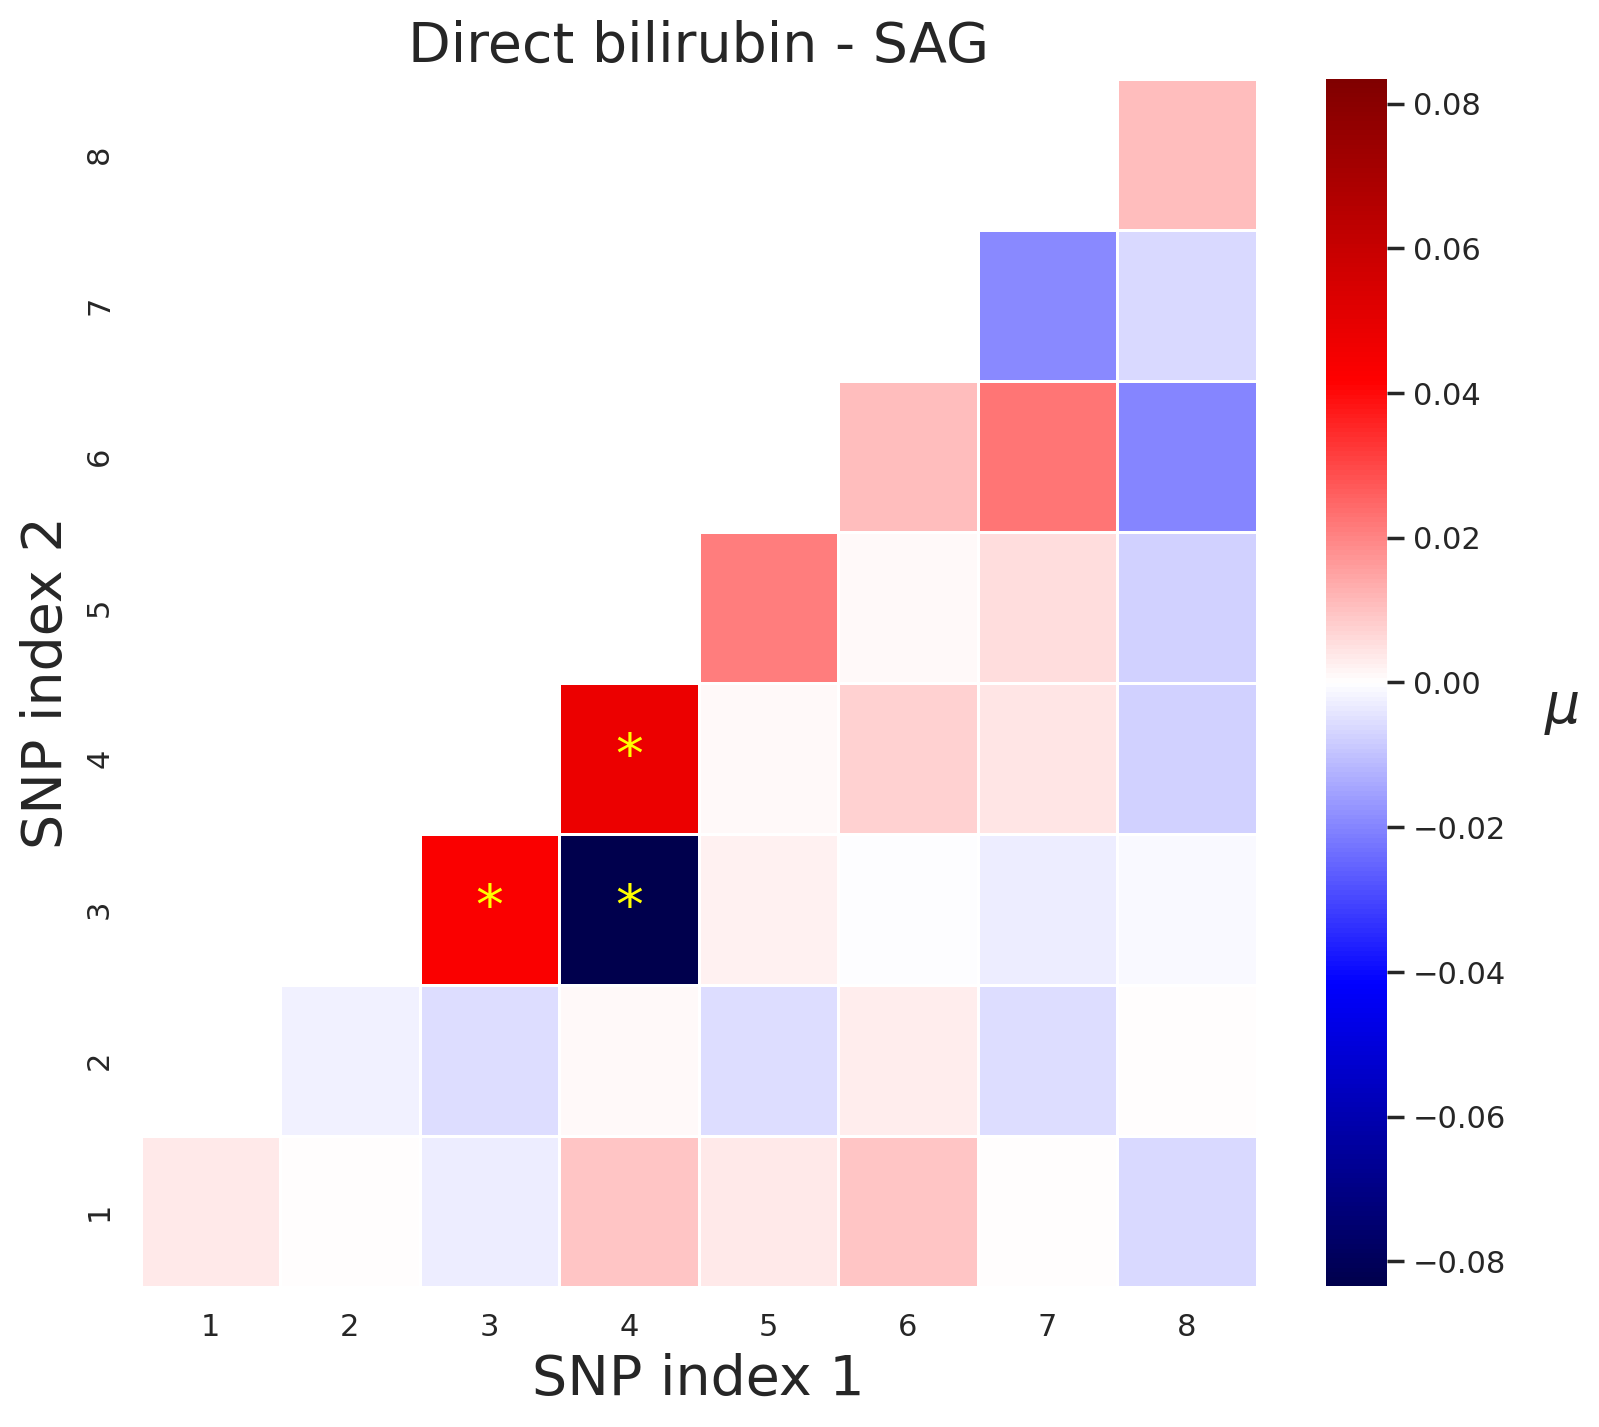

pStart: 234263164 vs pEnd: 234378105


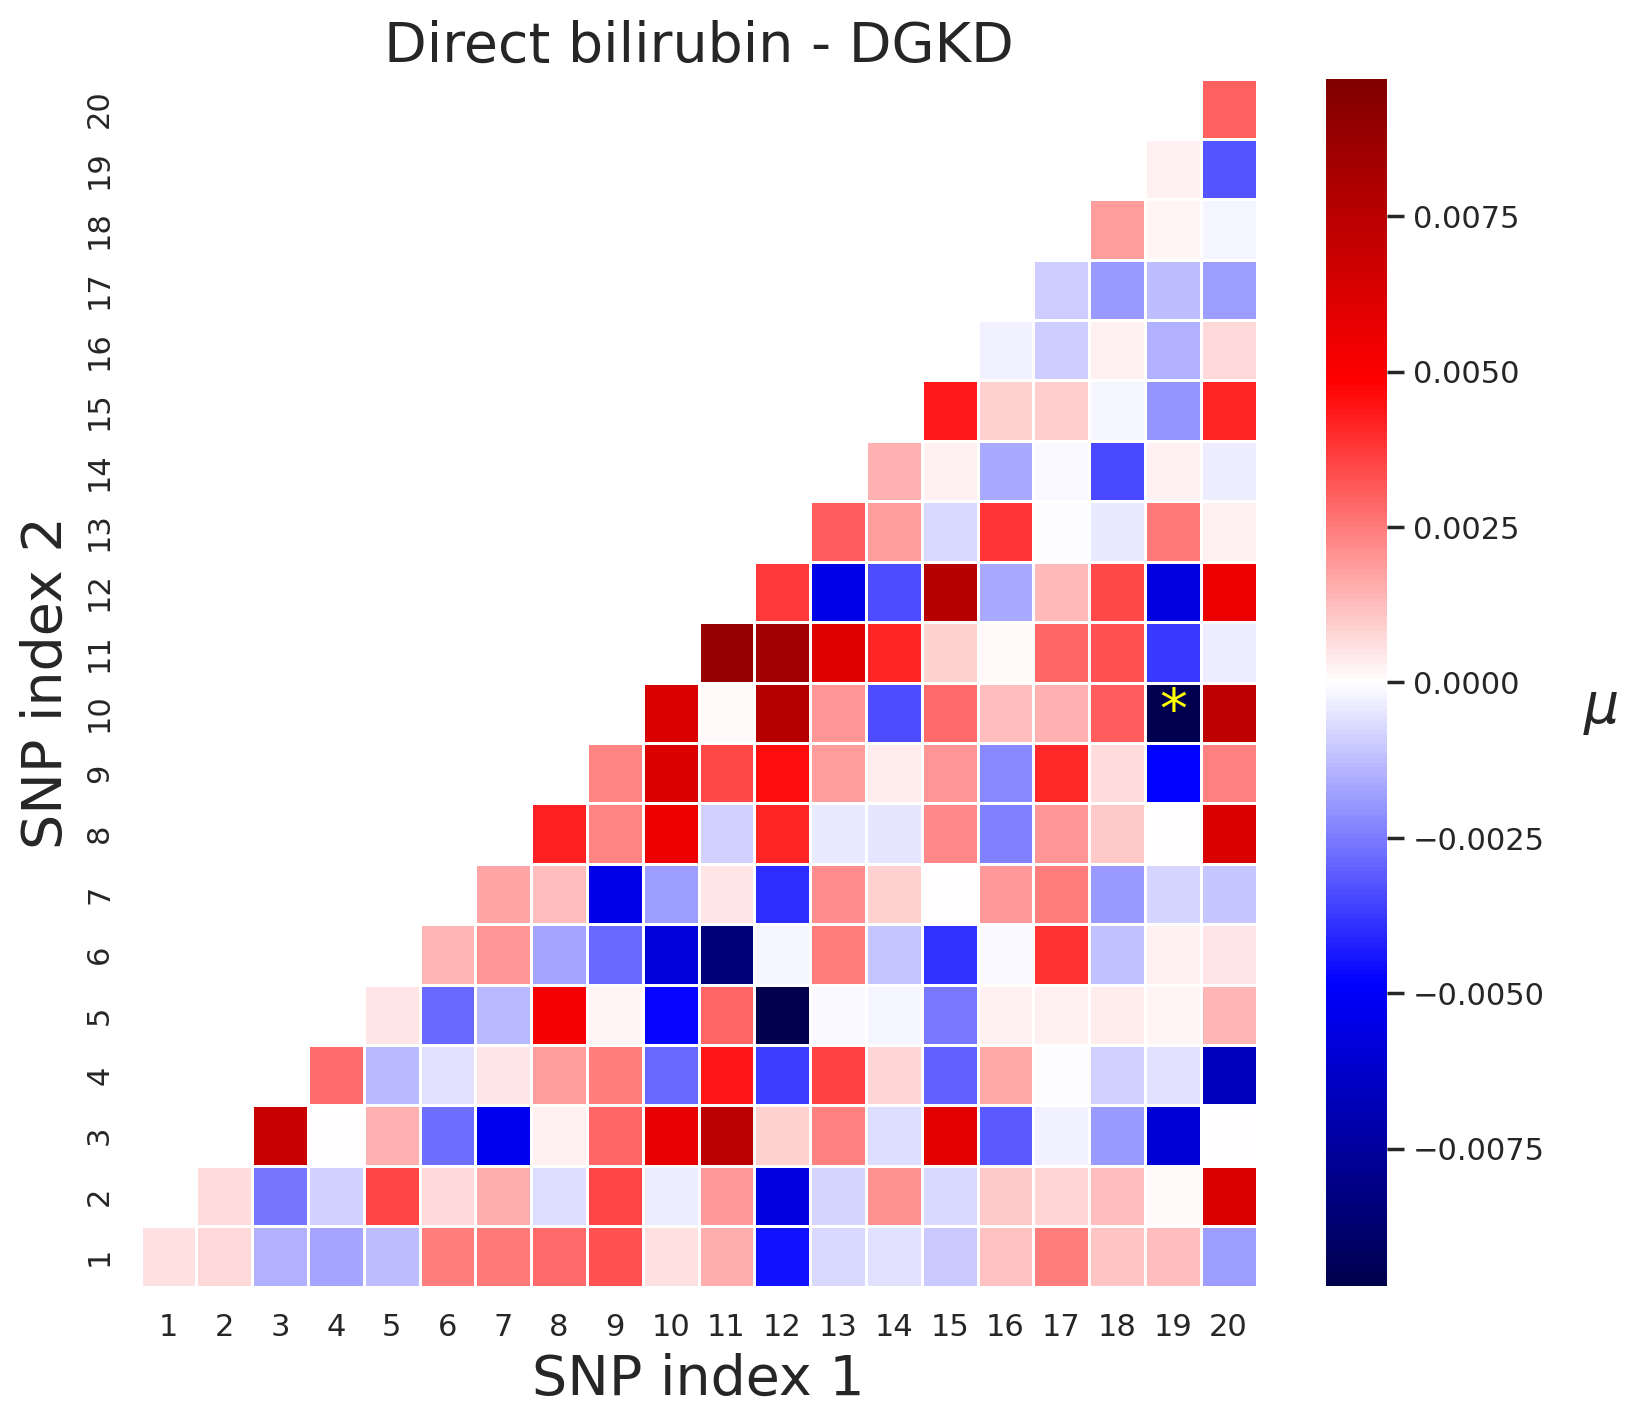

pStart: 234386037 vs pEnd: 234474235


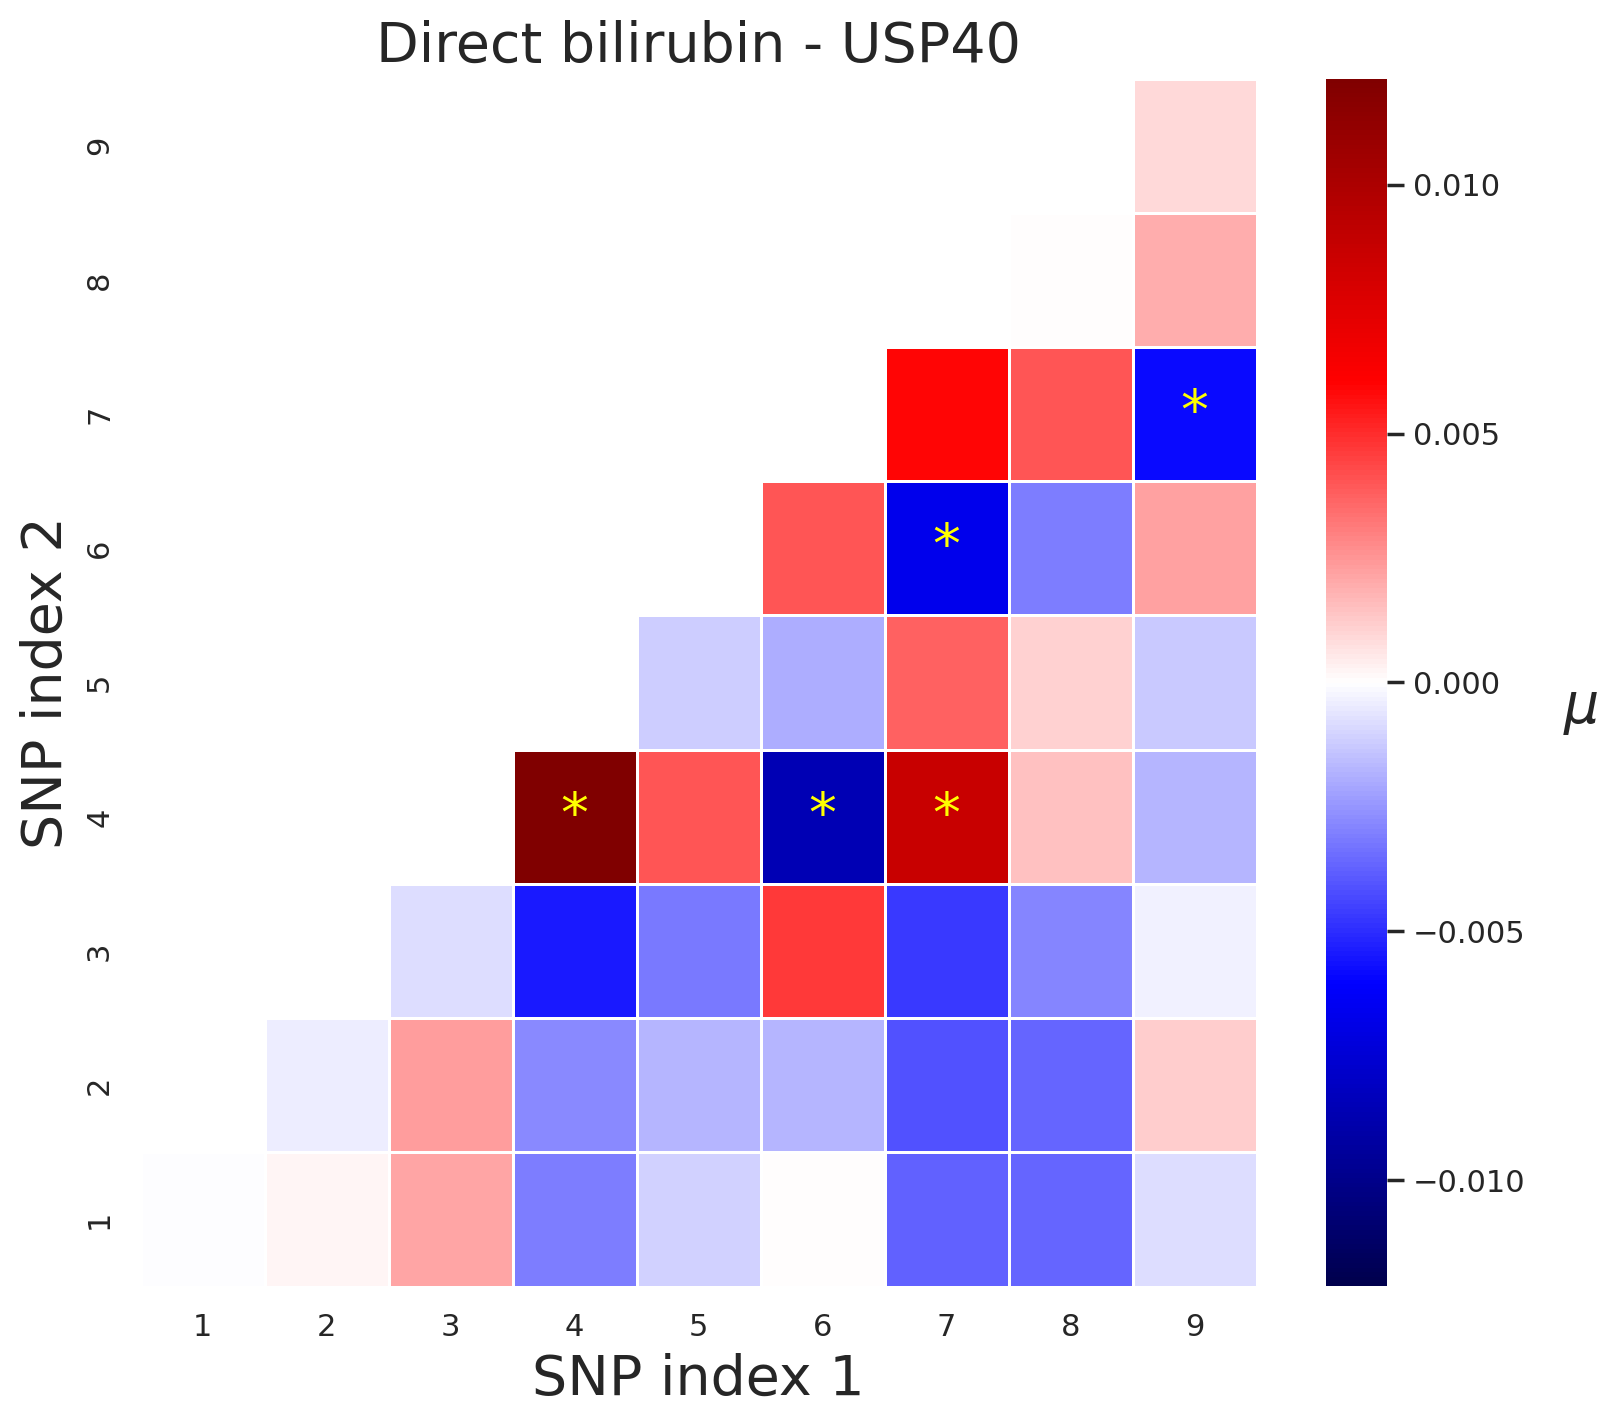

pStart: 234526353 vs pEnd: 234681204


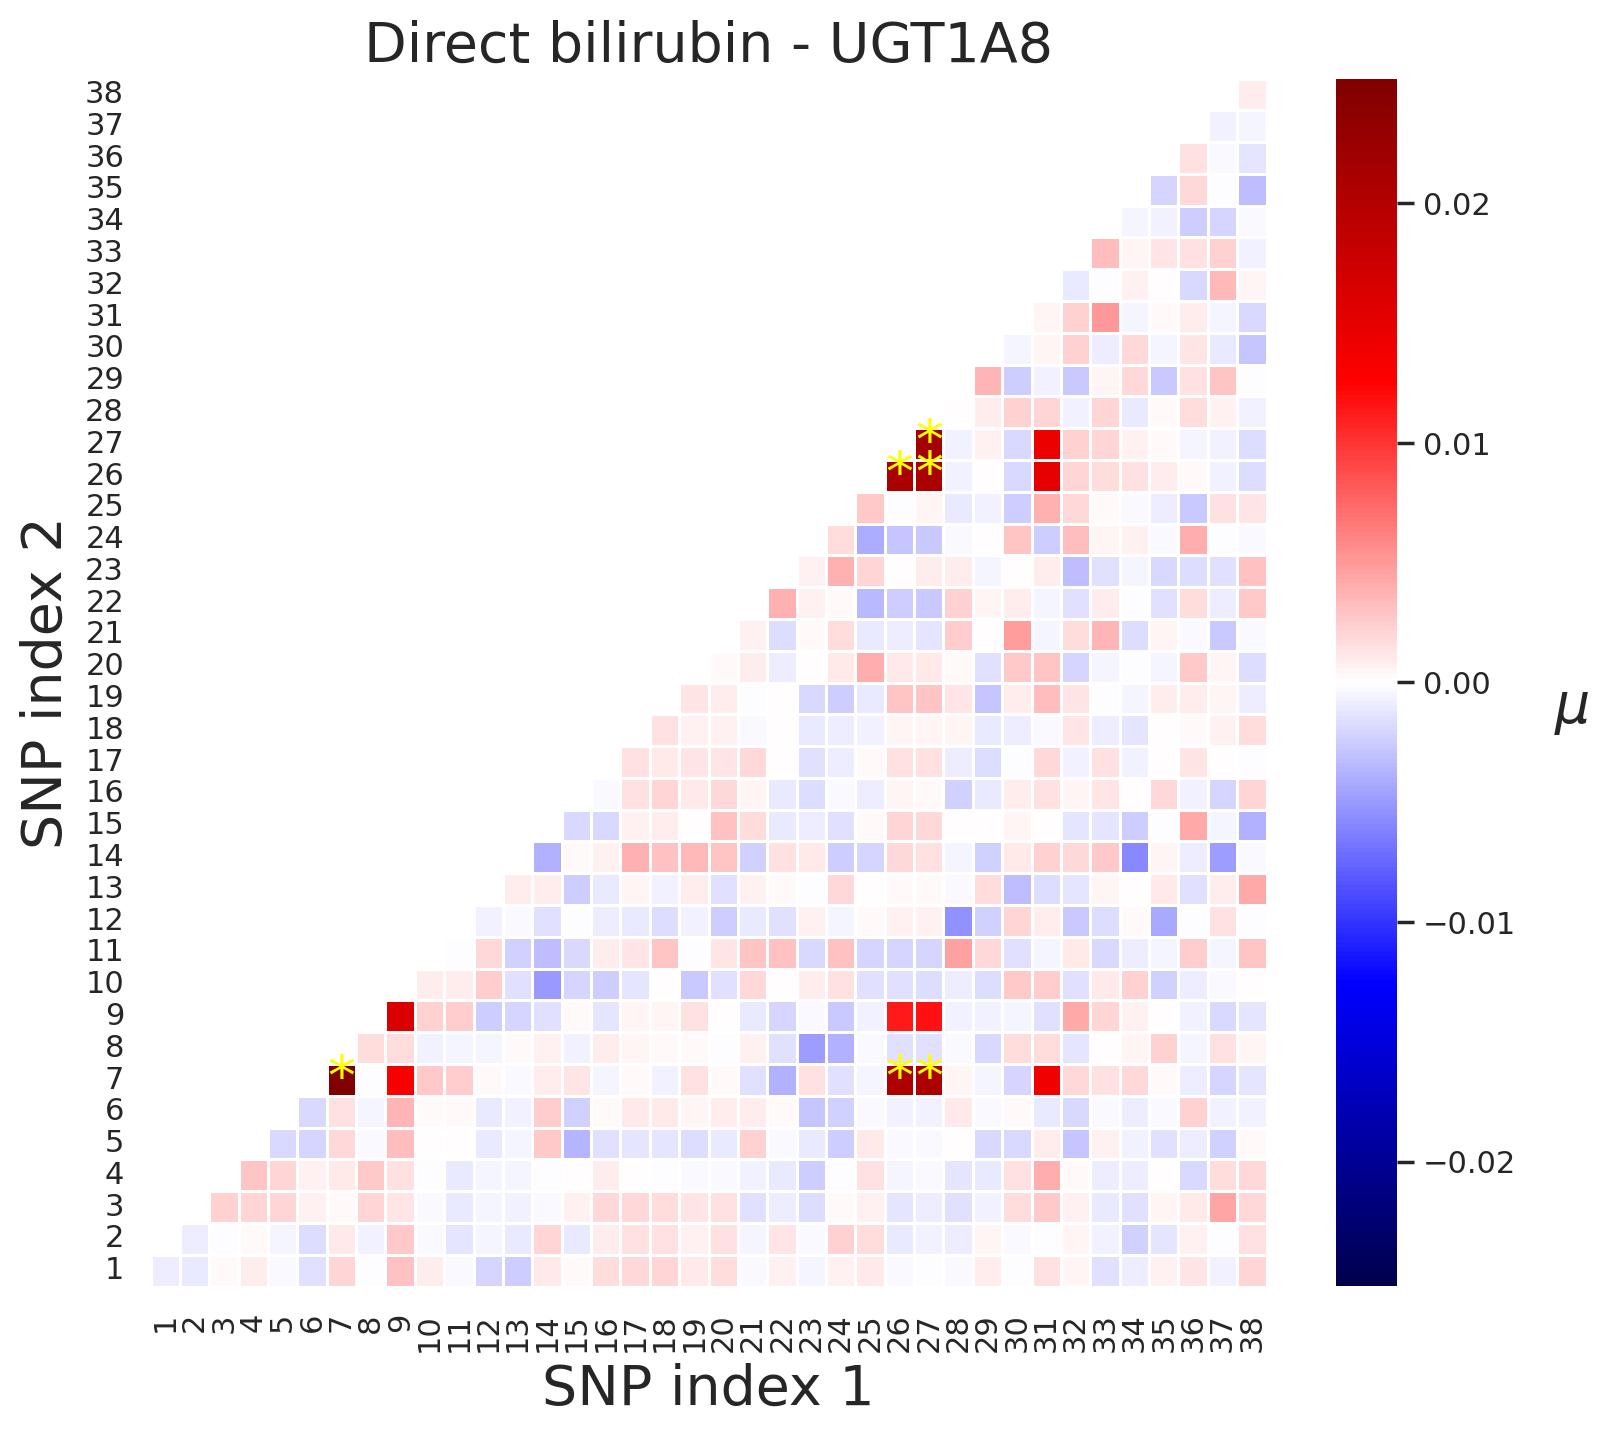

pStart: 57144322 vs pEnd: 57148180


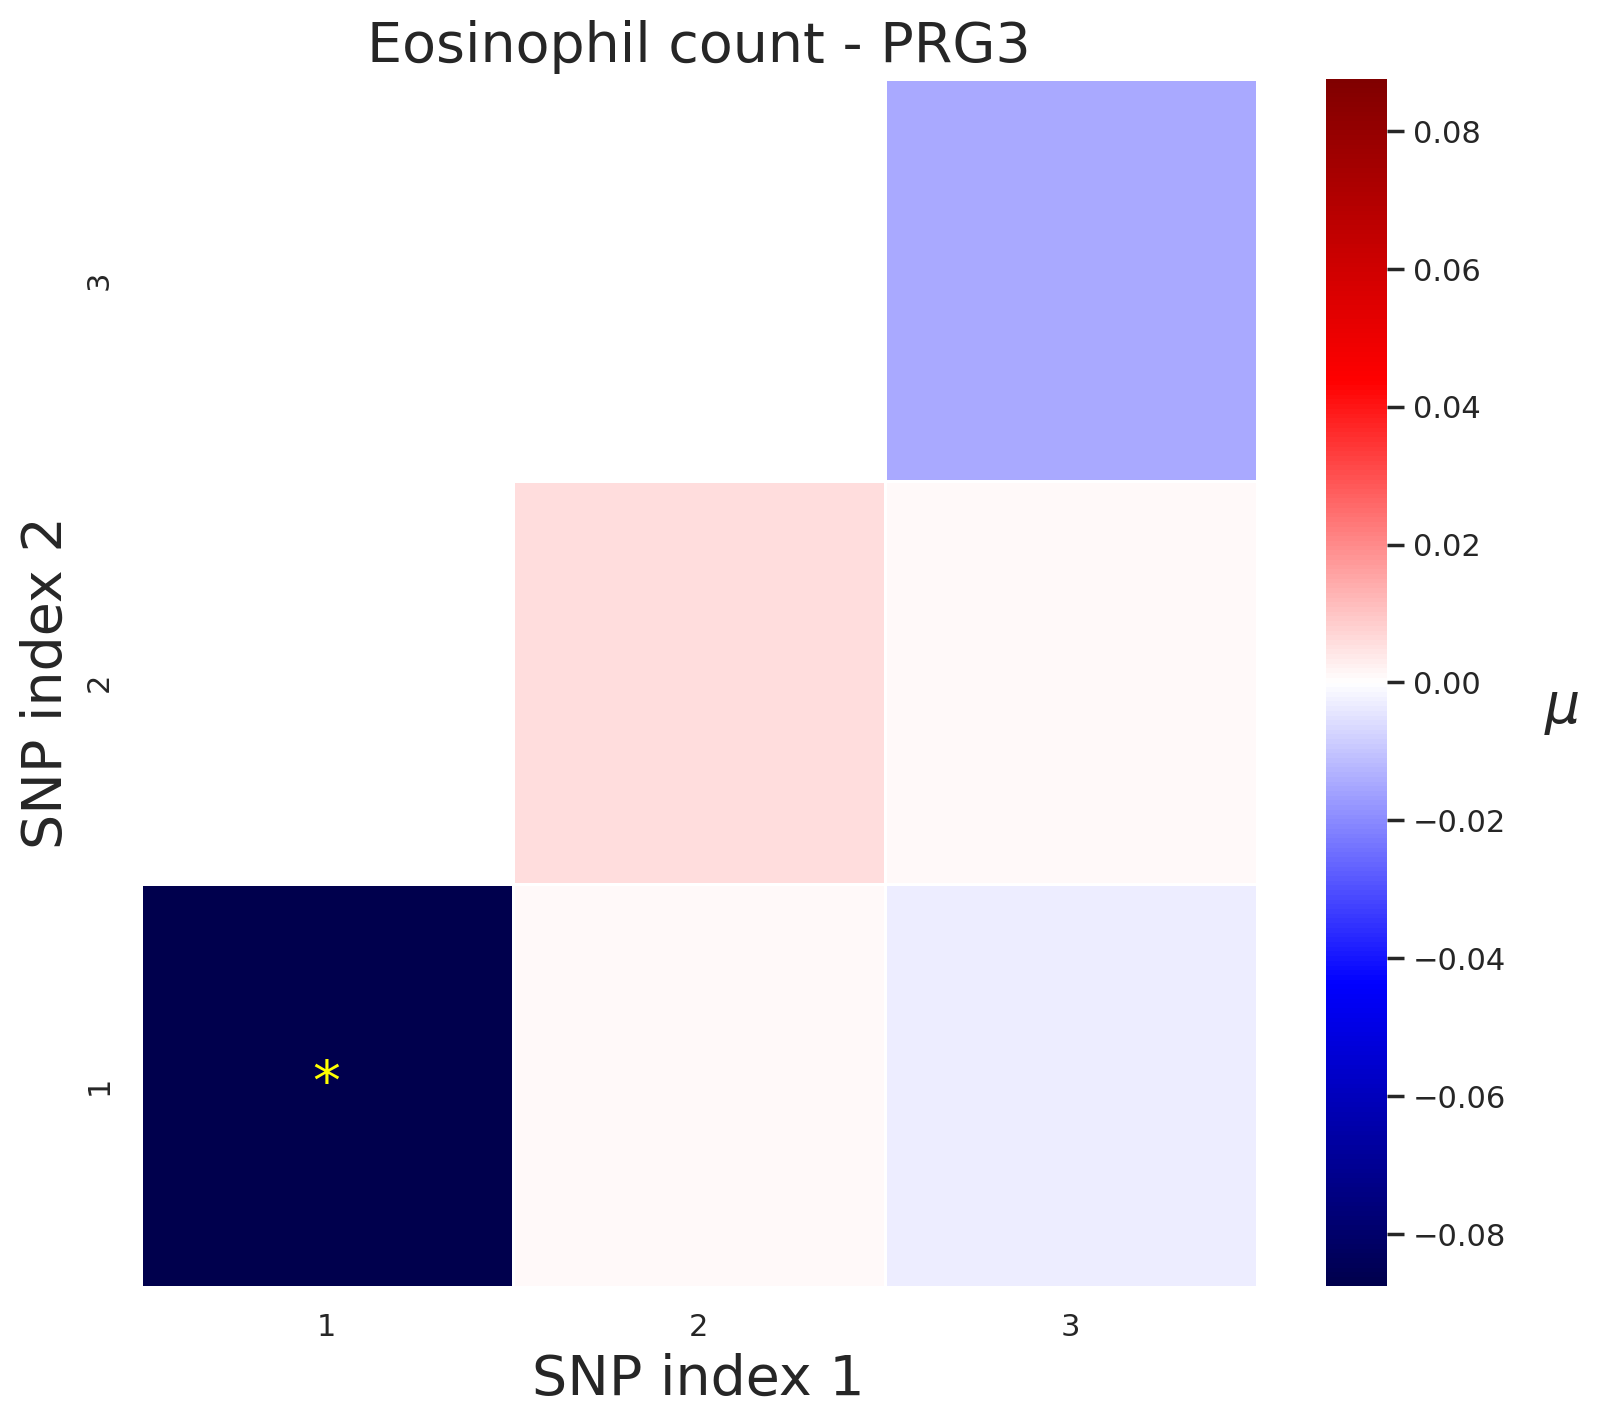

pStart: 56995891 vs pEnd: 57017577


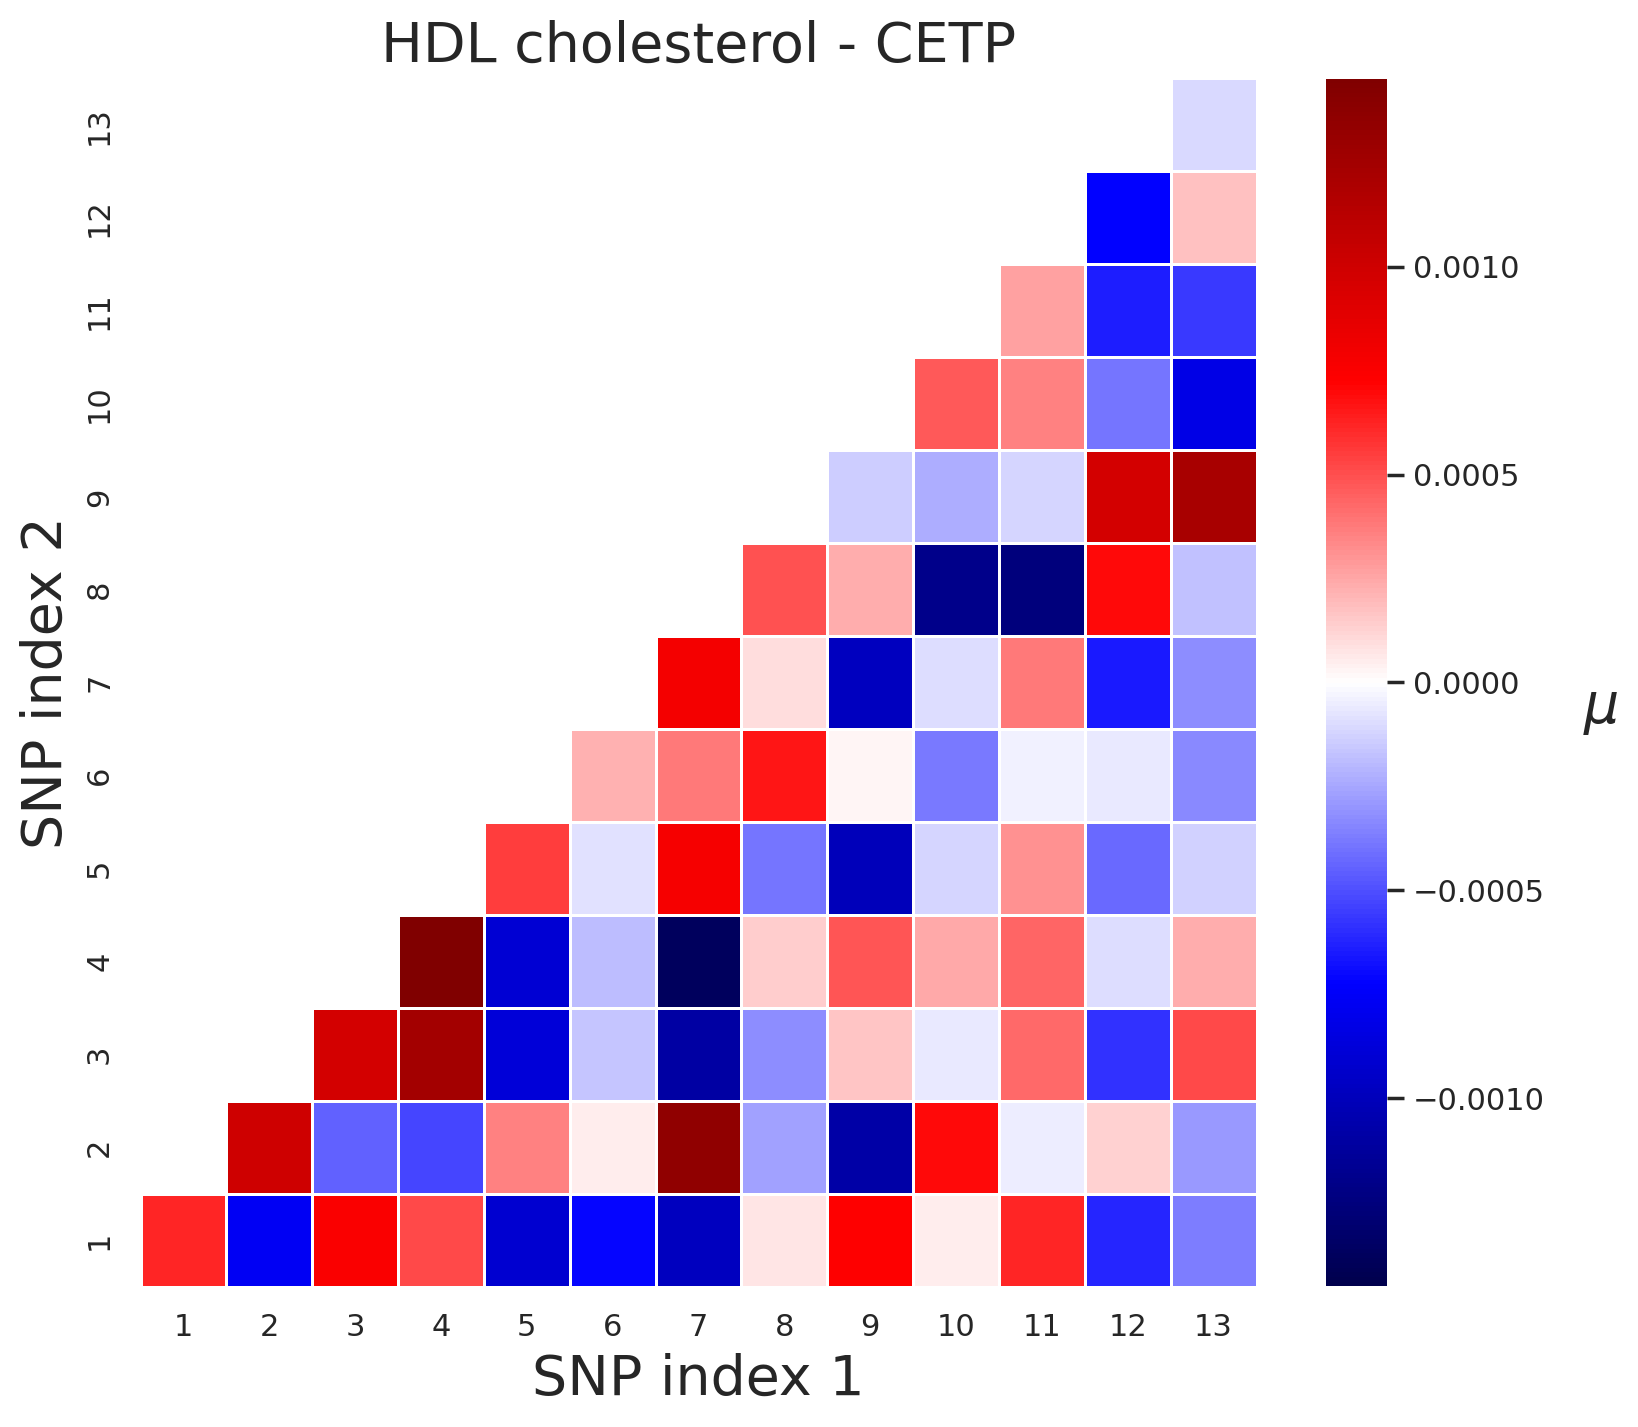

pStart: 71048499 vs pEnd: 71160890


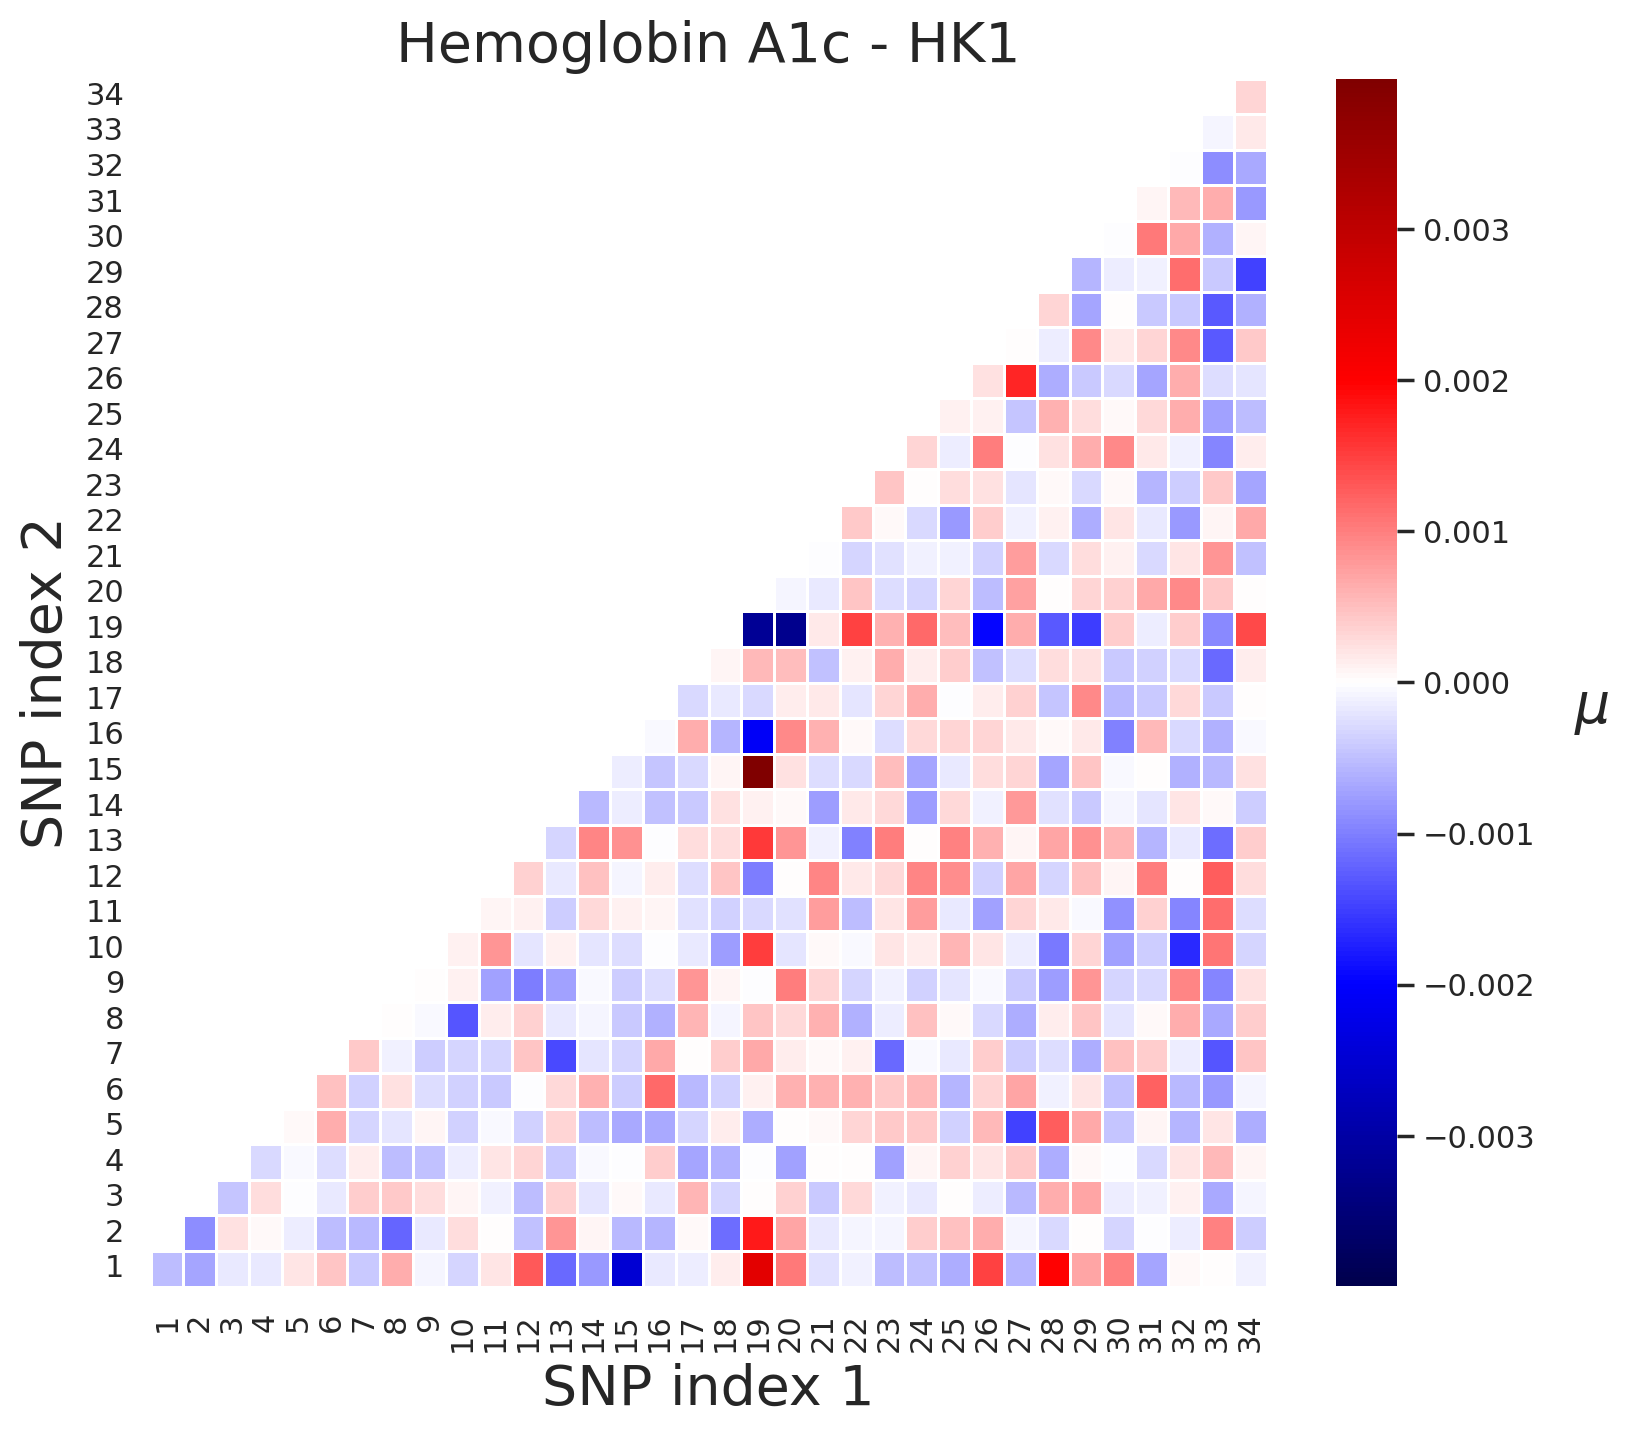

pStart: 45409881 vs pEnd: 45412506


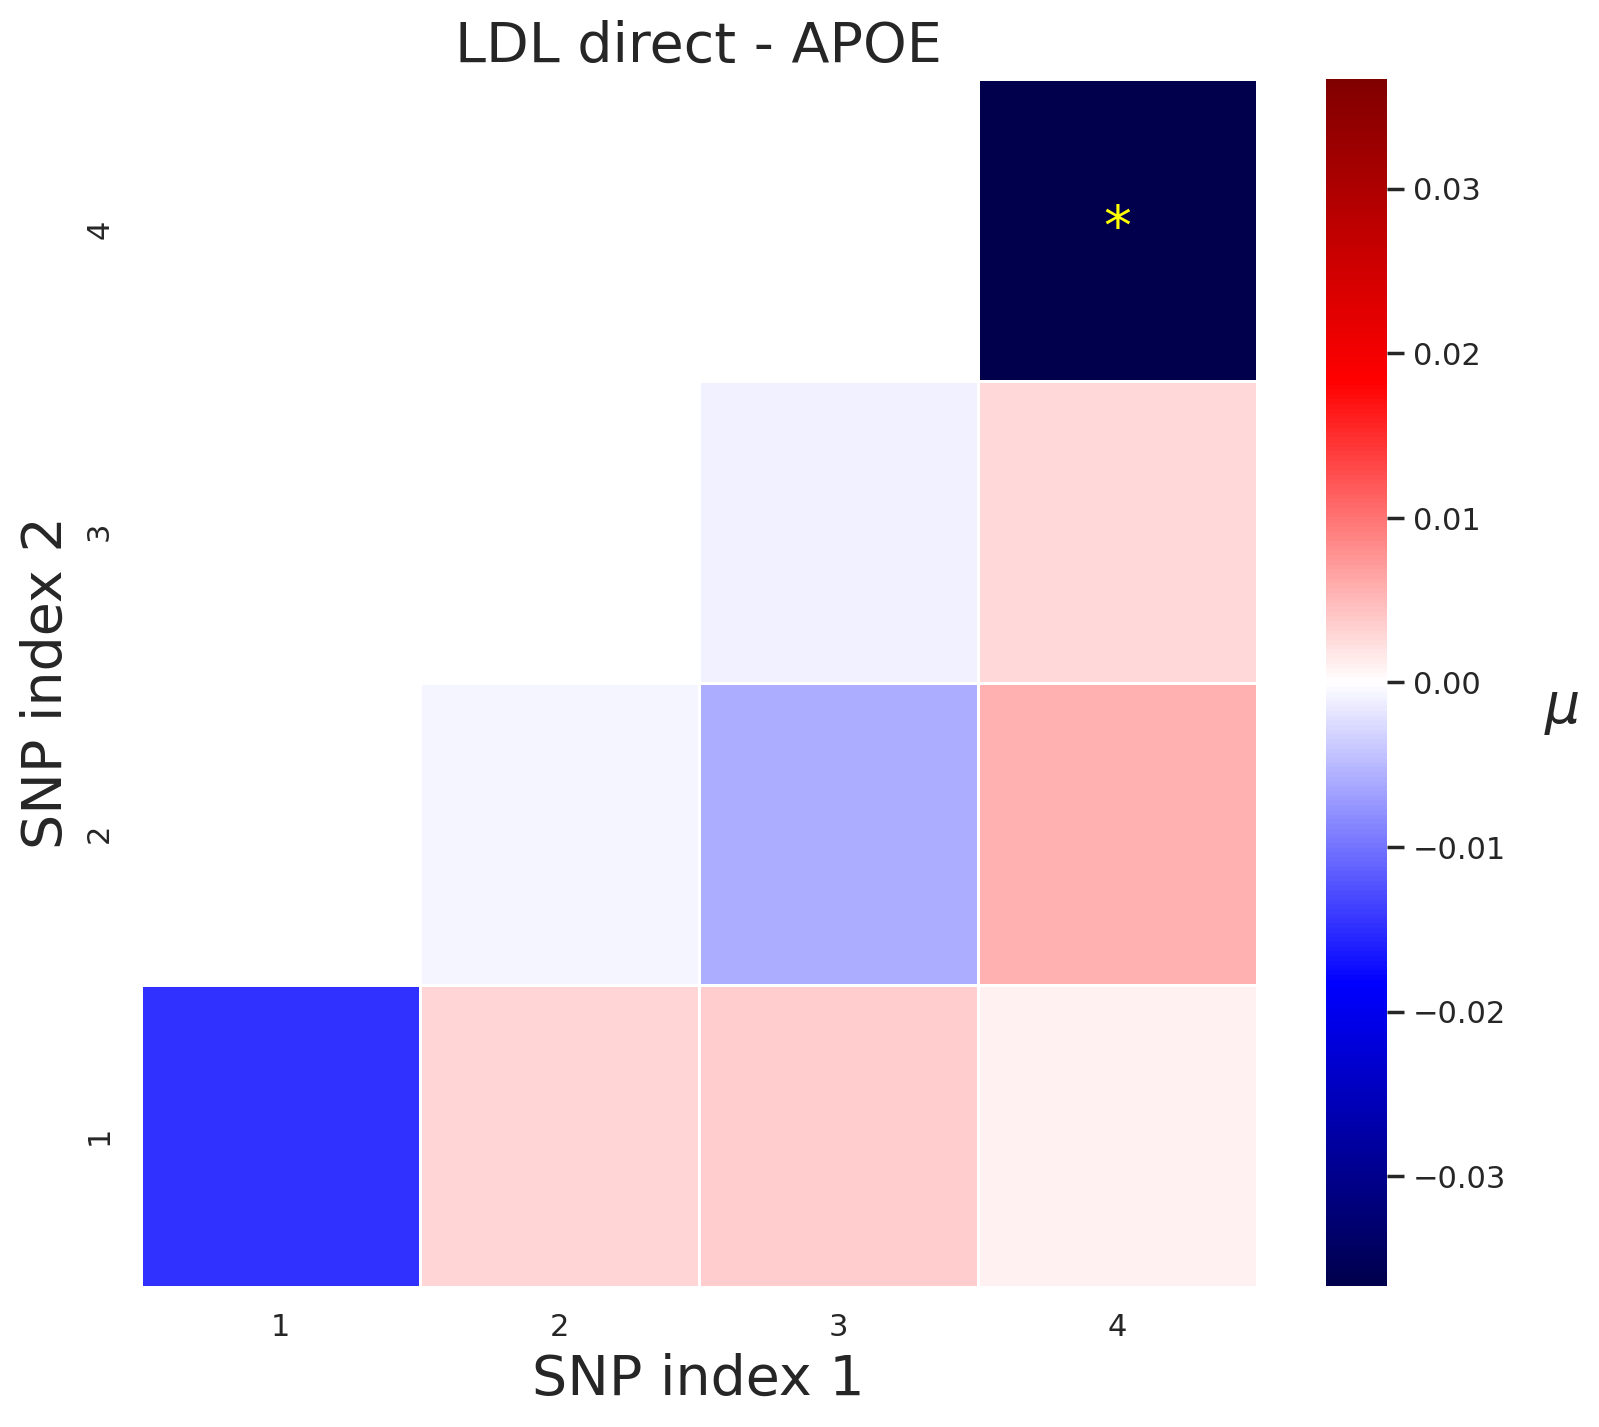

pStart: 160390278 vs pEnd: 160526115


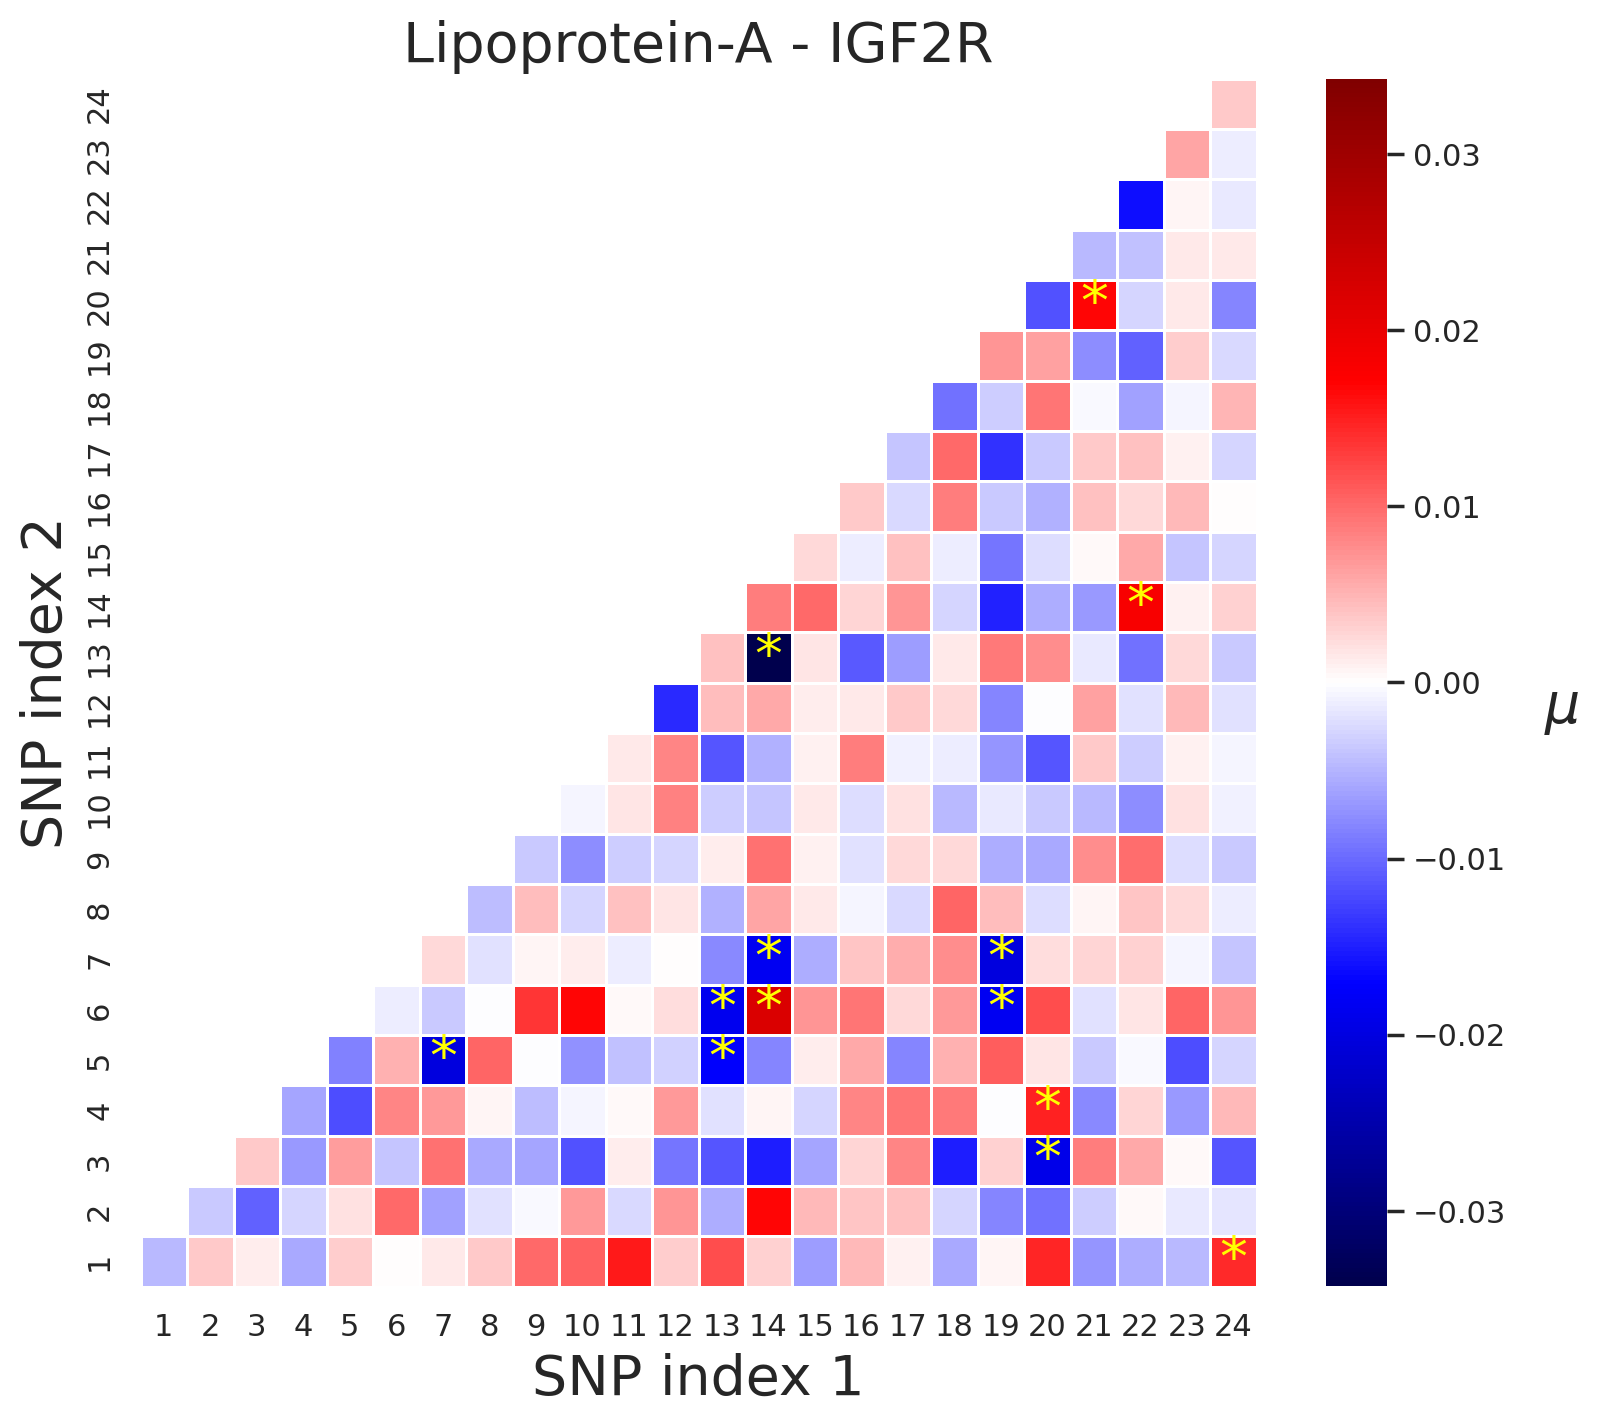

pStart: 160638463 vs pEnd: 160679788


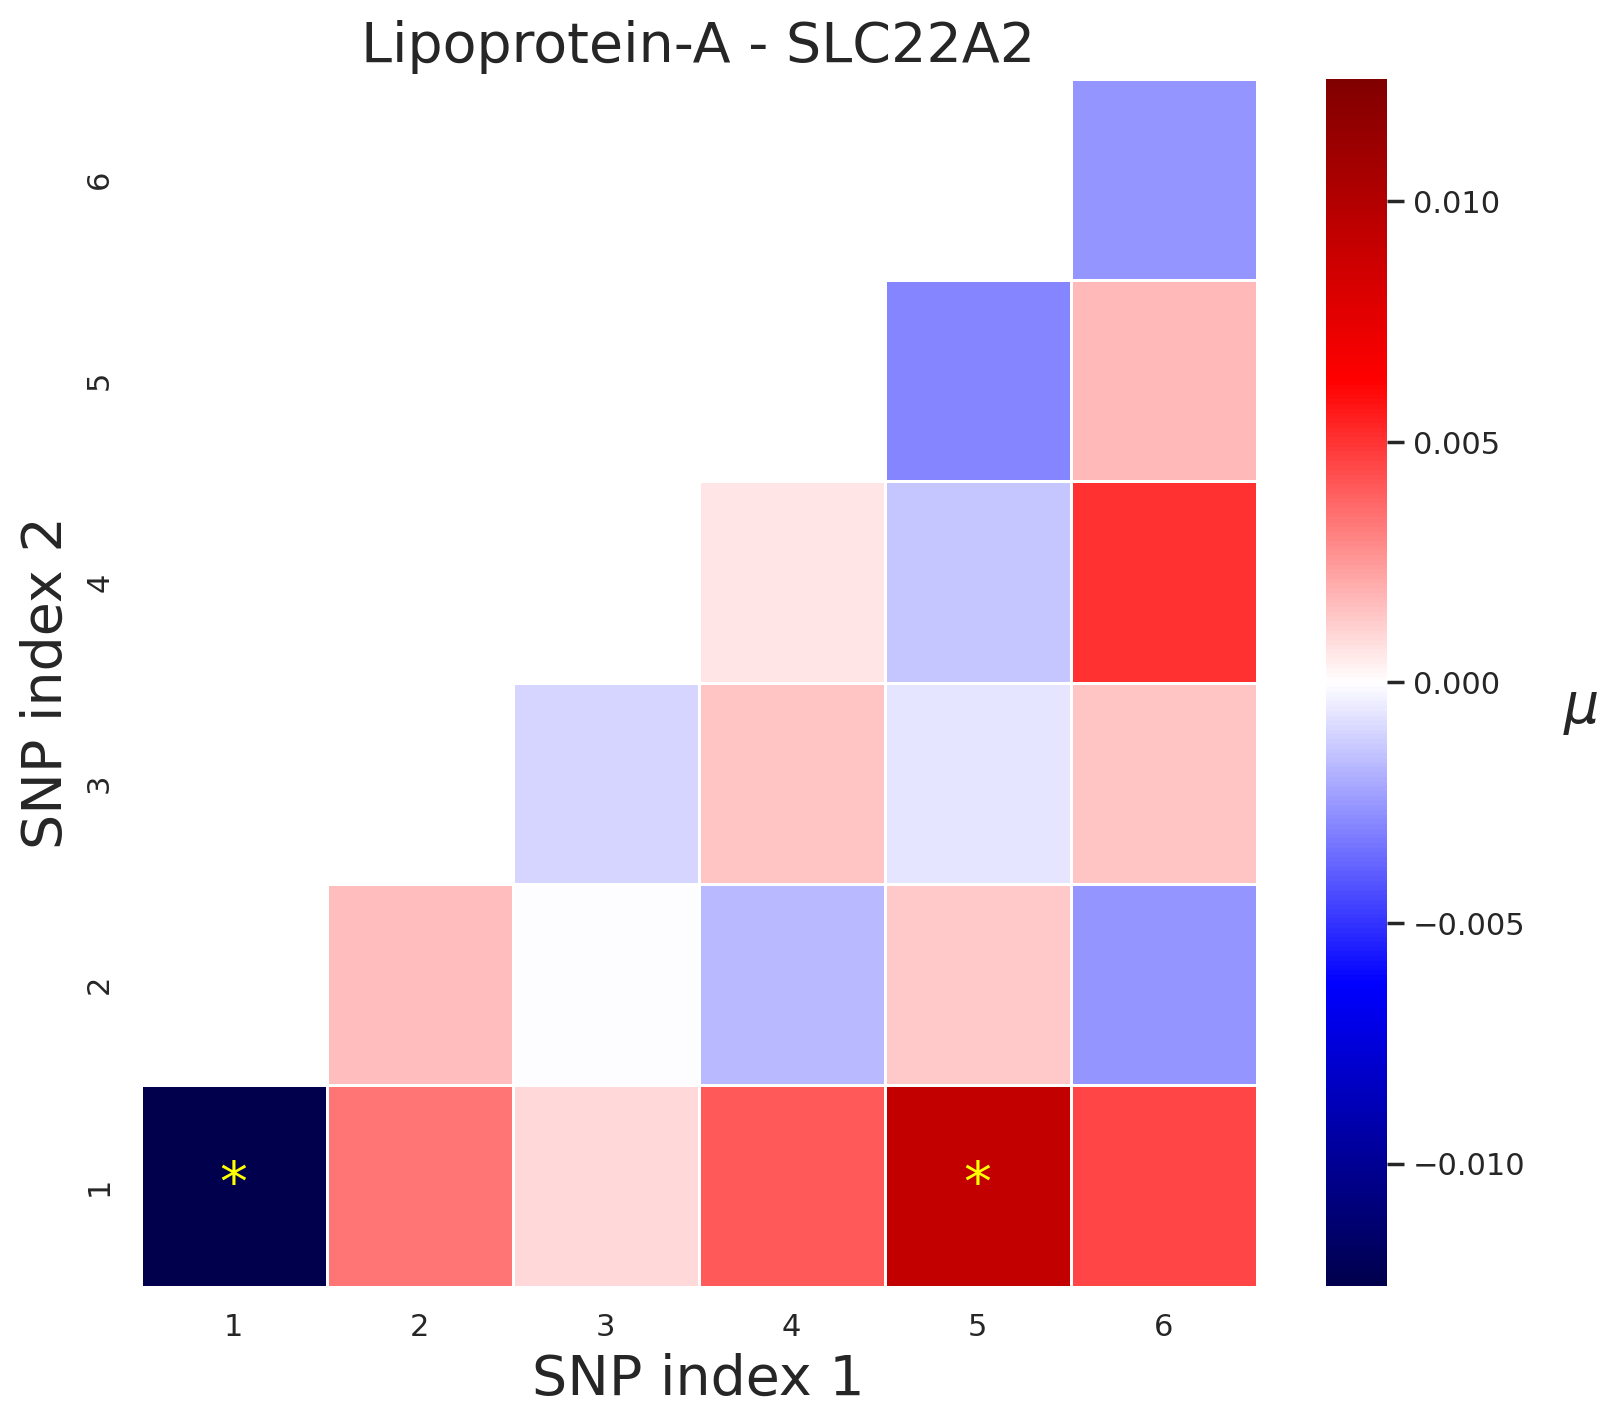

pStart: 160769451 vs pEnd: 160872087


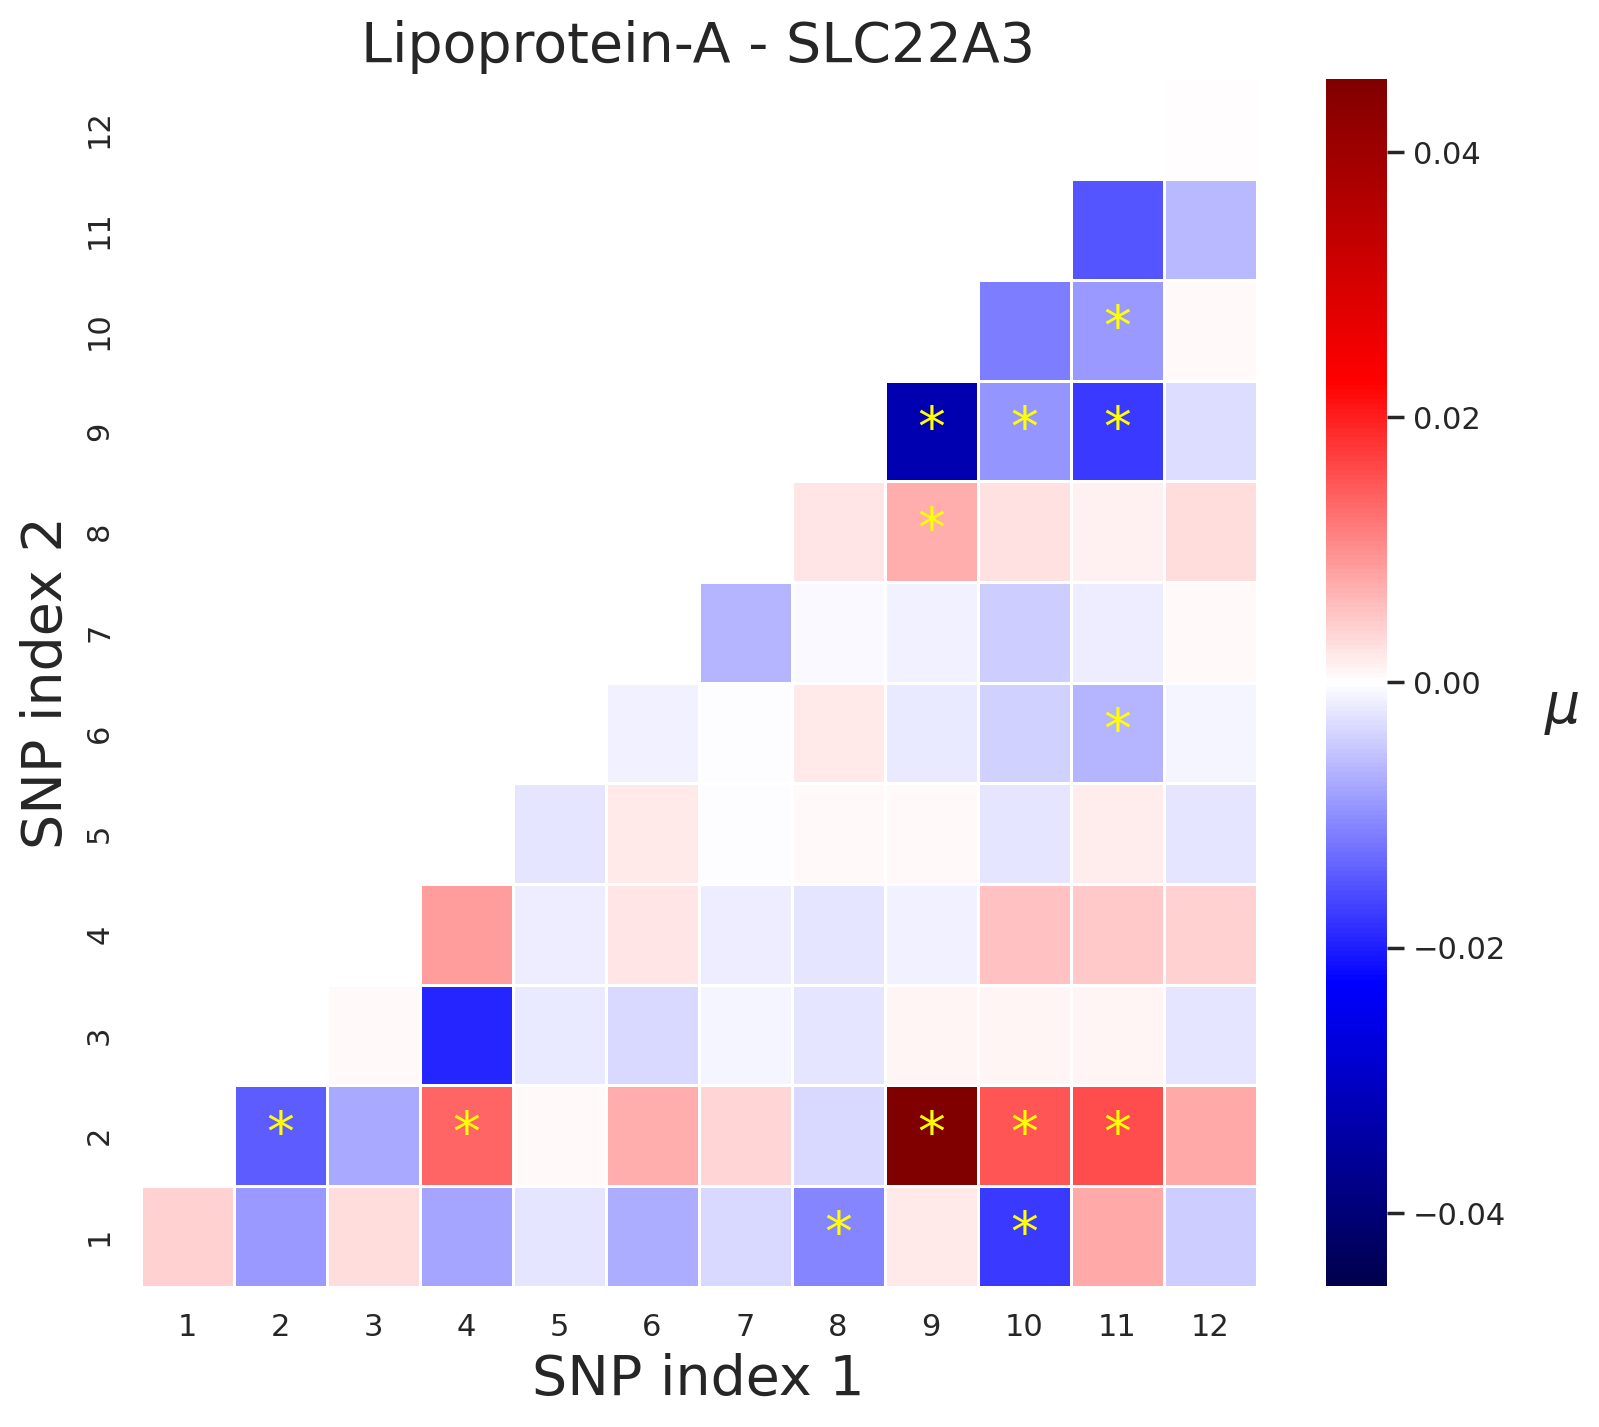

pStart: 160952760 vs pEnd: 161085245


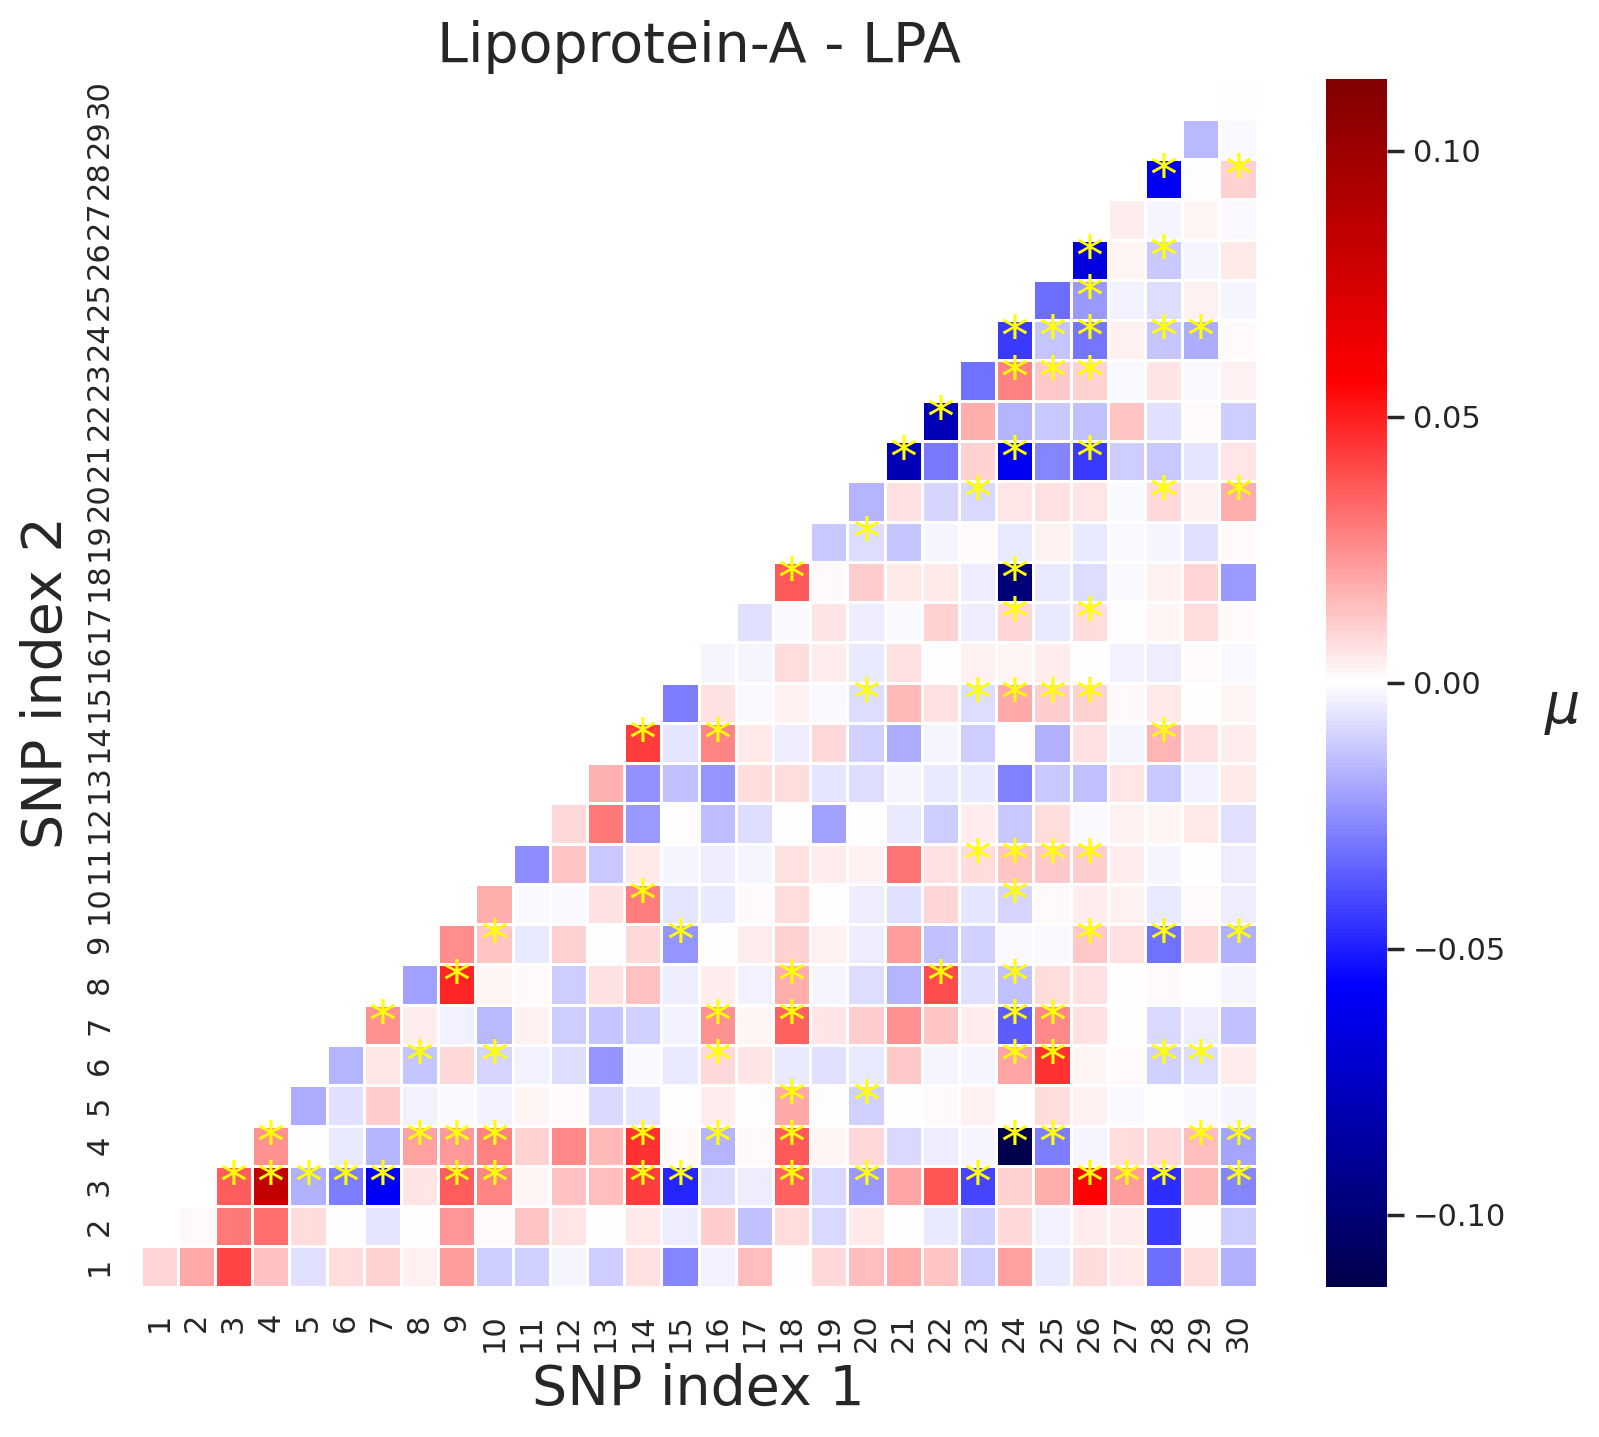

pStart: 161123336 vs pEnd: 161174092


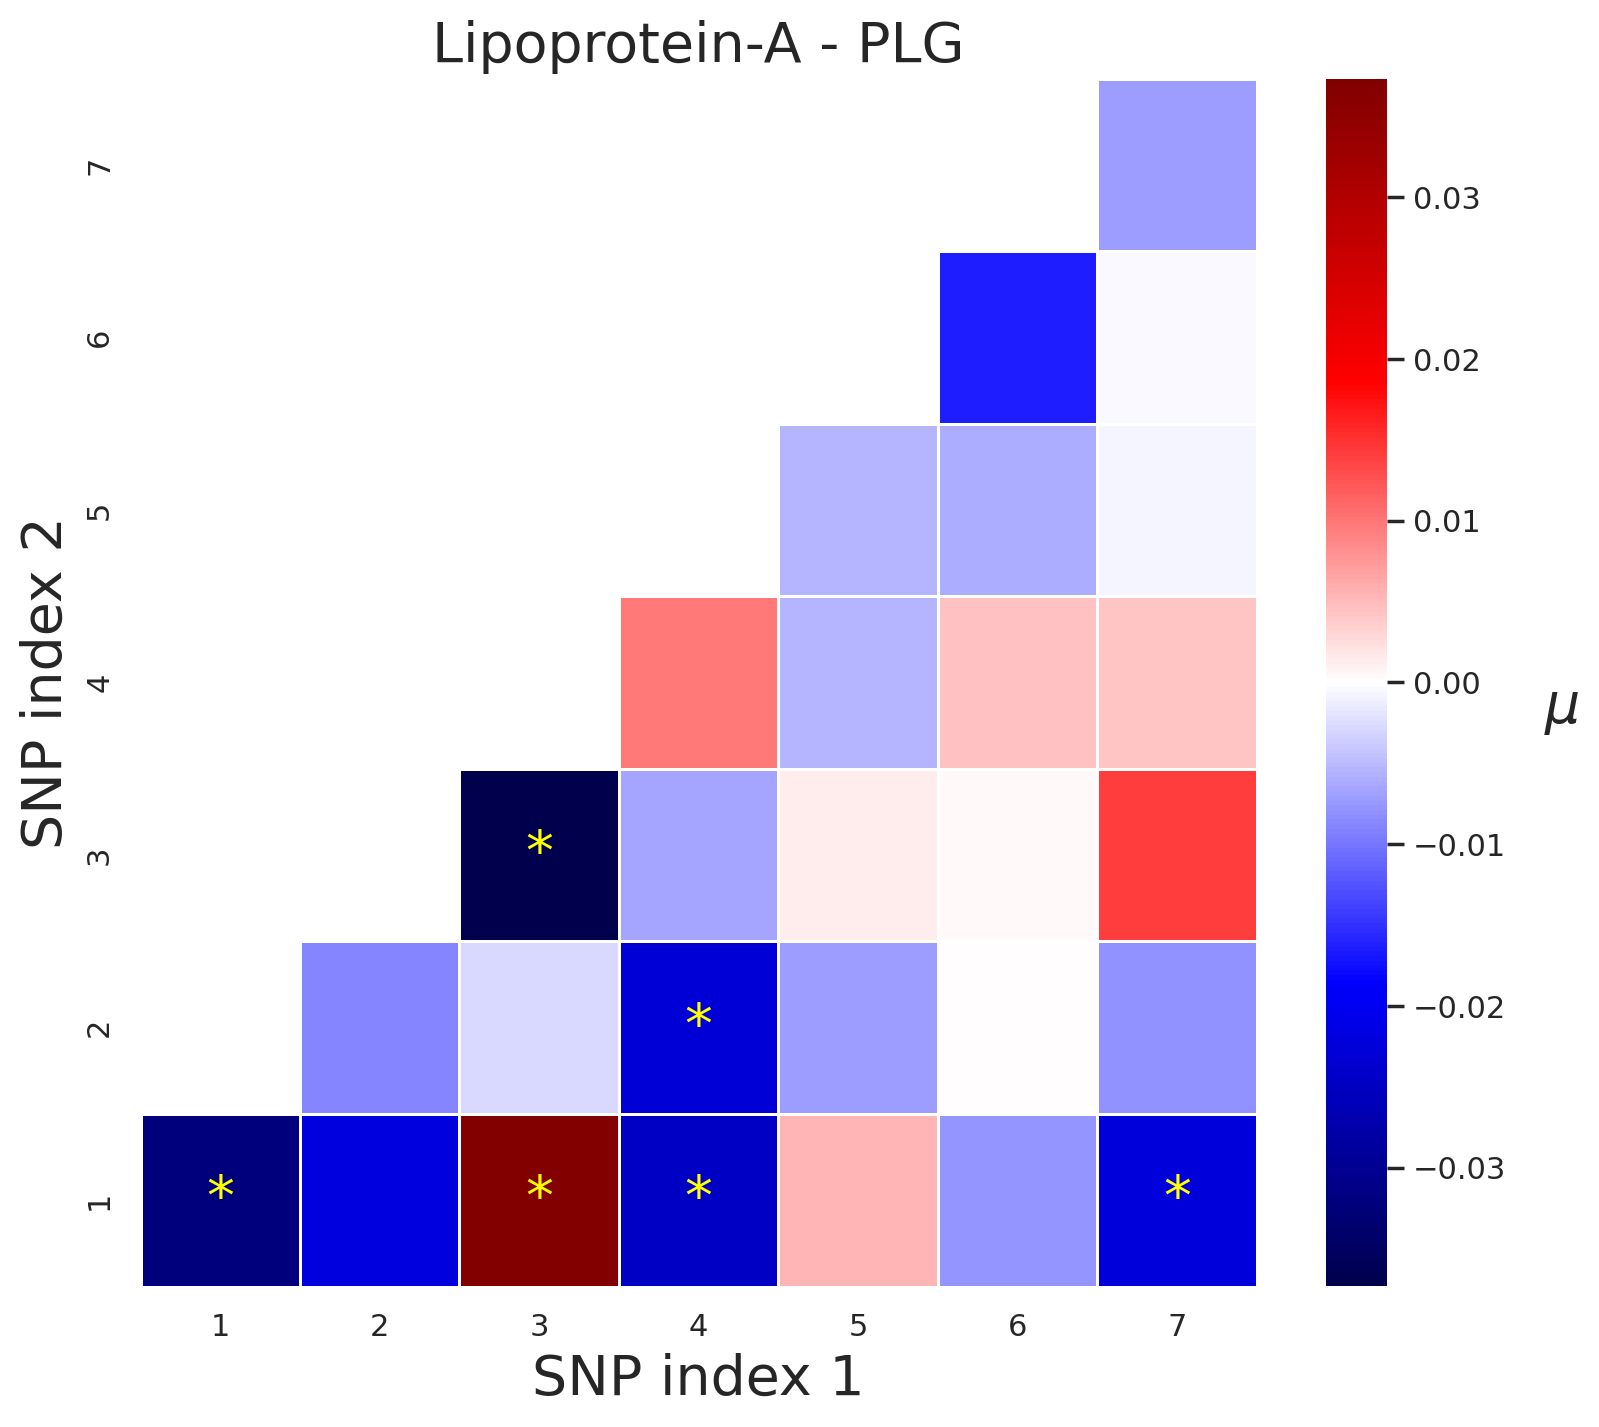

pStart: 161557571 vs pEnd: 161653244


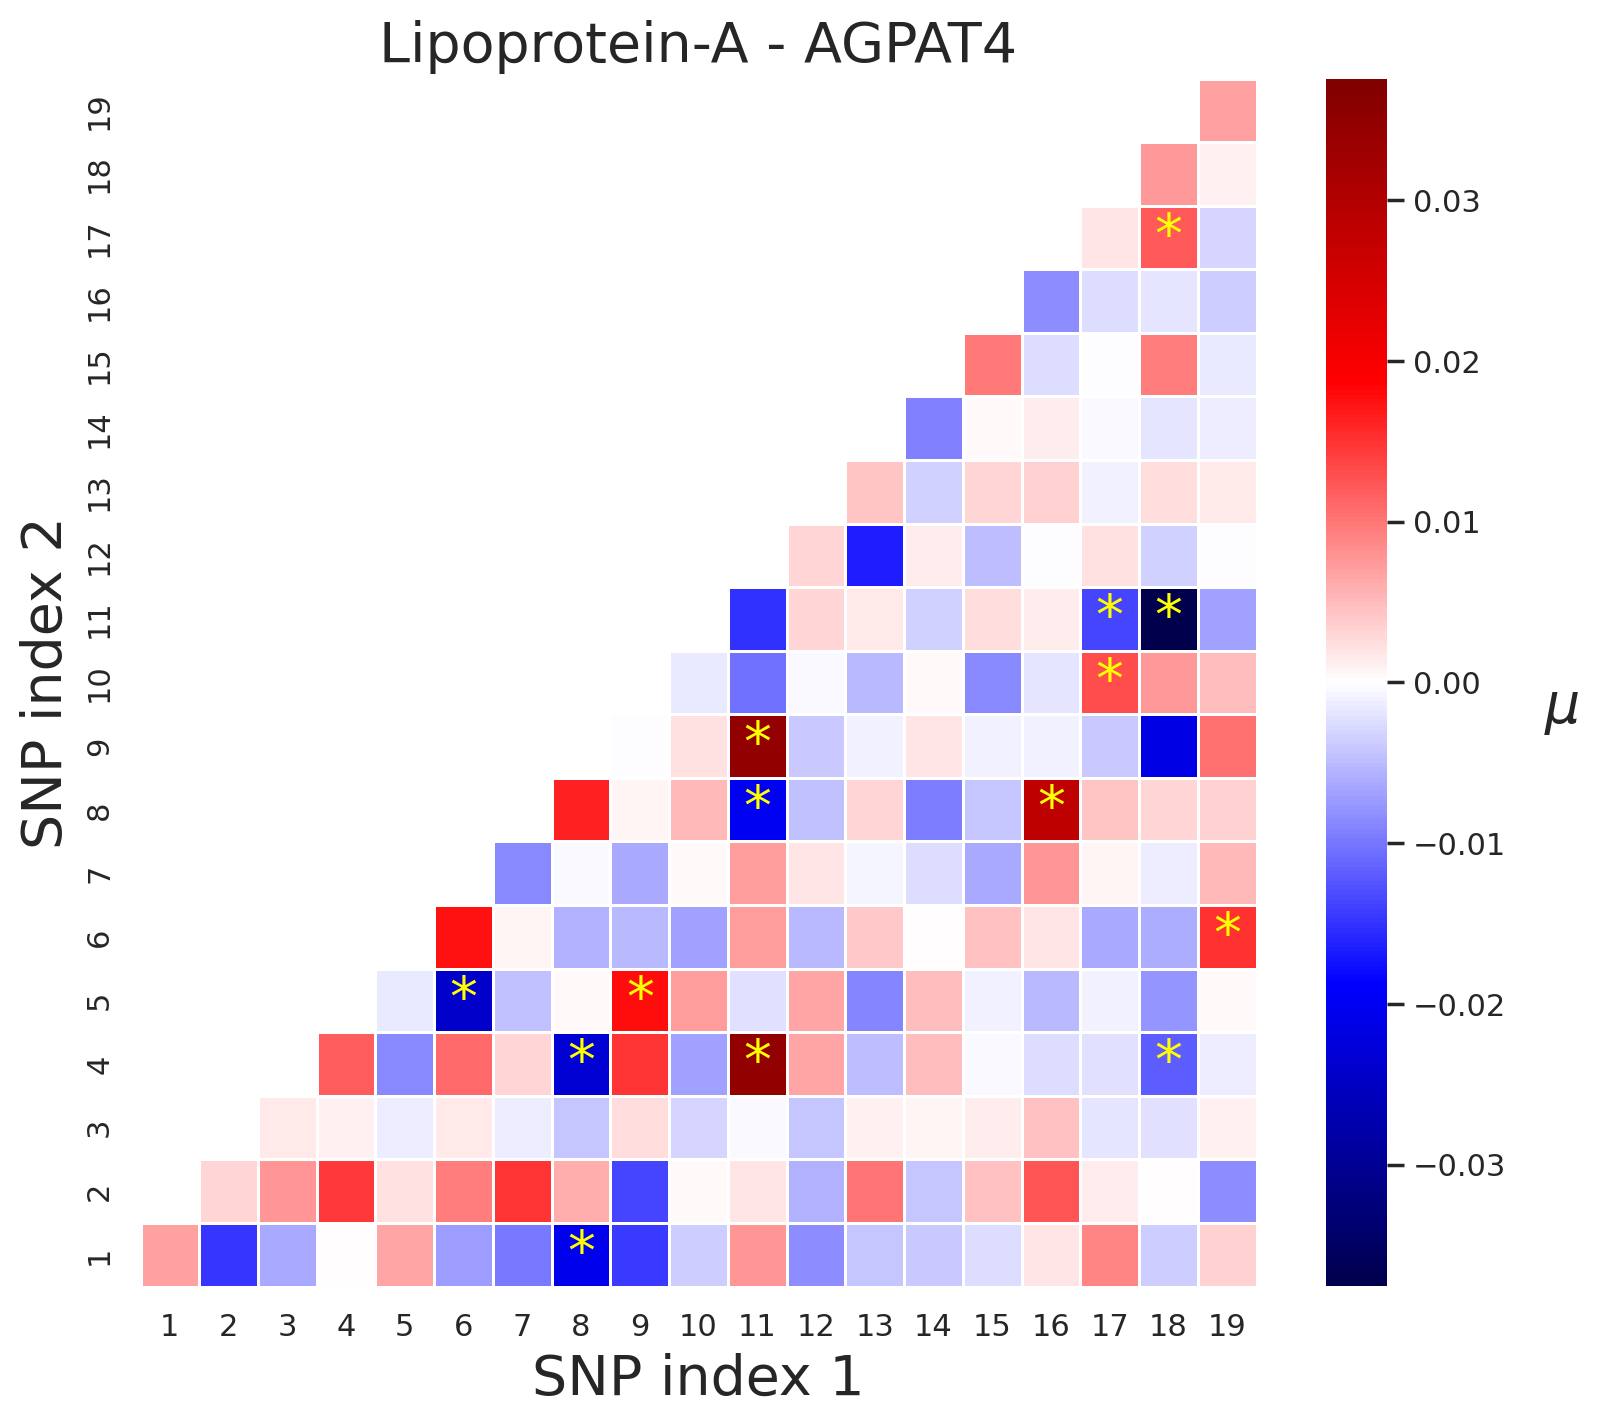

pStart: 37462119 vs pEnd: 37499578


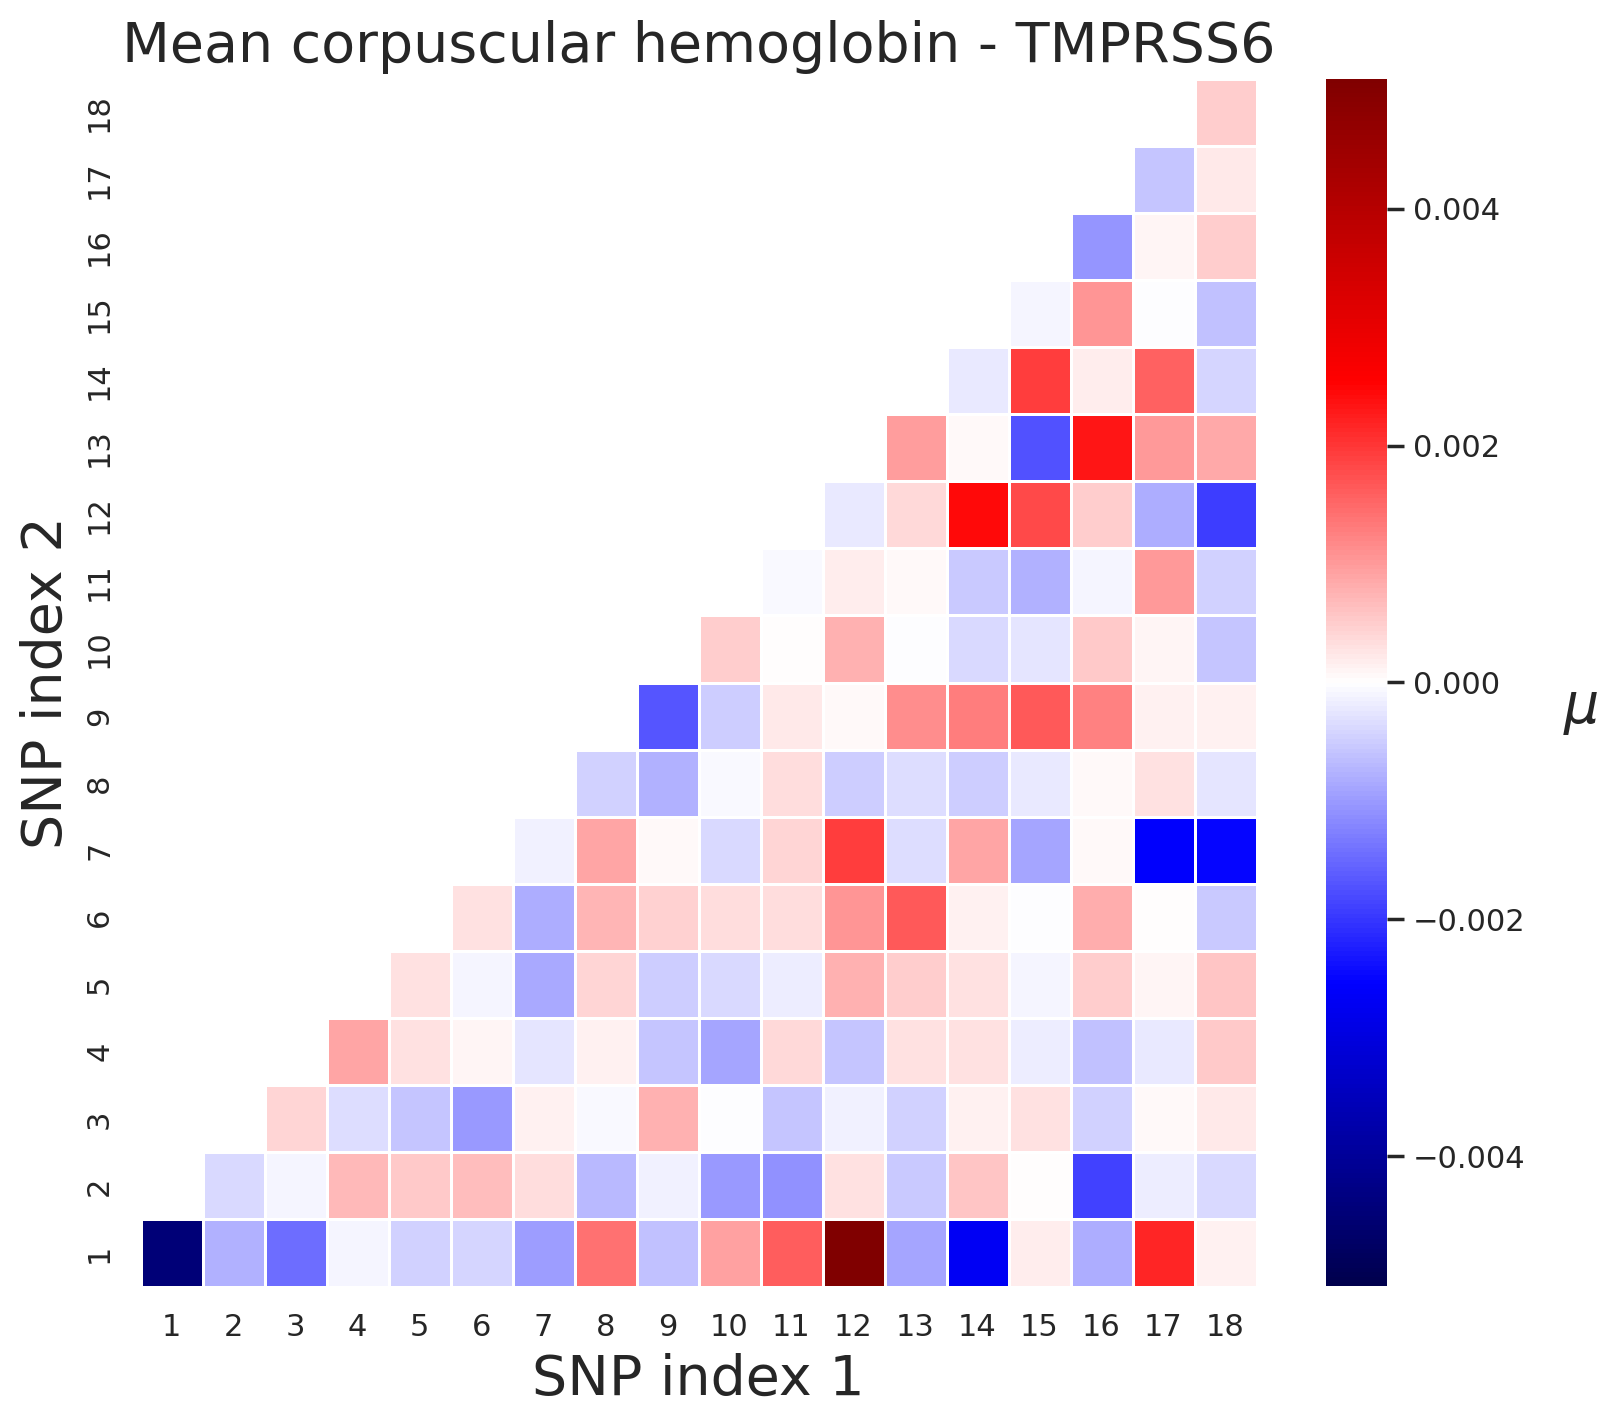

pStart: 158576228 vs pEnd: 158577169


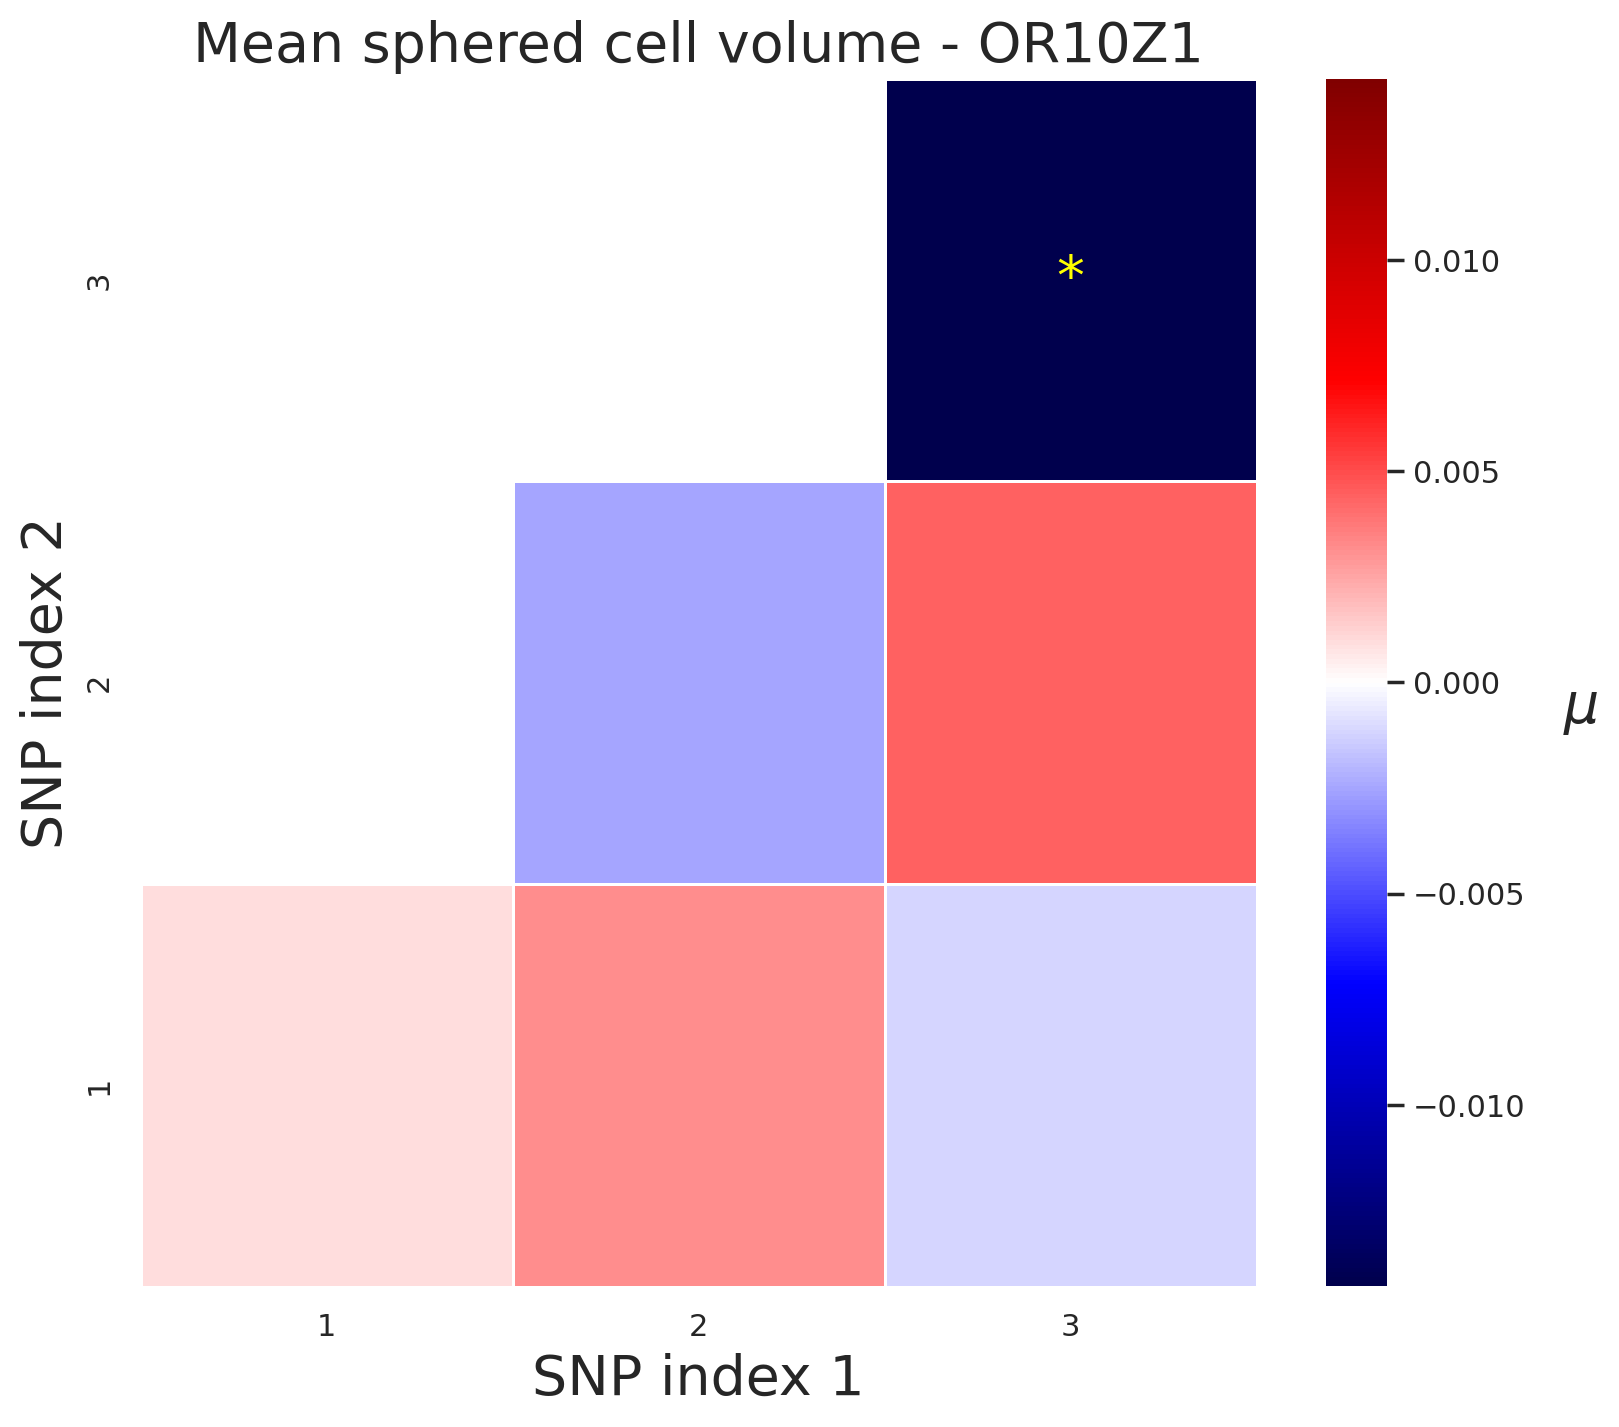

pStart: 158581053 vs pEnd: 158656306


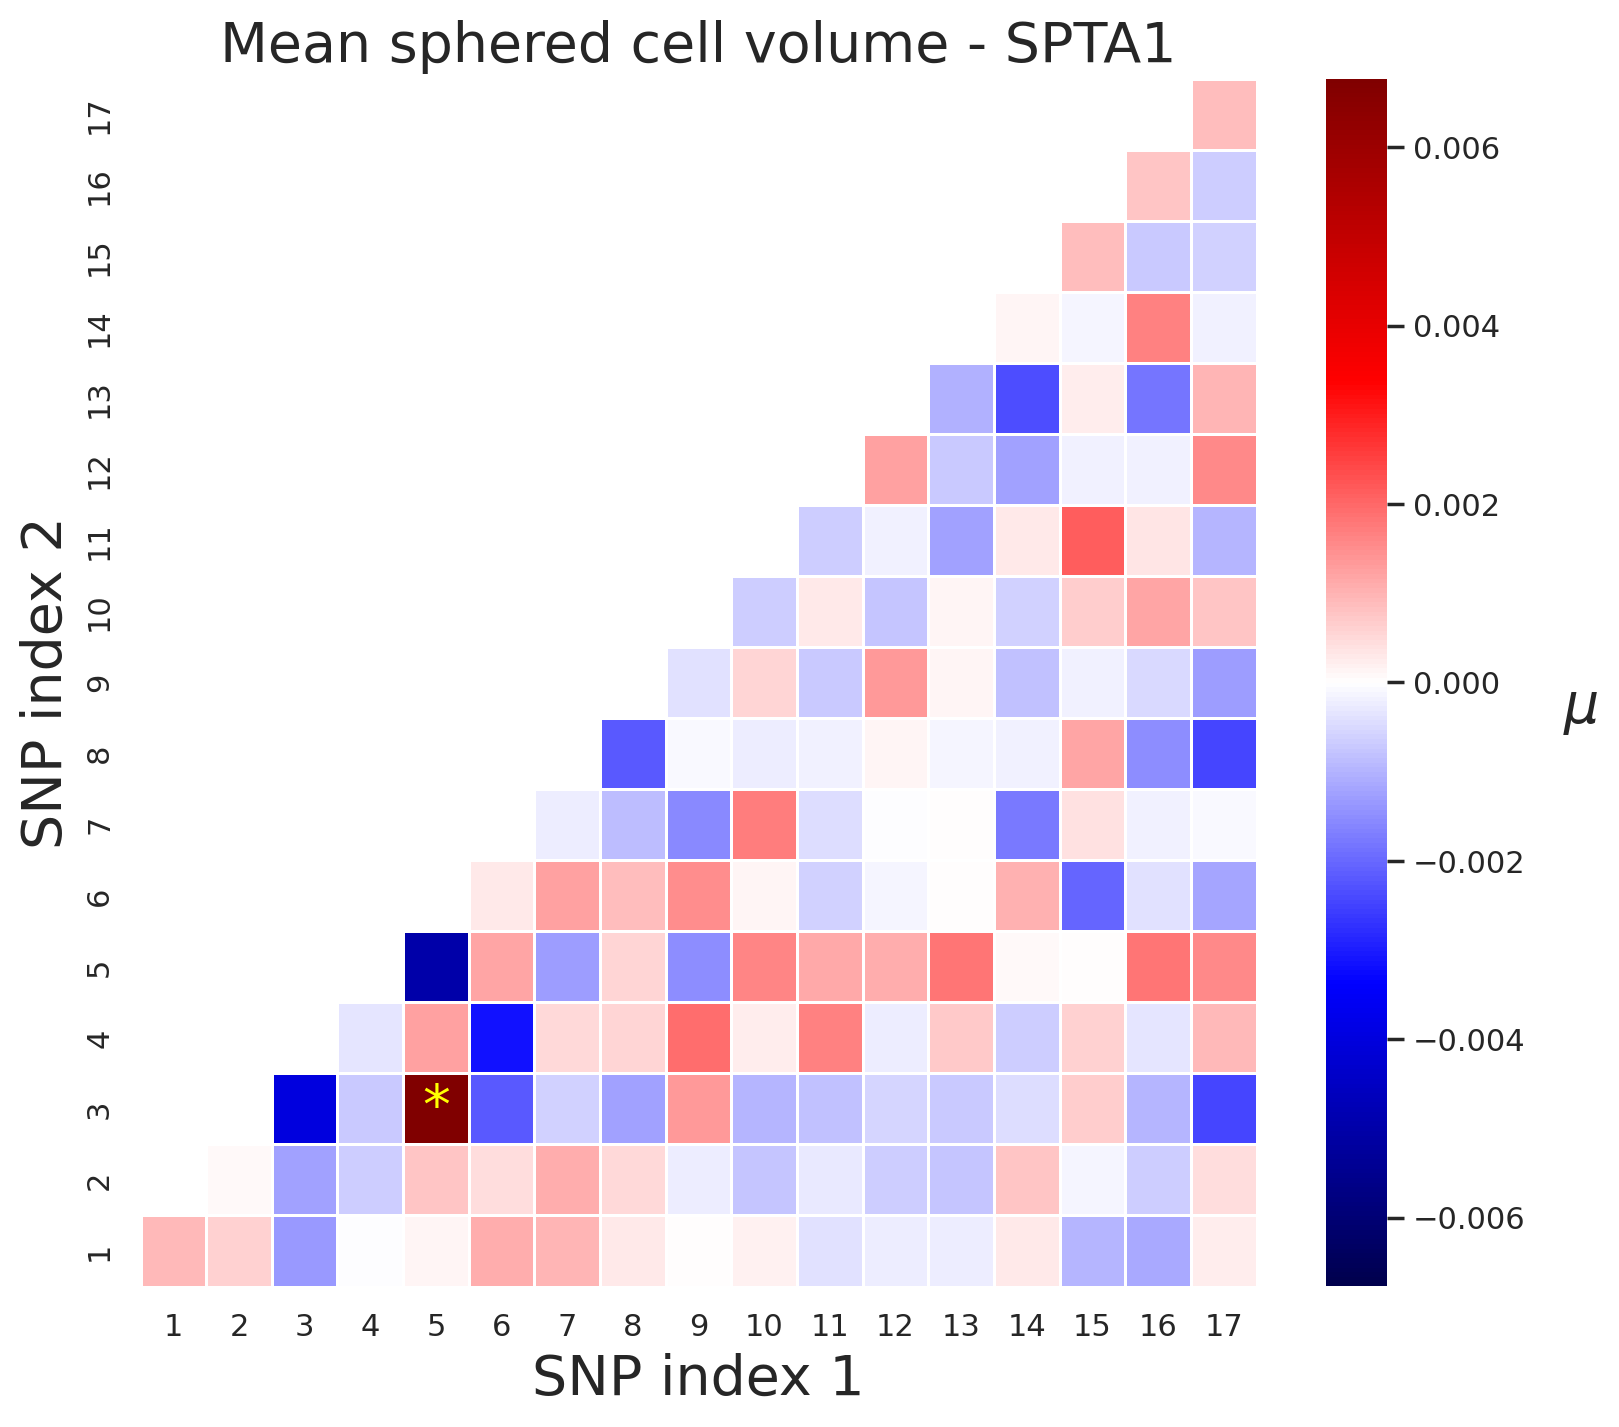

pStart: 17662372 vs pEnd: 17690566


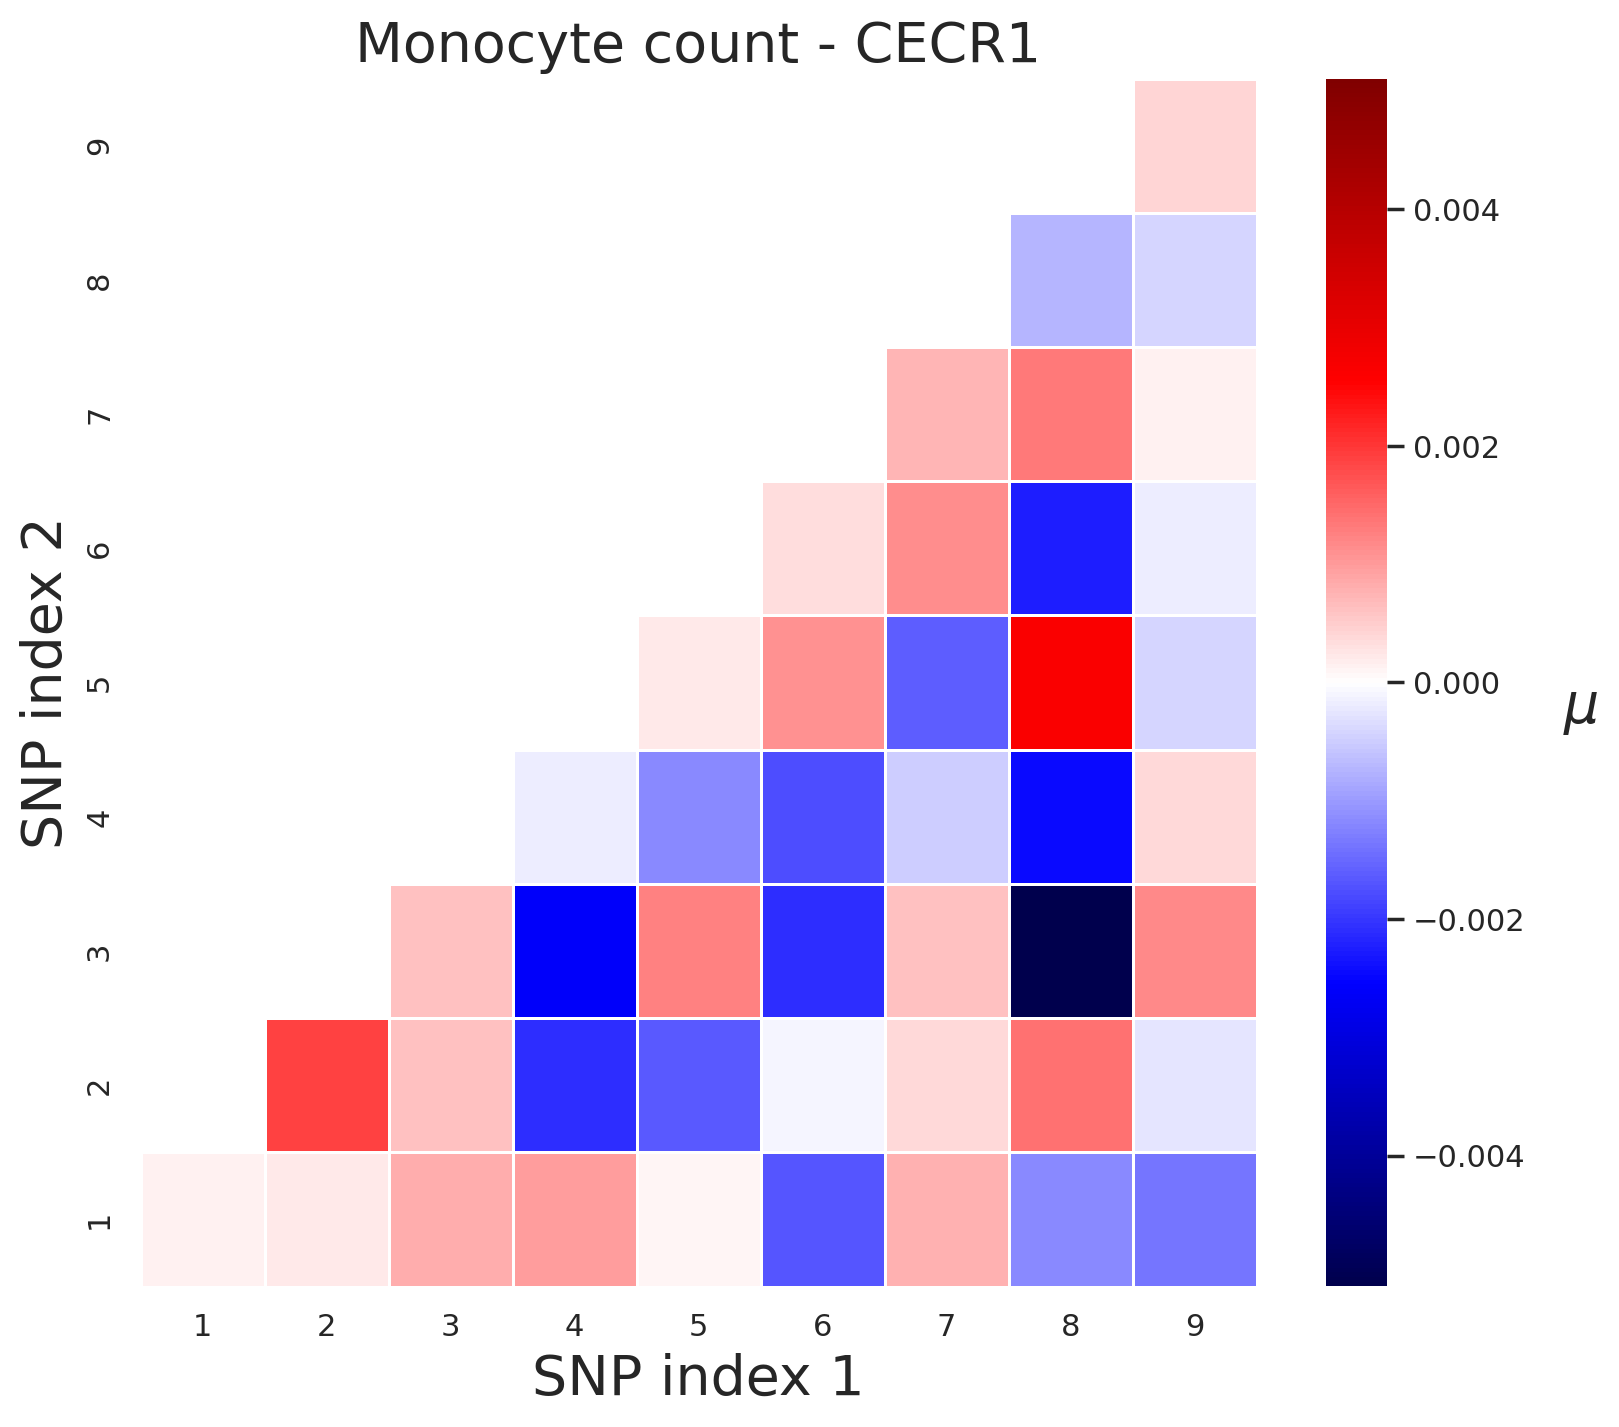

pStart: 57594577 vs pEnd: 57599837


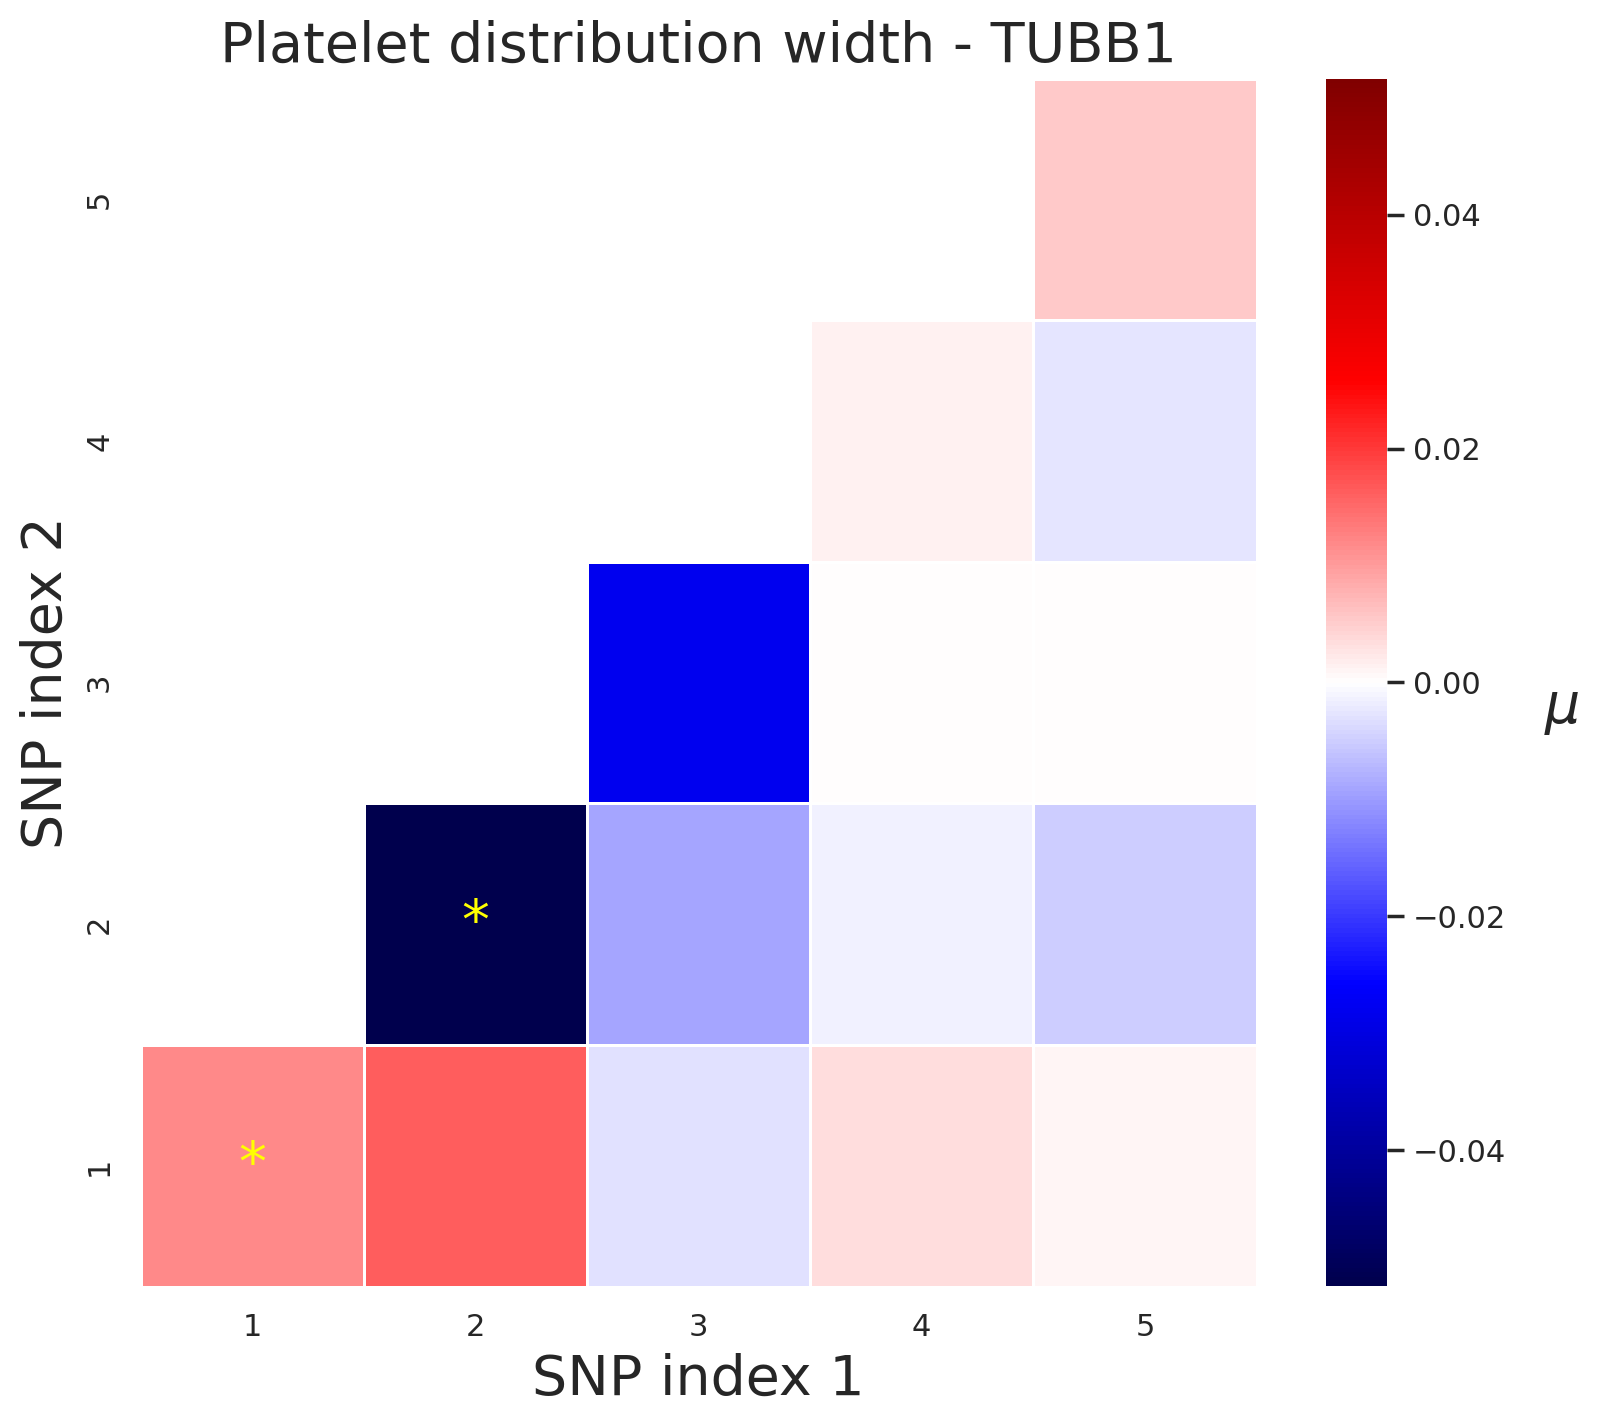

pStart: 57875867 vs pEnd: 57899513


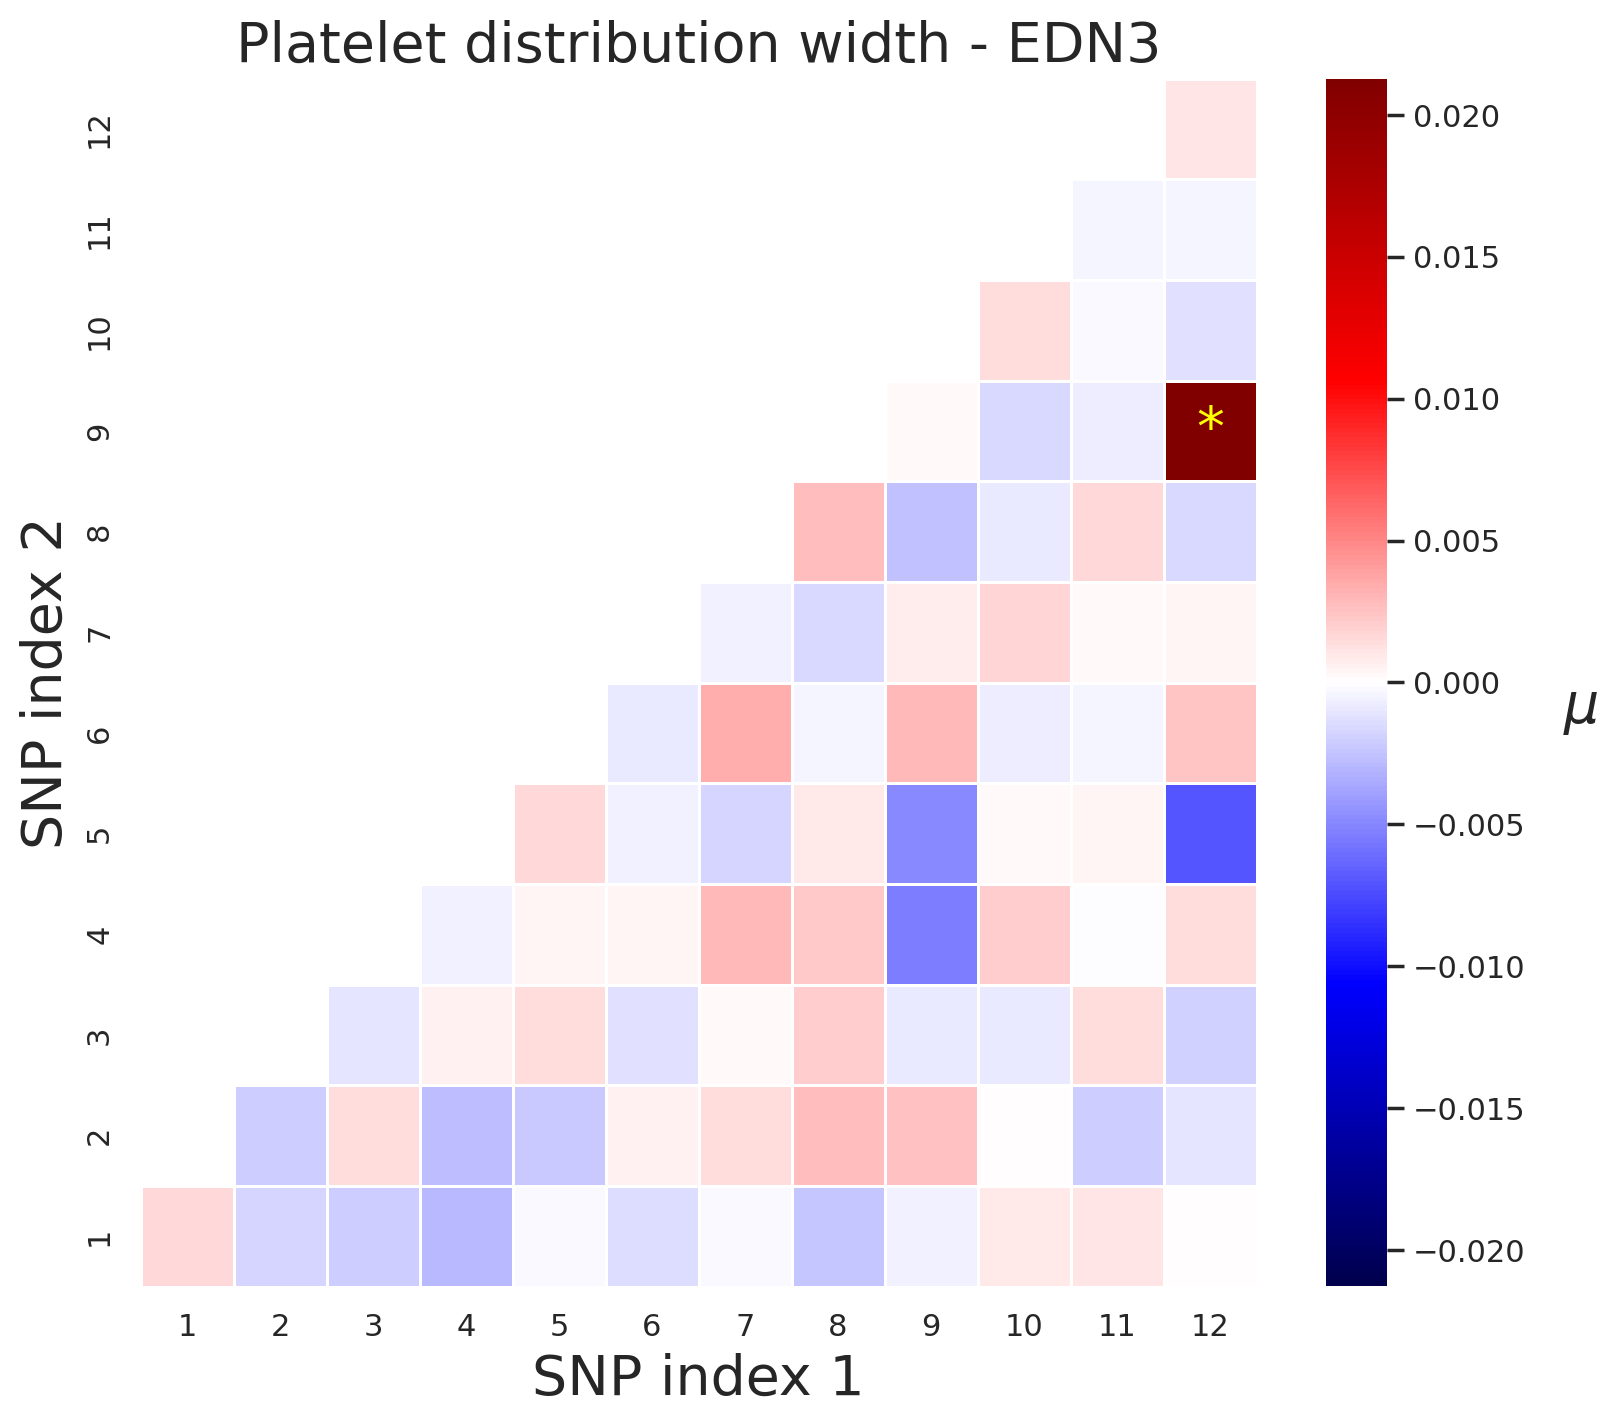

pStart: 7286245 vs pEnd: 7292402


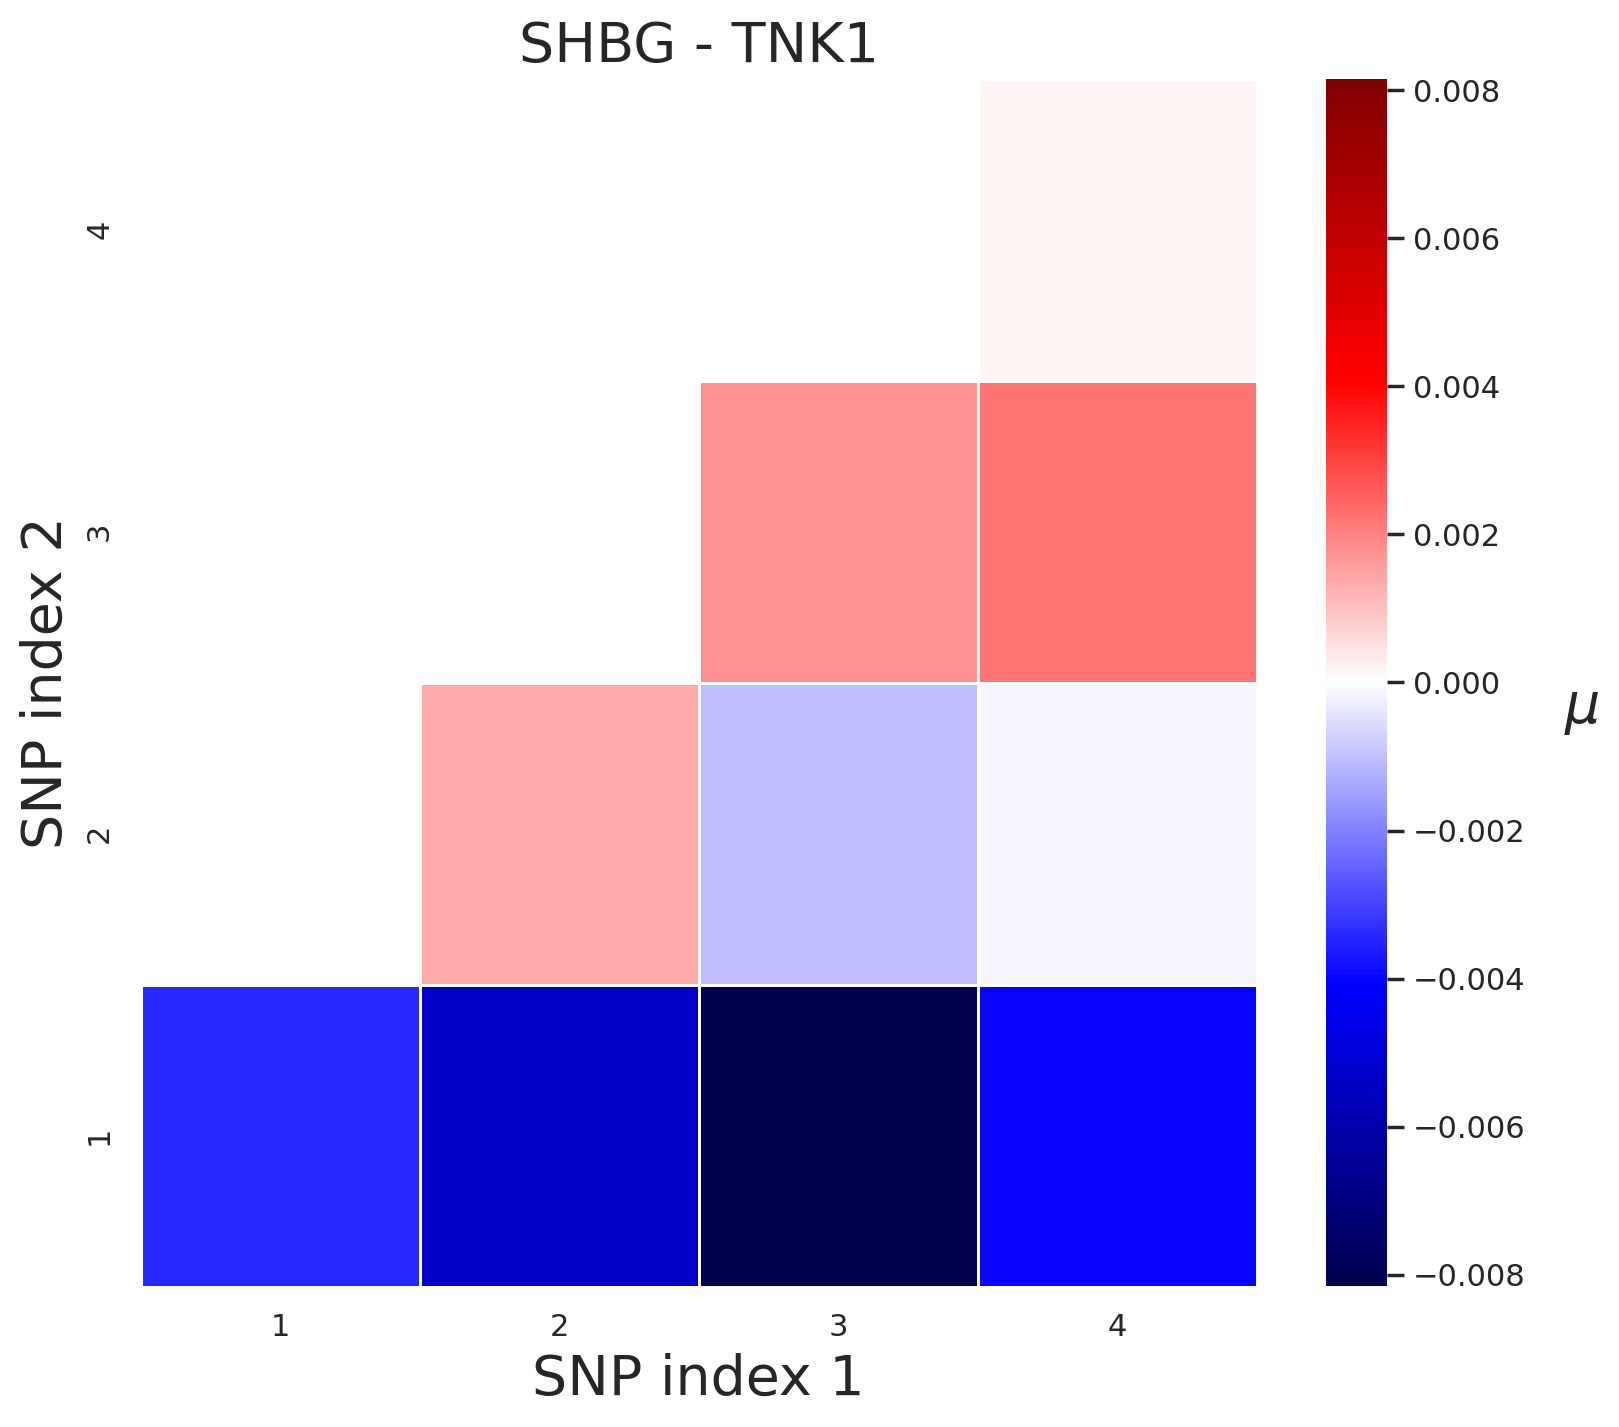

pStart: 15855600 vs pEnd: 15894671


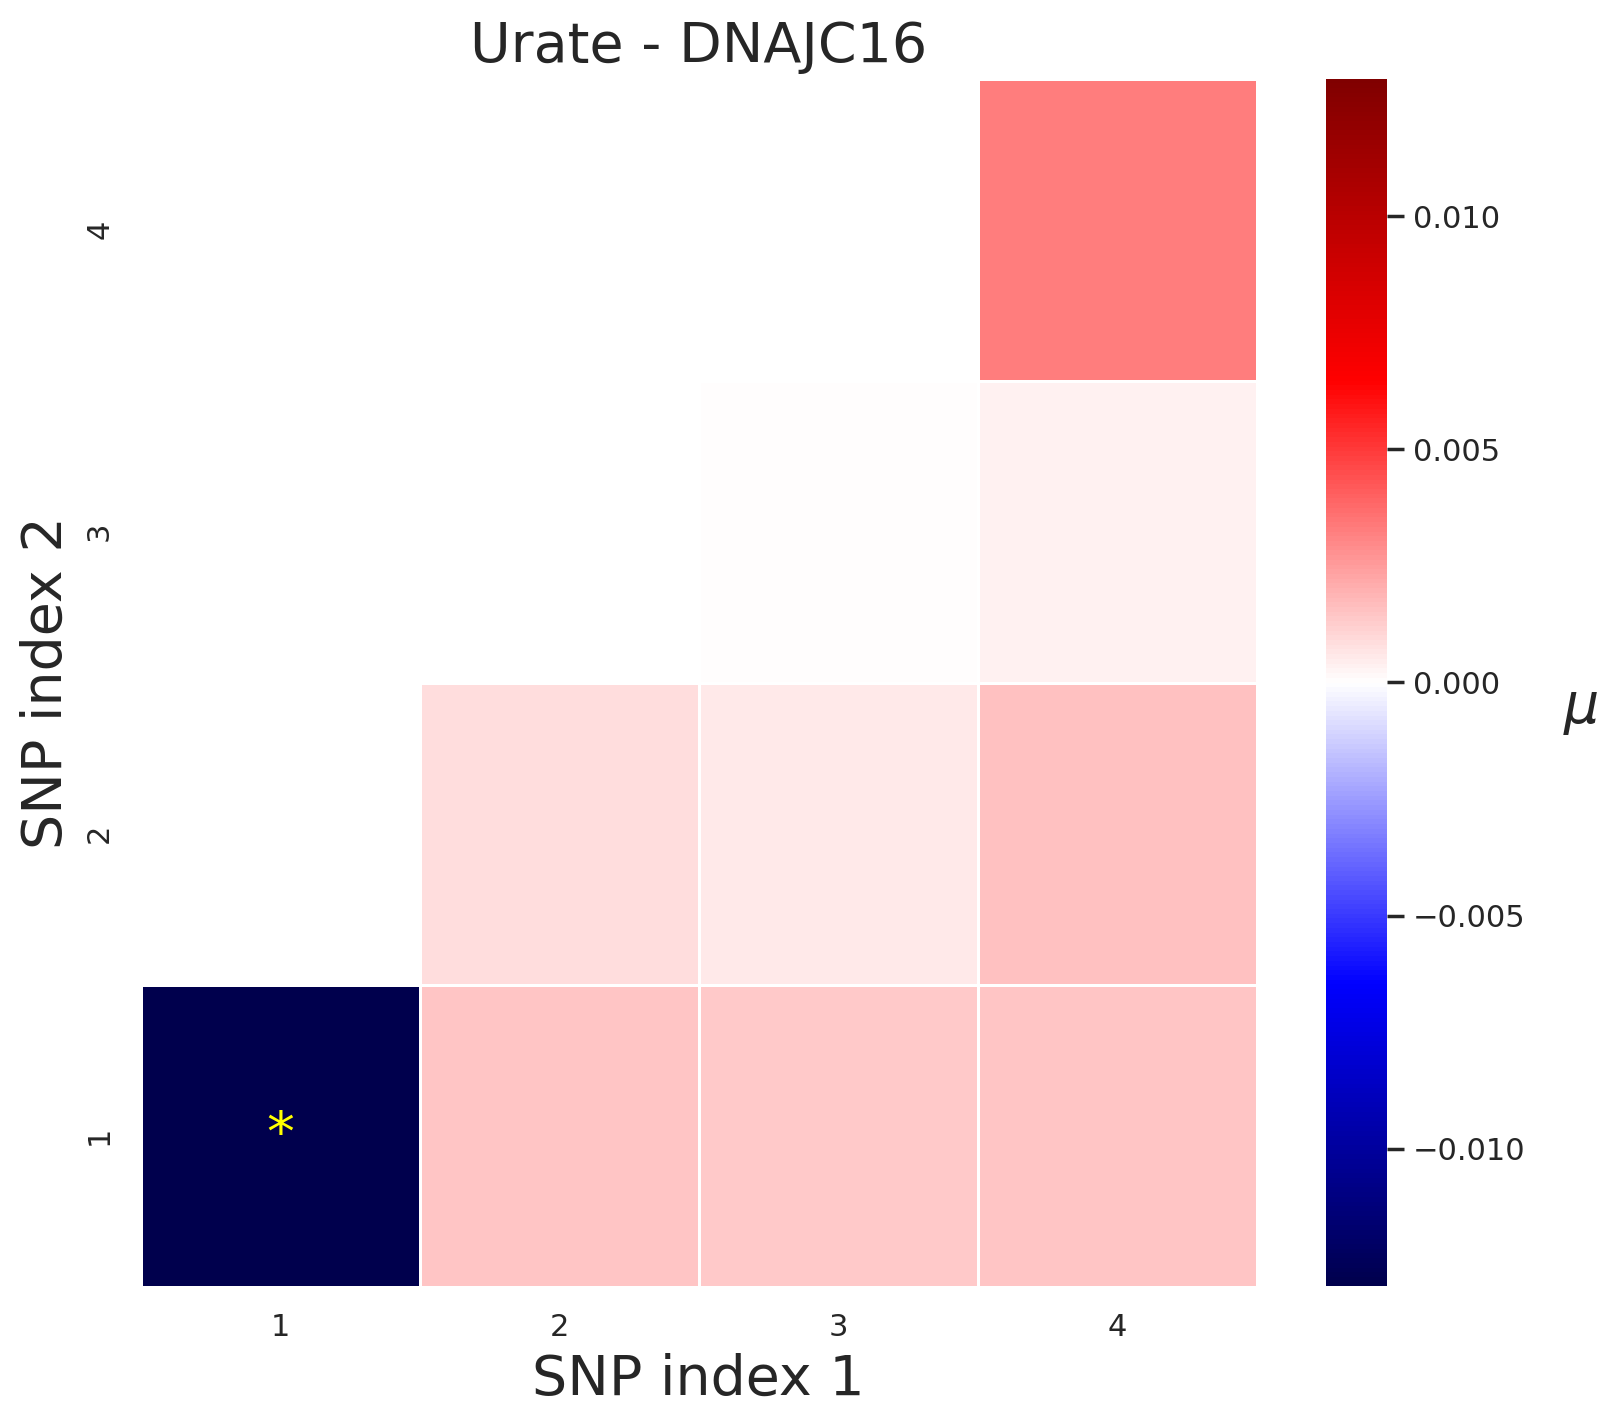

pStart: 9828020 vs pEnd: 10027589


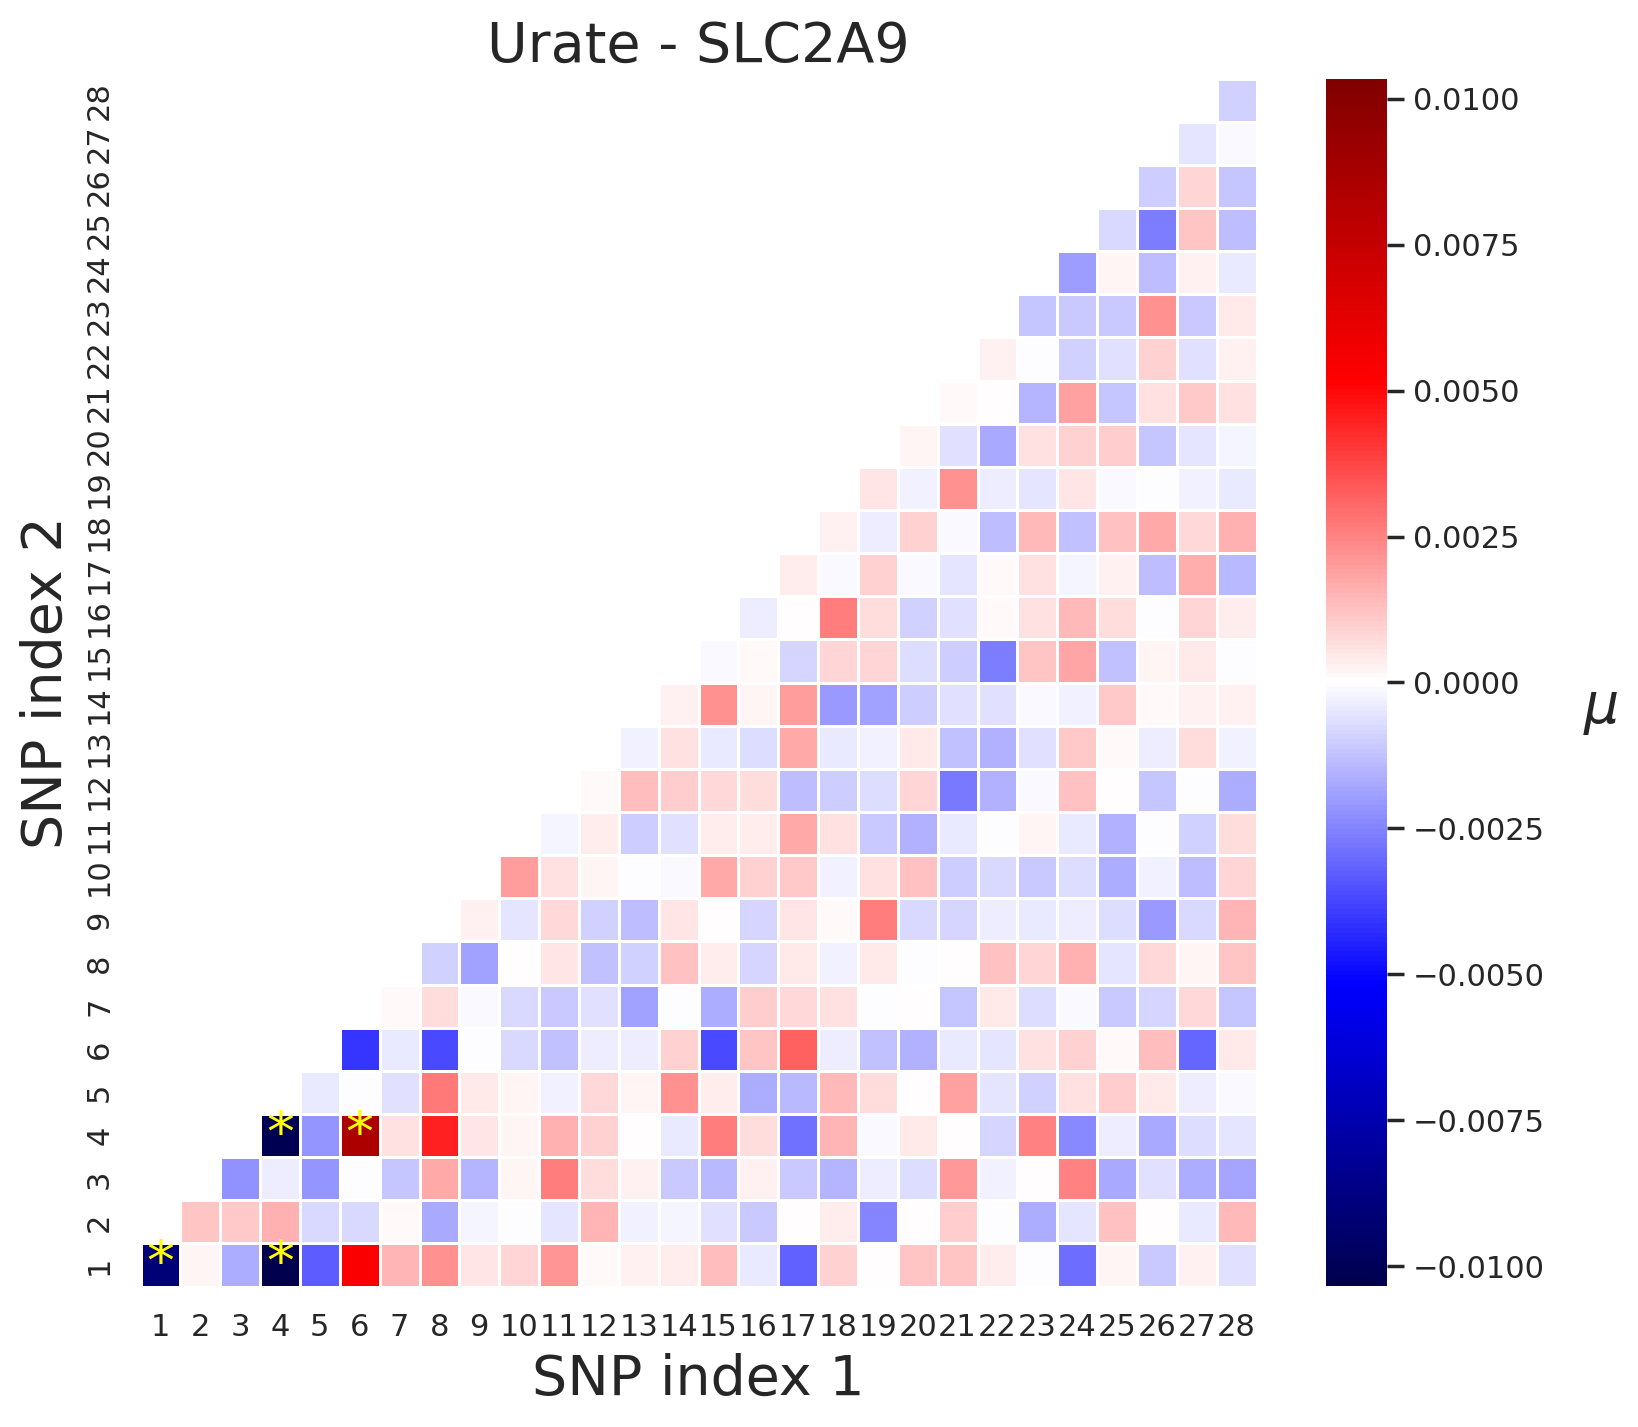

pStart: 10077001 vs pEnd: 10118289


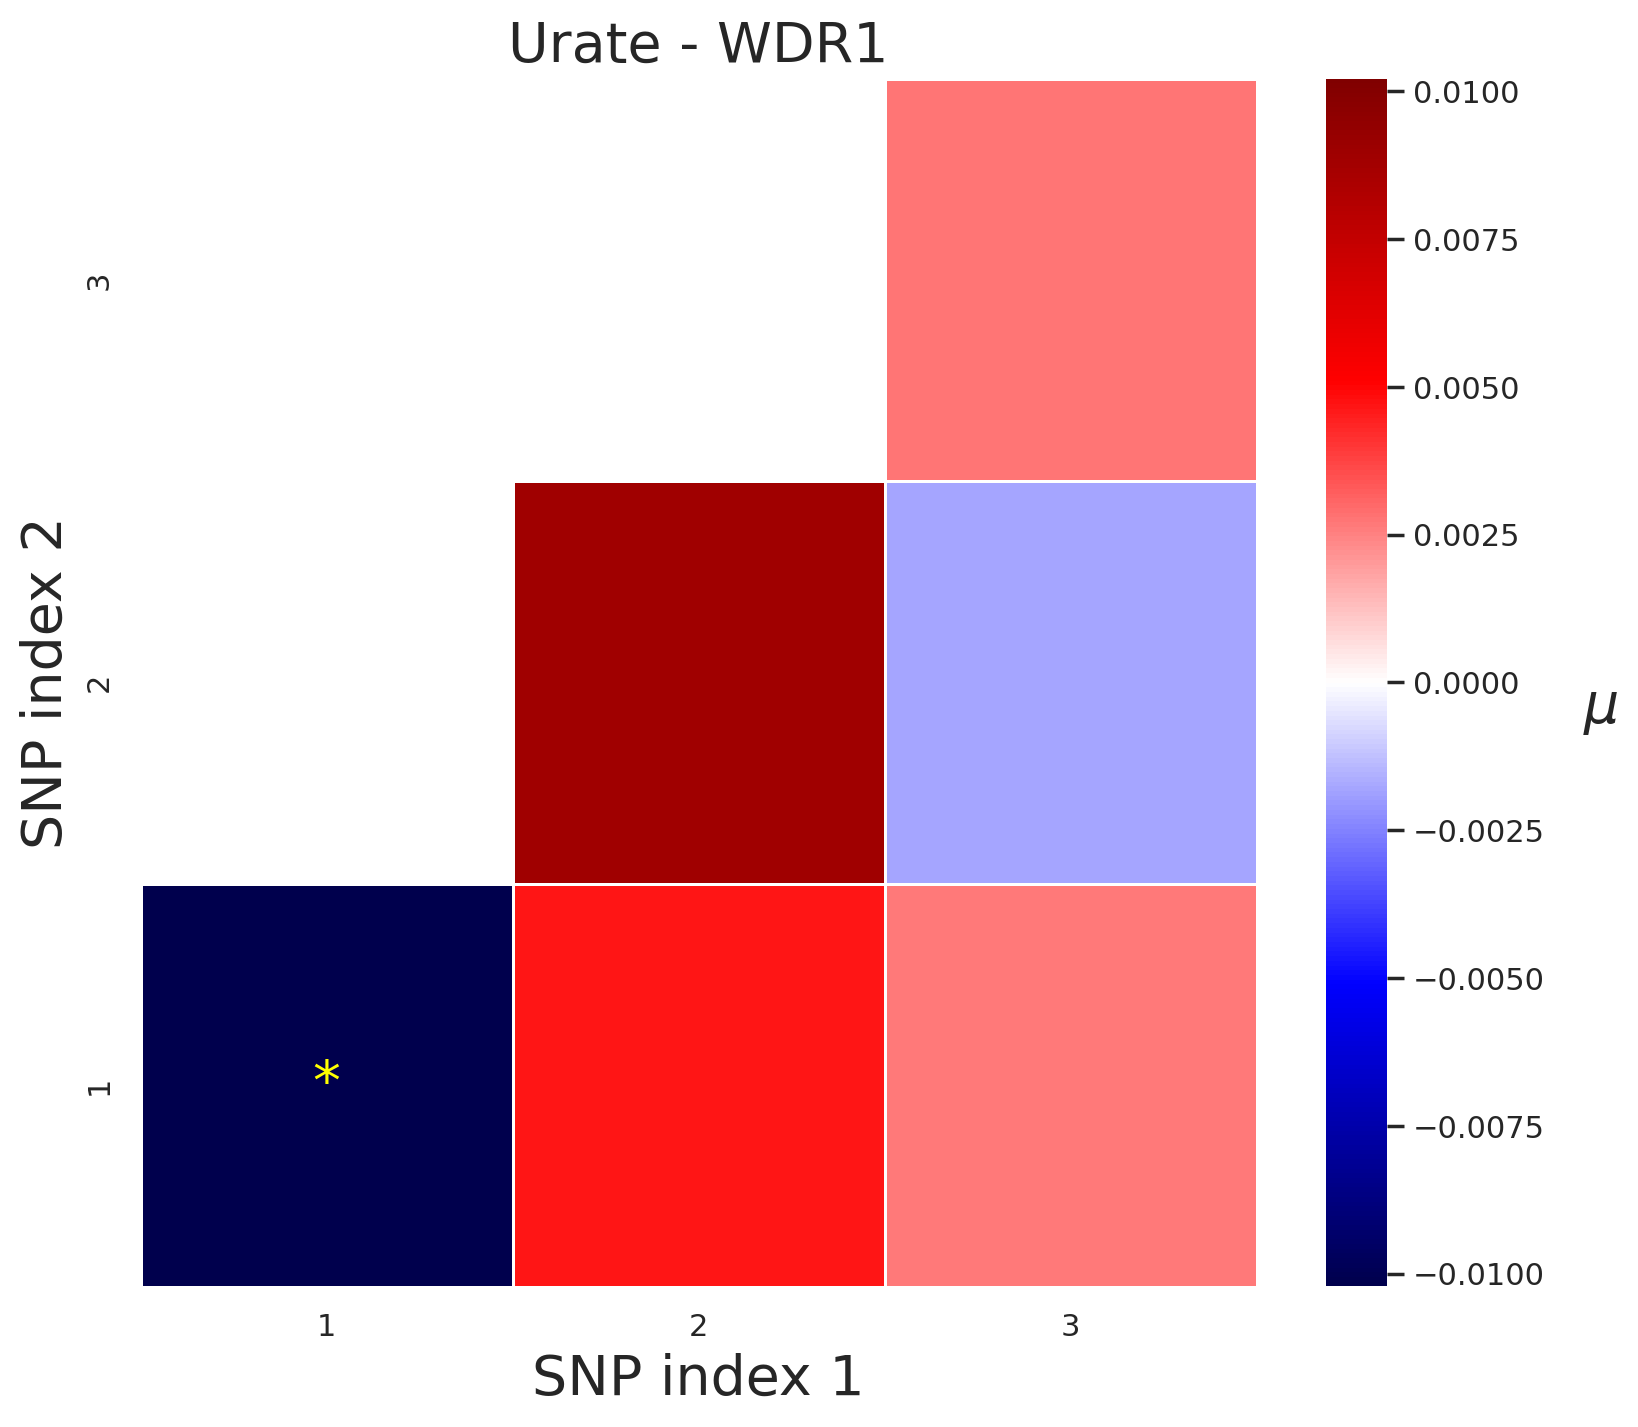

pStart: 88755866 vs pEnd: 88767597


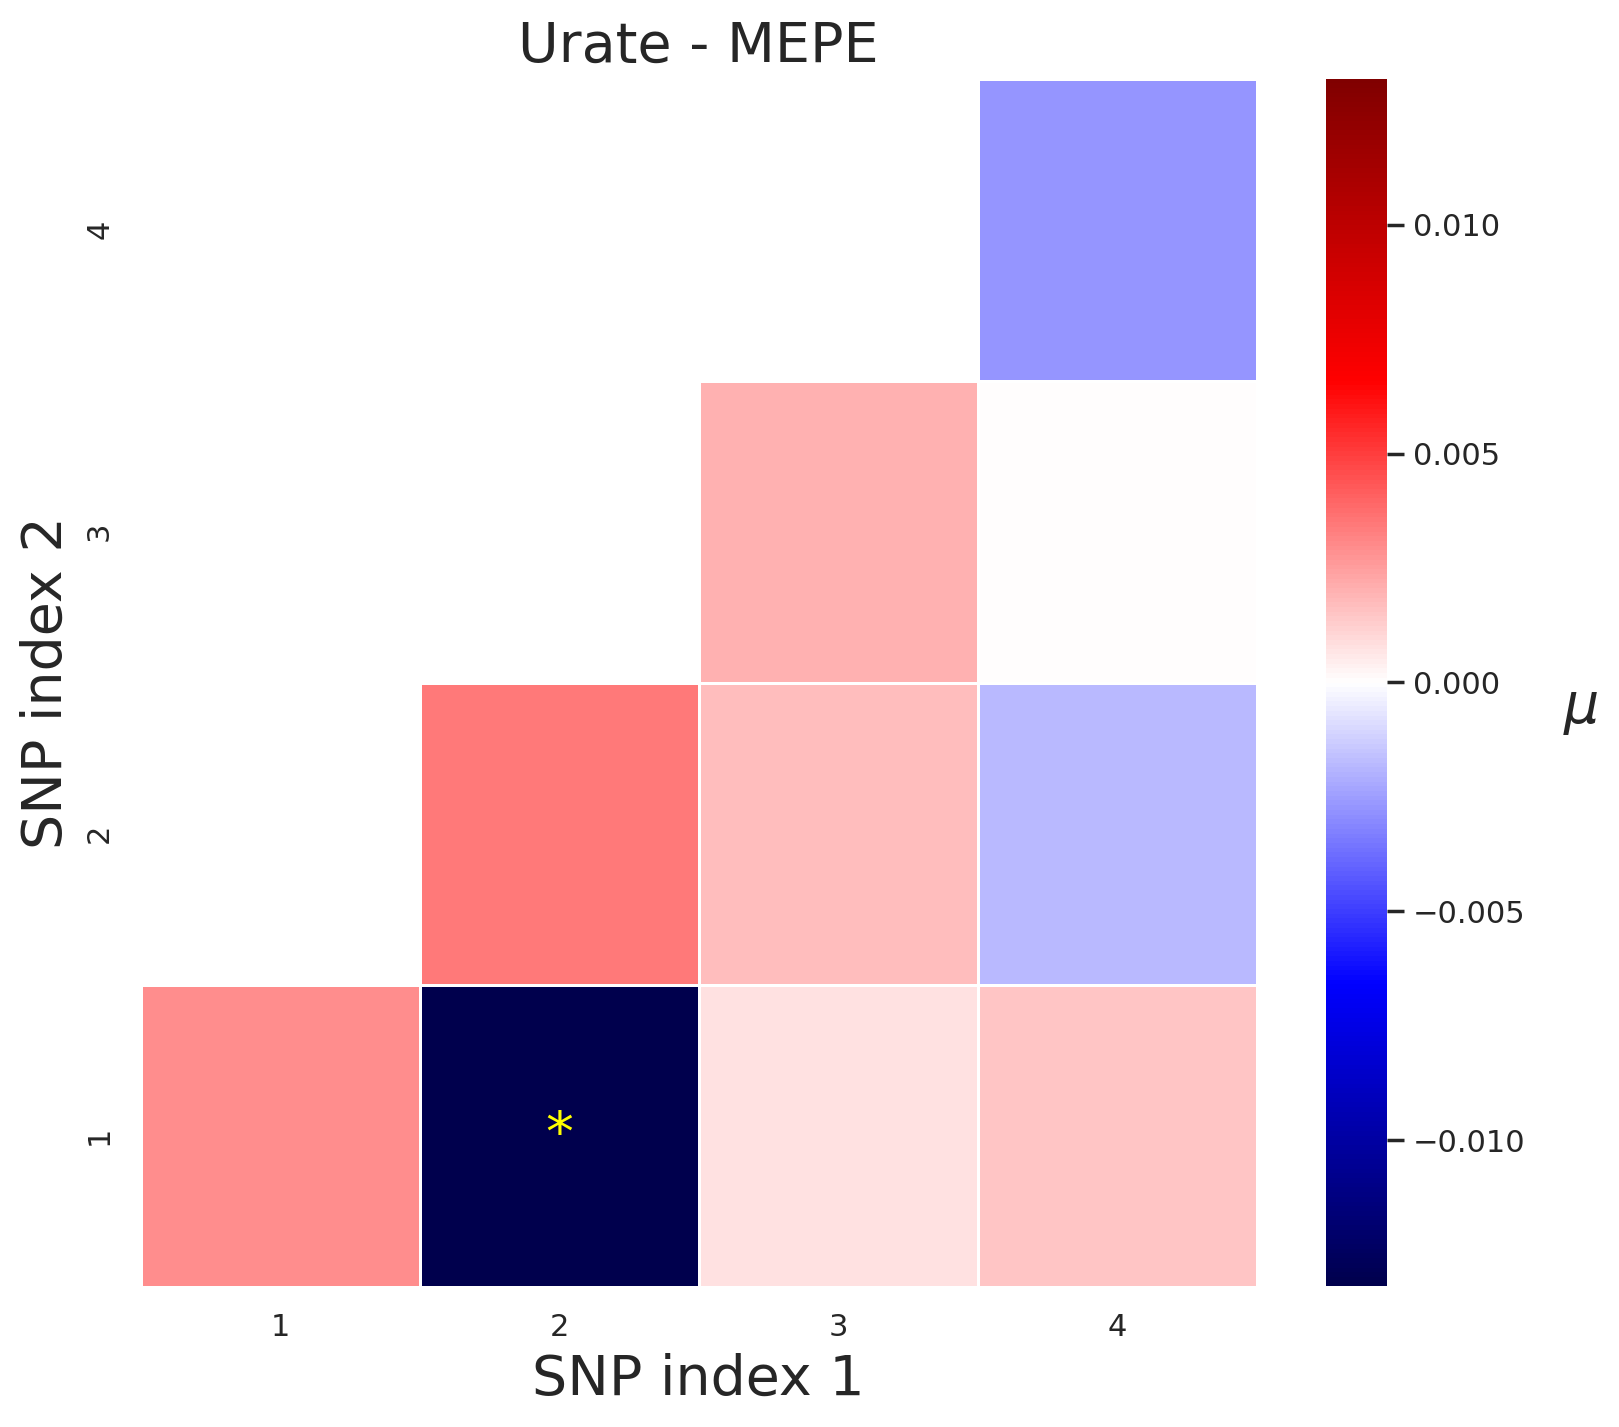

pStart: 155158610 vs pEnd: 155162633


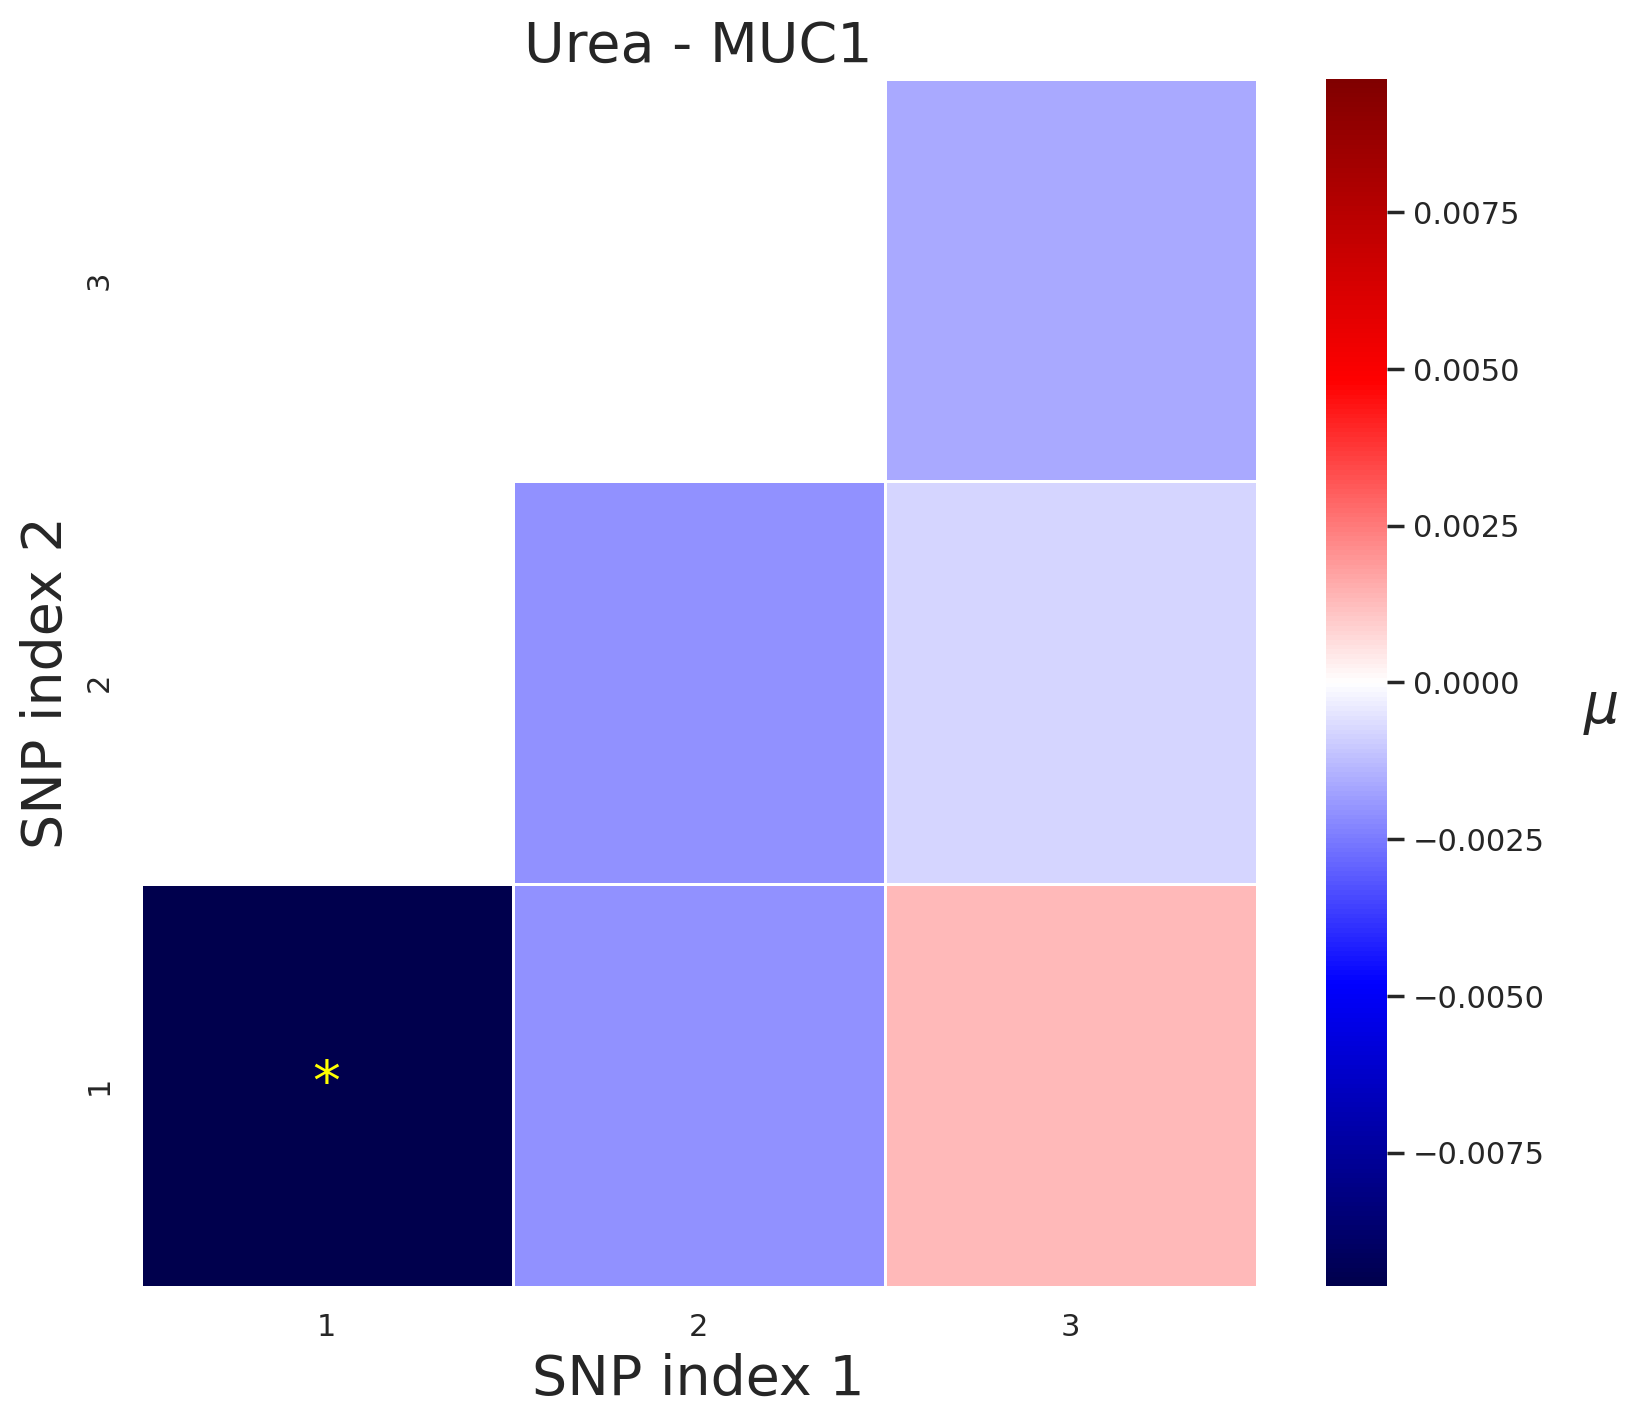

In [17]:
path="posthoc/posthoc_array20/"
params = pd.read_csv(f'posthoc/quadkast_sig_genes.csv')

### Checklist
## 1. Correlation between new p-value vs orig p-value
## 2. Correlation between interaction only vs with self-interaction
## 3. Adding variance components
## 3. Individual feature interactive p-values 


## step 1
p_vals = []
p_vals_orig = []
coeffs_bayesian = []
stds_bayesian = []
p_vals_bayesian = []
OLS_pvals = []
OLS_betas = []


annot = pd.read_csv('/home/boyang1995/research/traits/trait_info_cat.csv')
savefiles = []


for i in range(params.shape[0]):
# for i in range(params.shape[0]):
    trait,gene,pStart,pEnd,Start,End,_,pval=params.iloc[i]
    mathes = annot[annot.FILENAME==trait].TRAIT.values[0]
    print(f'pStart: {pStart} vs pEnd: {pEnd}')
    
    with open(f'{path}{trait}_{gene}.inter.pkl', 'rb') as handle:
        all_results=pickle.load(handle)
    p_vals.append(all_results['pval'][0][0])
    p_vals_orig.append(all_results['pval-orig'])
    
    coeffs_bayesian.append(all_results['Bayesian_mean'])
    stds_bayesian.append(all_results['Bayesian_std'])
    p_vals_bayesian.append(all_results['Bayesian_pval'])
    OLS_pvals.append(all_results['OLS-pvals'])
    
    NSnps = End-Start+1
    feat_Imp(NSnps,all_results['Bayesian_mean'],all_results['Bayesian_pval'],title=f'{mathes} - {gene}',
             savePath = f'{path}/fig/heatmap/', saveName=f'{mathes}-{gene}.feat_imp.png')

    
p_vals = np.array(p_vals)
p_vals_orig = np.array(p_vals_orig)
#     for elem in all_results:
#         results.append([N,M,D,sigma_g,elem['varcomp'][0]])


### Focus on LPA analysis

Jun 26th, 2024

refer to http://localhost:1235/notebooks/research/QuadKAST/extension/Imputed%20data.ipynb

In [30]:


bimpath_orig='/home/boyang1995/research/GxG/reference/filter4.bim'
bimOrig_df = pd.read_csv(bimpath_orig,sep='\t',header=None)


path="/home/boyang1995/research/QuadKAST/results/real_trait/Jun2024/results1.5.v2/"
params = pd.read_csv(f'/home/boyang1995/research/QuadKAST/results/real_trait/Jun2024/quadkast_sig_genes.v2.csv')

specific_params = params[params.gene=='LPA']

pStart=160952760
pEnd=161085245
CHR=6

bim_sub_df=bimOrig_df[(bimOrig_df.iloc[:,0]==CHR)&(bimOrig_df.iloc[:,3]>=pStart)&(bimOrig_df.iloc[:,3]<=pEnd)].reset_index(drop=True)

### Checklist
## 1. Correlation between new p-value vs orig p-value
## 2. Correlation between interaction only vs with self-interaction
## 3. Adding variance components
## 3. Individual feature interactive p-values 


## step 1
p_vals = []
p_vals_orig = []
coeffs_bayesian = []
stds_bayesian = []
p_vals_bayesian = []
OLS_pvals = []
OLS_betas = []


annot = pd.read_csv('/home/boyang1995/research/traits/trait_info_cat.csv')
savefiles = []



# for i in range(params.shape[0]):
trait,gene,pStart,pEnd,Start,End,_,pval=specific_params.iloc[0]
CHR, sID, _, _, _, _ = bimdf.iloc[Start]
CHR, eID, _, _, _, _ = bimdf.iloc[End]
mathes = annot[annot.FILENAME==trait].TRAIT.values[0]
print(f'pStart: {pStart} vs pEnd: {pEnd}')

with open(f'{path}{trait}_{gene}.inter.pkl', 'rb') as handle:
    all_results=pickle.load(handle)
p_vals.append(all_results['pval'][0][0])
#     p_vals_orig.append(all_results['pval-orig'])
p_vals_orig.append(pval)

coeffs_bayesian.append(all_results['Bayesian_mean'])
stds_bayesian.append(all_results['Bayesian_std'])
p_vals_bayesian.append(all_results['Bayesian_pval'])
OLS_pvals.append(all_results['OLS-pvals'])

NSnps = End-Start+1
#     feat_Imp(NSnps,all_results['Bayesian_mean'],all_results['Bayesian_pval'],title=f'{mathes} - {gene} (Chr: {CHR})',
#              savePath = f'/home/boyang1995/research/QuadKAST/results/real_trait/cov_adjust/fig/heatmap/reorder/{mathes}-{gene}.feat_imp.png')

    
p_vals = np.array(p_vals)
p_vals_orig = np.array(p_vals_orig)


M = NSnps
cindex=0
data=[]
for i in range((M)):
    temp = []
    for j in range(i, (M)):
        data.append([all_results['Bayesian_mean'][cindex],
                     all_results['Bayesian_pval'][cindex], all_results['OLS-pvals'][cindex], 
                    f'{bim_sub_df.iloc[i,1]}-{bim_sub_df.iloc[i,4]}/{bim_sub_df.iloc[i,5]}',f'{bim_sub_df.iloc[j,1]}-{bim_sub_df.iloc[j,4]}/{bim_sub_df.iloc[j,5]}'])
        cindex += 1


data_df = pd.DataFrame(data=data,columns=['bayesian_mean','bayesian_p','OLS_p', 'SNP1','SNP2'])
#     for elem in all_results:
#         results.append([N,M,D,sigma_g,elem['varcomp'][0]])


pStart: 160952760 vs pEnd: 161085245


In [31]:
data_df.to_csv(f'/home/boyang1995/research/QuadKAST/extension/biminfo/array/{trait}-{gene}.stats',index=None)



In [18]:
len(all_results['OLS-params'])

465

In [19]:
all_results

{'varcomp': [0.268658885607936,
  0.1833570105745677,
  0.49913301822033873,
  0.014481195104836555,
  0.0015196984247311089],
 'pval': [(0.0, 0),
  (0.2299372177222534, 0),
  (0.9851286679973814, 0),
  (0.6500946109447792, 0),
  (0.4515067788858548, 0),
  (0.7953400259176513, 0),
  (0.20359433701420027, 0),
  (0.5644098523318926, 0),
  (0.5068002316731005, 0),
  (0.05405071046638399, 0),
  (0.8150050380215739, 0)],
 'pval-orig': 0.0,
 'meta': ['lipo_a', 'LPA', 6, 160952760, 161085245],
 'Bayesian_mean': array([-3.11016608e-02,  3.12847679e-03, -7.80229263e-03, -5.68151785e-03,
         5.50216846e-03, -2.26986989e-03, -6.81524498e-03,  4.24316349e-03,
        -3.73864067e-03, -4.18199159e-03, -1.71685261e-03, -2.10546728e-03,
        -4.10857016e-02,  1.78434172e-02, -9.80691623e-03,  7.12836304e-03,
         4.09091179e-03,  1.04480350e-02,  1.06256274e-02,  1.13777409e-03,
         2.72181881e-03, -1.43511642e-03, -4.95402760e-03,  2.75390423e-02,
         3.31630494e-03, -8.6713721

In [16]:
NSnps

13